In [1]:
# Business Objective of this Project is to forecast the stock price of apple(AAPL) for the next 30 days.
# There are Open, High, Low, Close, Adjusted close prices and volume
# that have been given for each day starting from 2012 to 2019 for apple stock(ie, it is a daily data).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

In [4]:
df= pd.read_csv('AAPL.csv',parse_dates=True,index_col="Date")

In [5]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...                ...         ...         ...         ...         ...   
2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume  
Date                  
2012-01-03  75555200  
2012-01-04  65005500  
2012-01-05  67817400  
2012-01-06  79573200  
2012-01-09  98506100  
...              ...  
2019-12-23  24643000  
2019-12-24  12119700  
2019-12-26  23280300  
2019-12-27  36566500  
2019-12-30  36028600  

[2011 rows x 6 columns]

In [6]:
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# date-- date of trading
# open-- price at which security 1st trades
# High-- highest price of the trading day
# Low-- lowest price of the trading day
# close-- last price of the trading day
# adj close-- price that is adjusts coroporate actions on closing price
# volume-- no of shares that changed hands during the trading day

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [10]:
# summary statistics
df.describe()

Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08

In [11]:
# Missing Values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

0

## Visualization

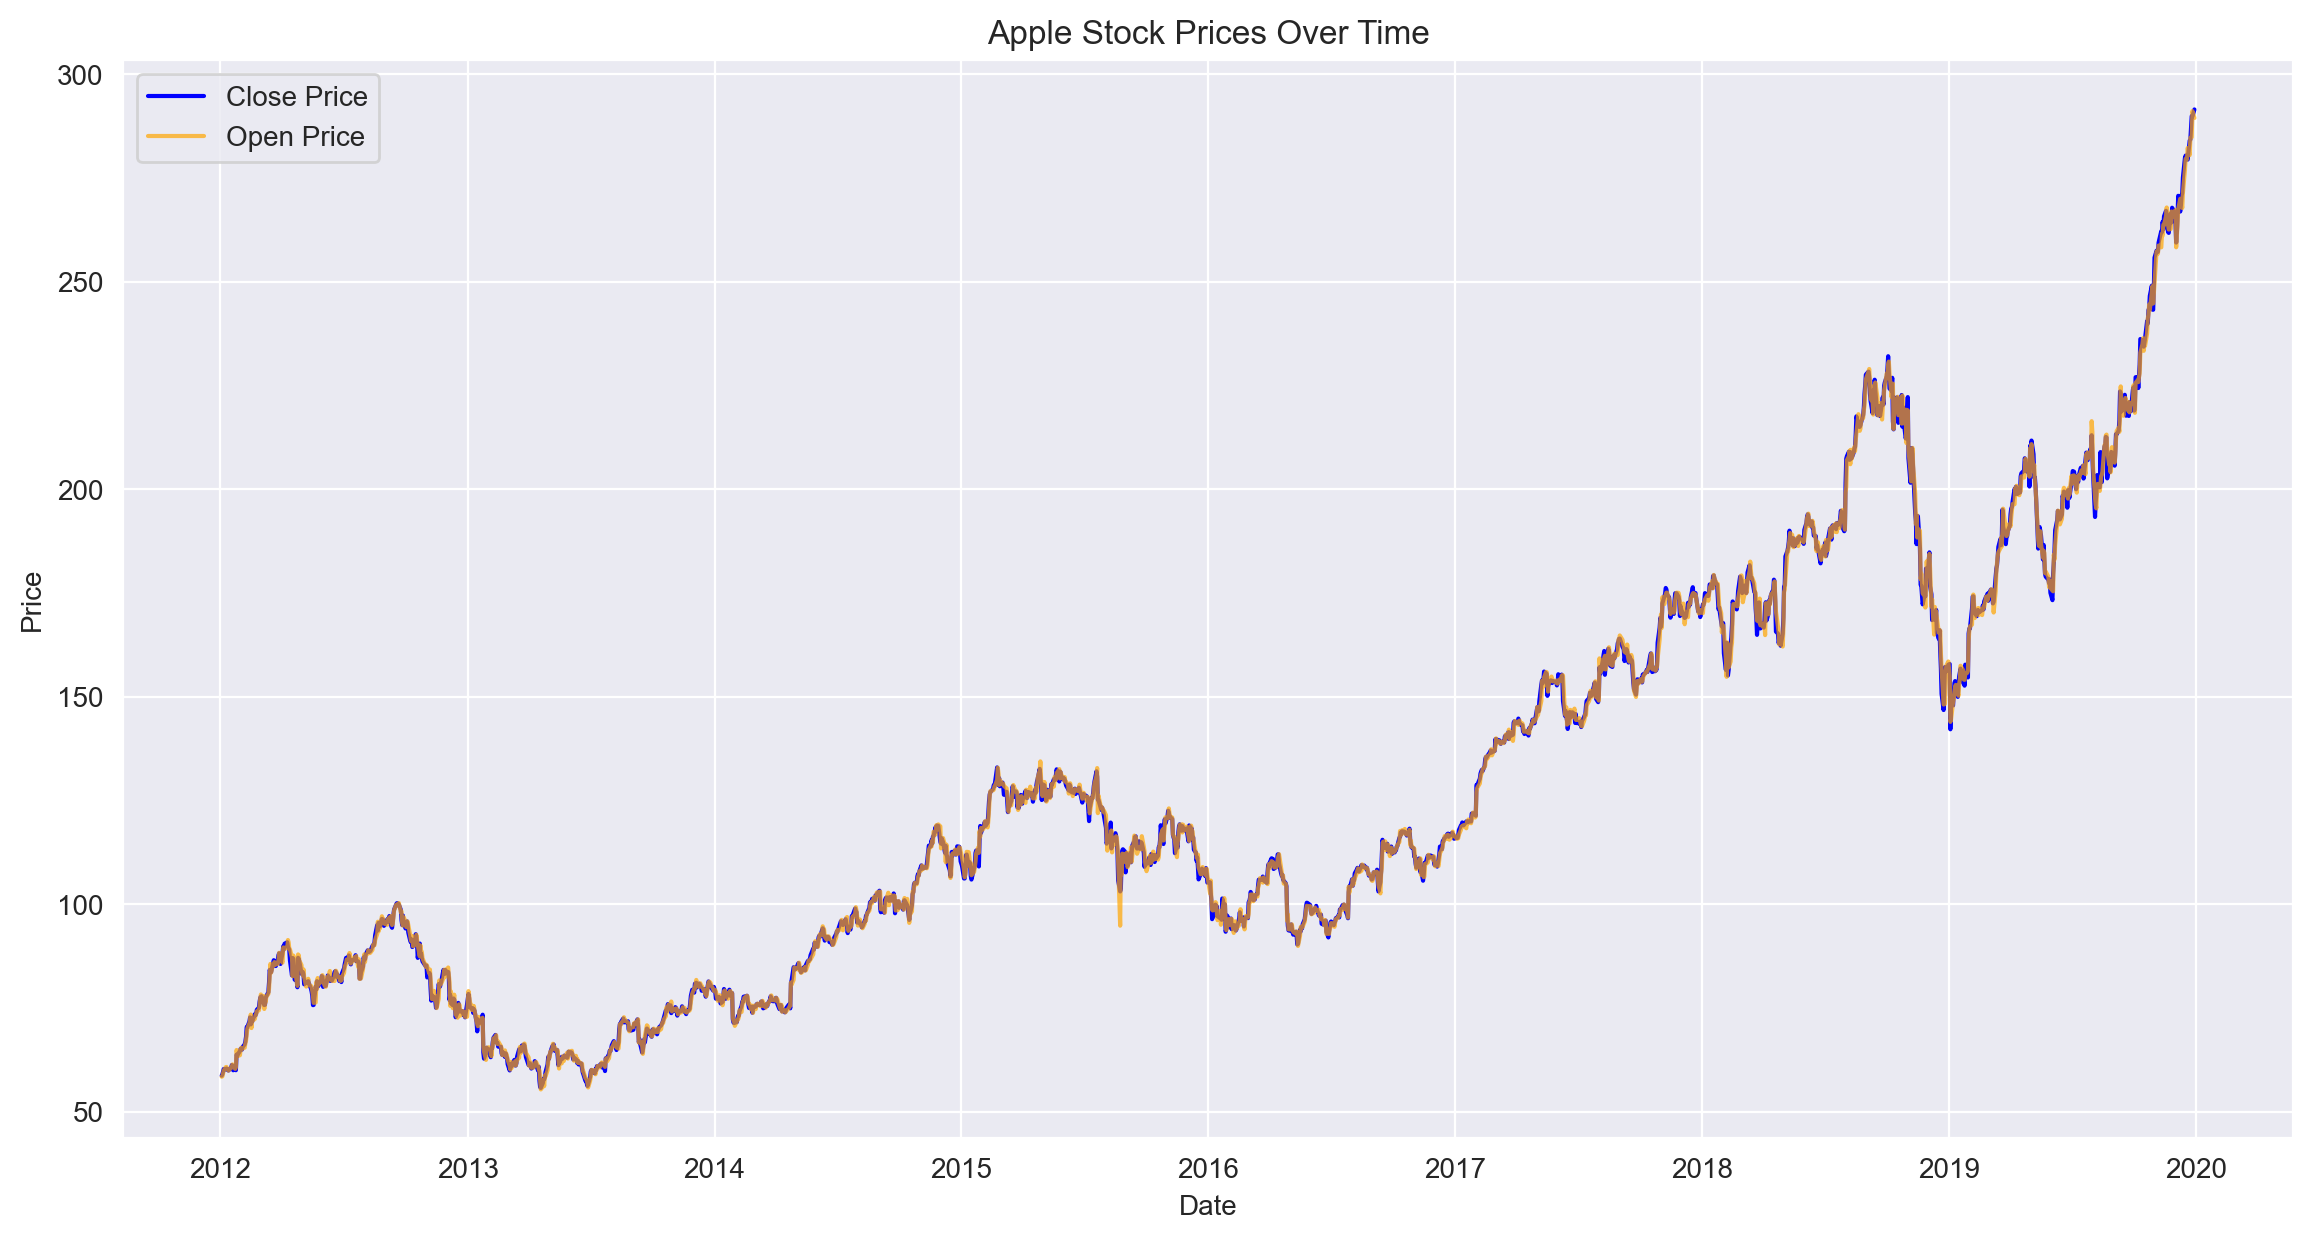

In [14]:
#Visualization for the stock prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['Open'], label='Open Price', color='orange', alpha=0.7)
plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

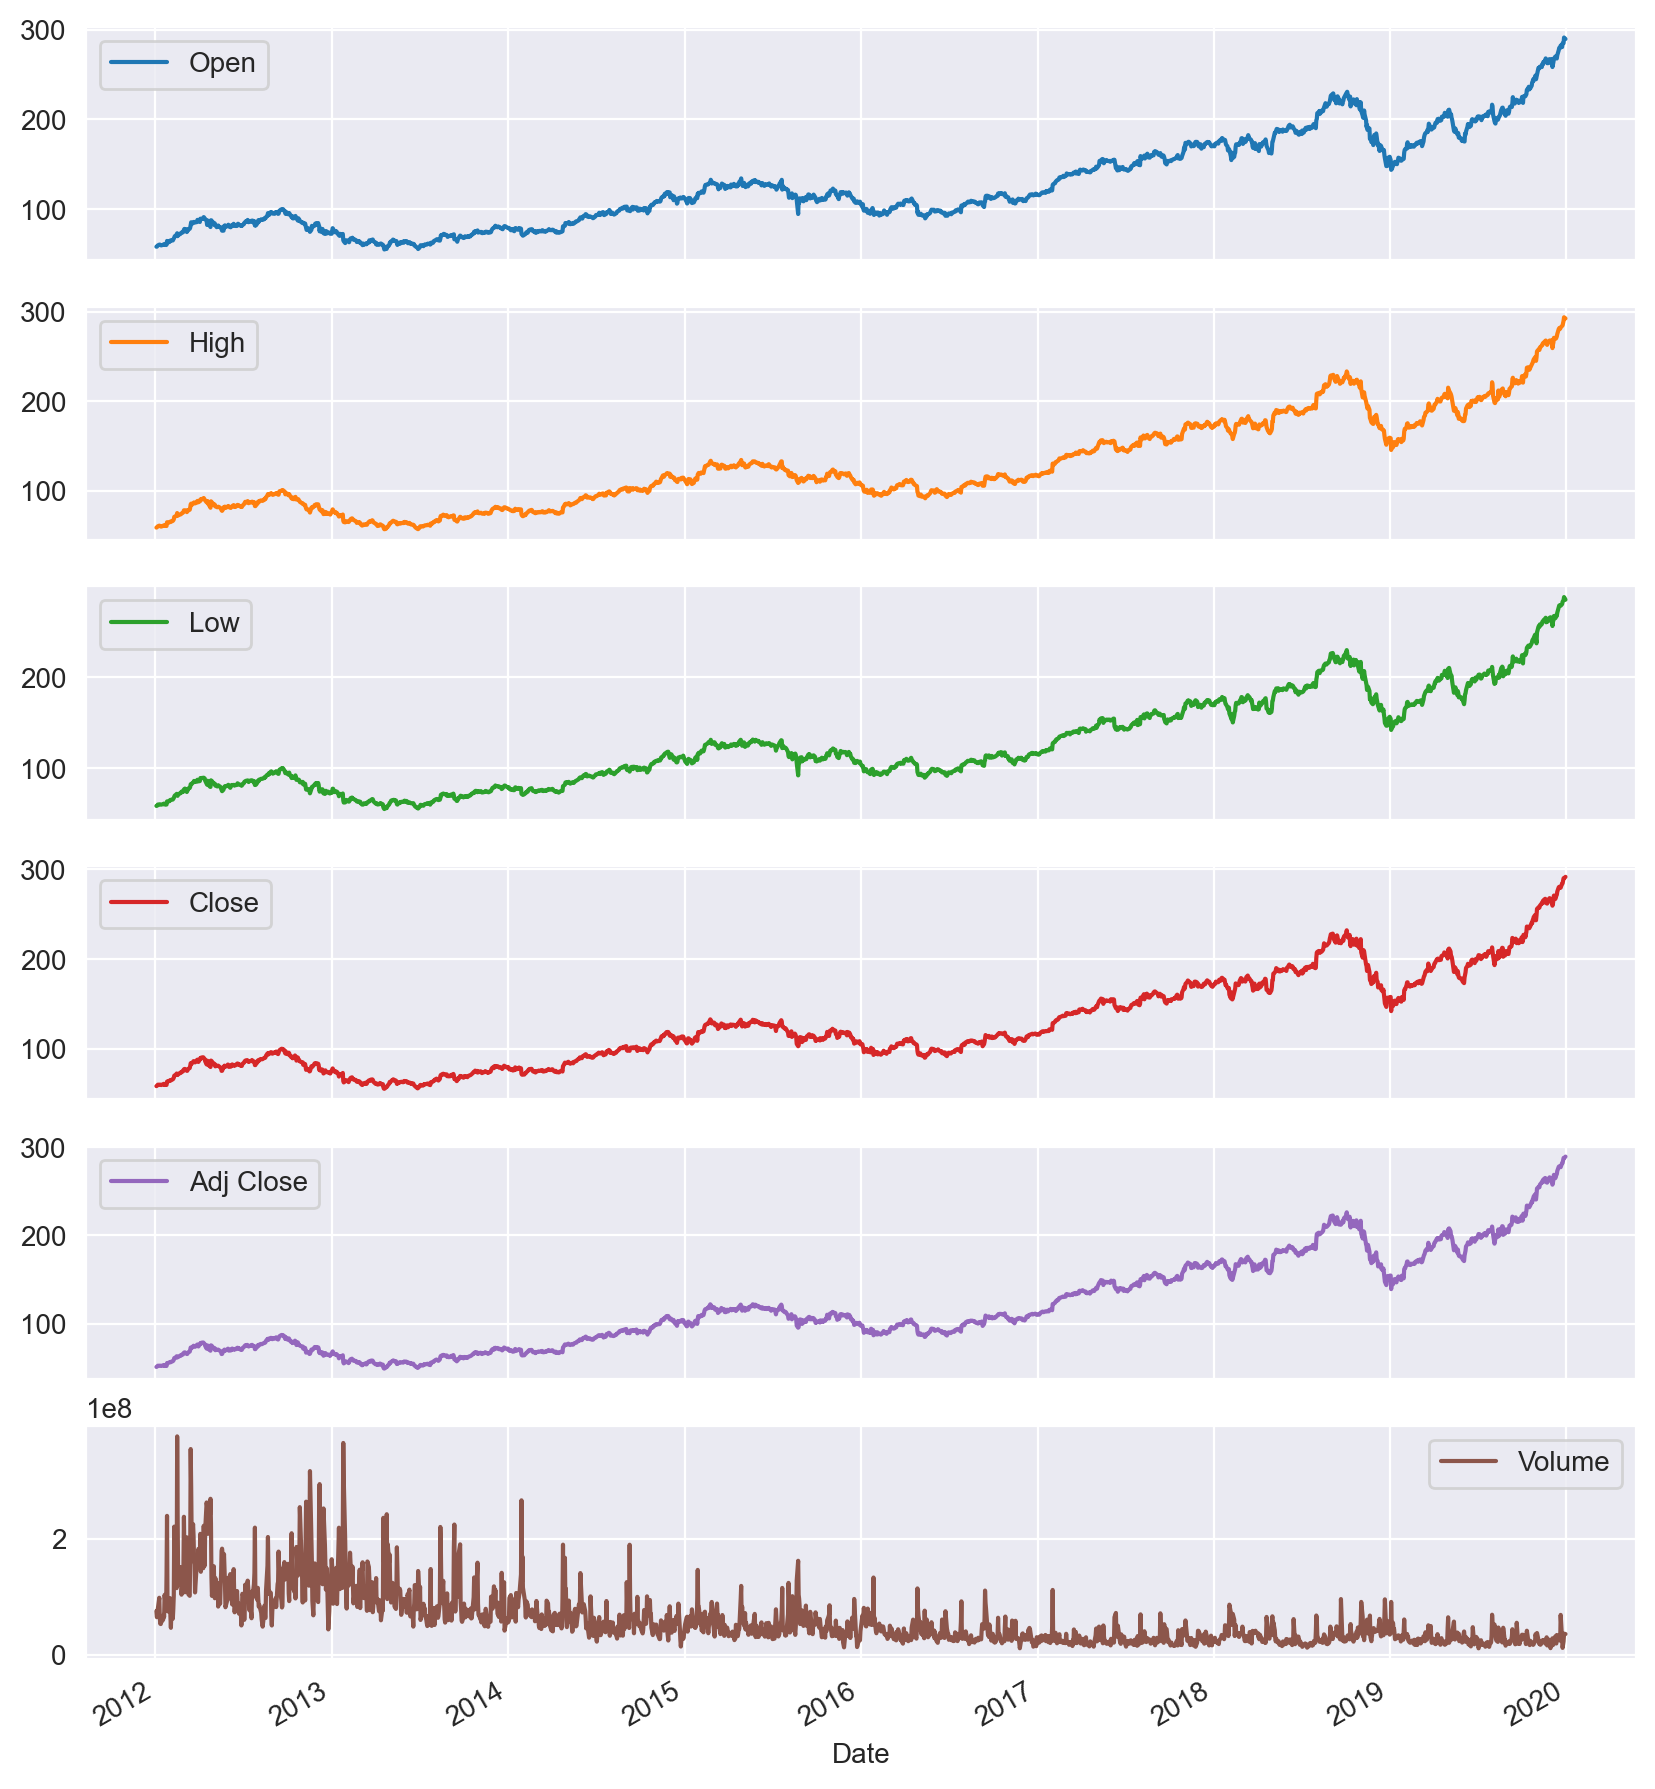

In [15]:
df.plot(subplots=True,figsize=(10,12))

### Perform seasonal decomposition

In [17]:
# Perform seasonal decomposition(period = 365)
result= seasonal_decompose(df['Close'],model='multiplicative',period=365)

<Axes: xlabel='Date'>

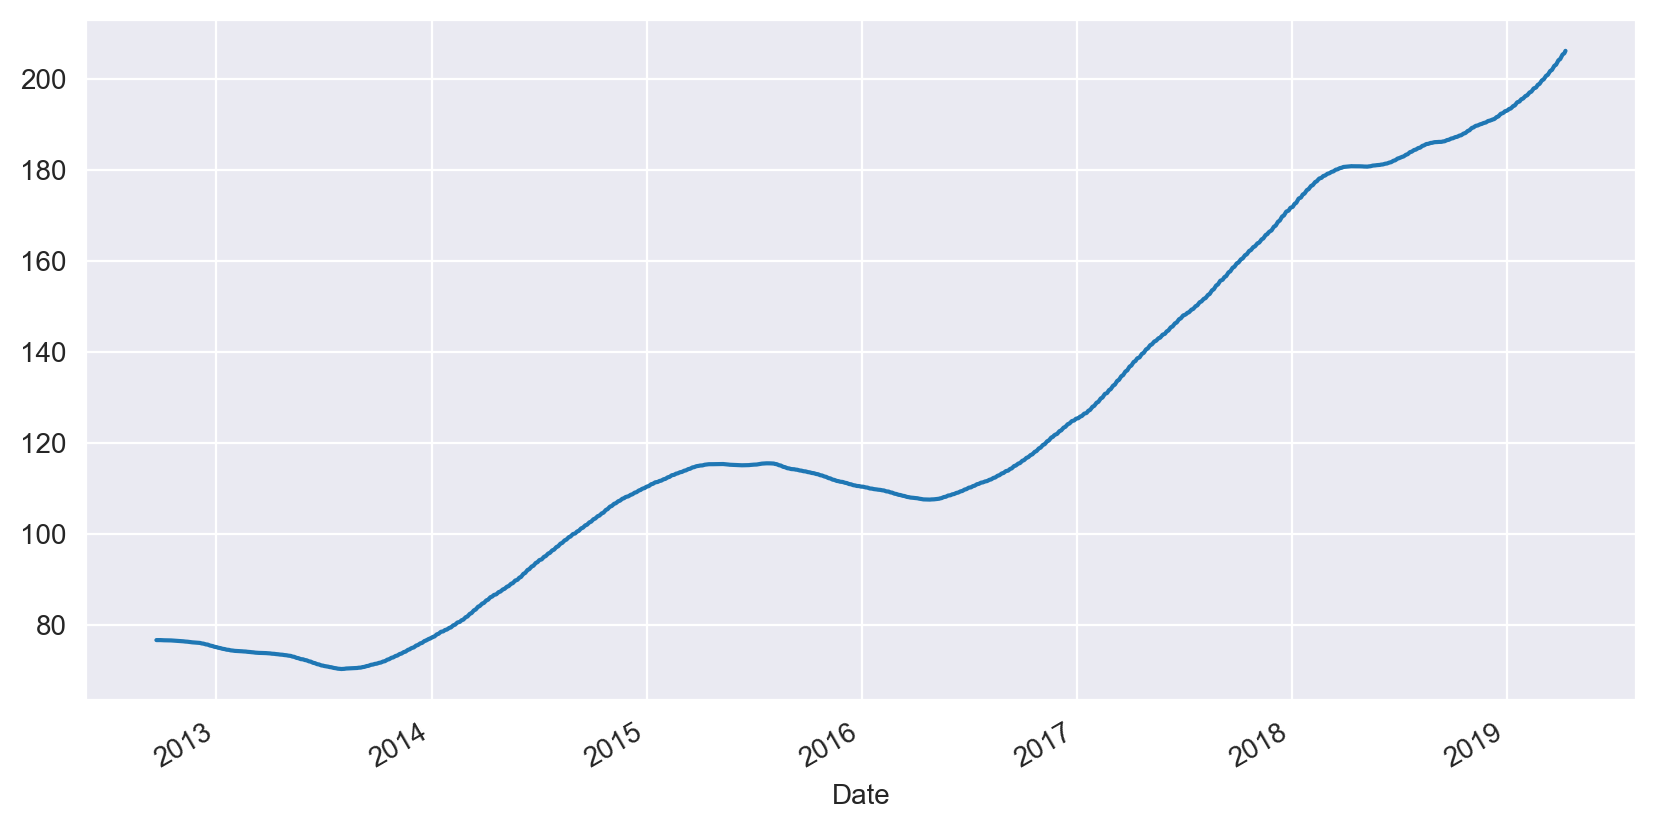

In [18]:
result.trend.plot()
# increasing trend

<Axes: xlabel='Date'>

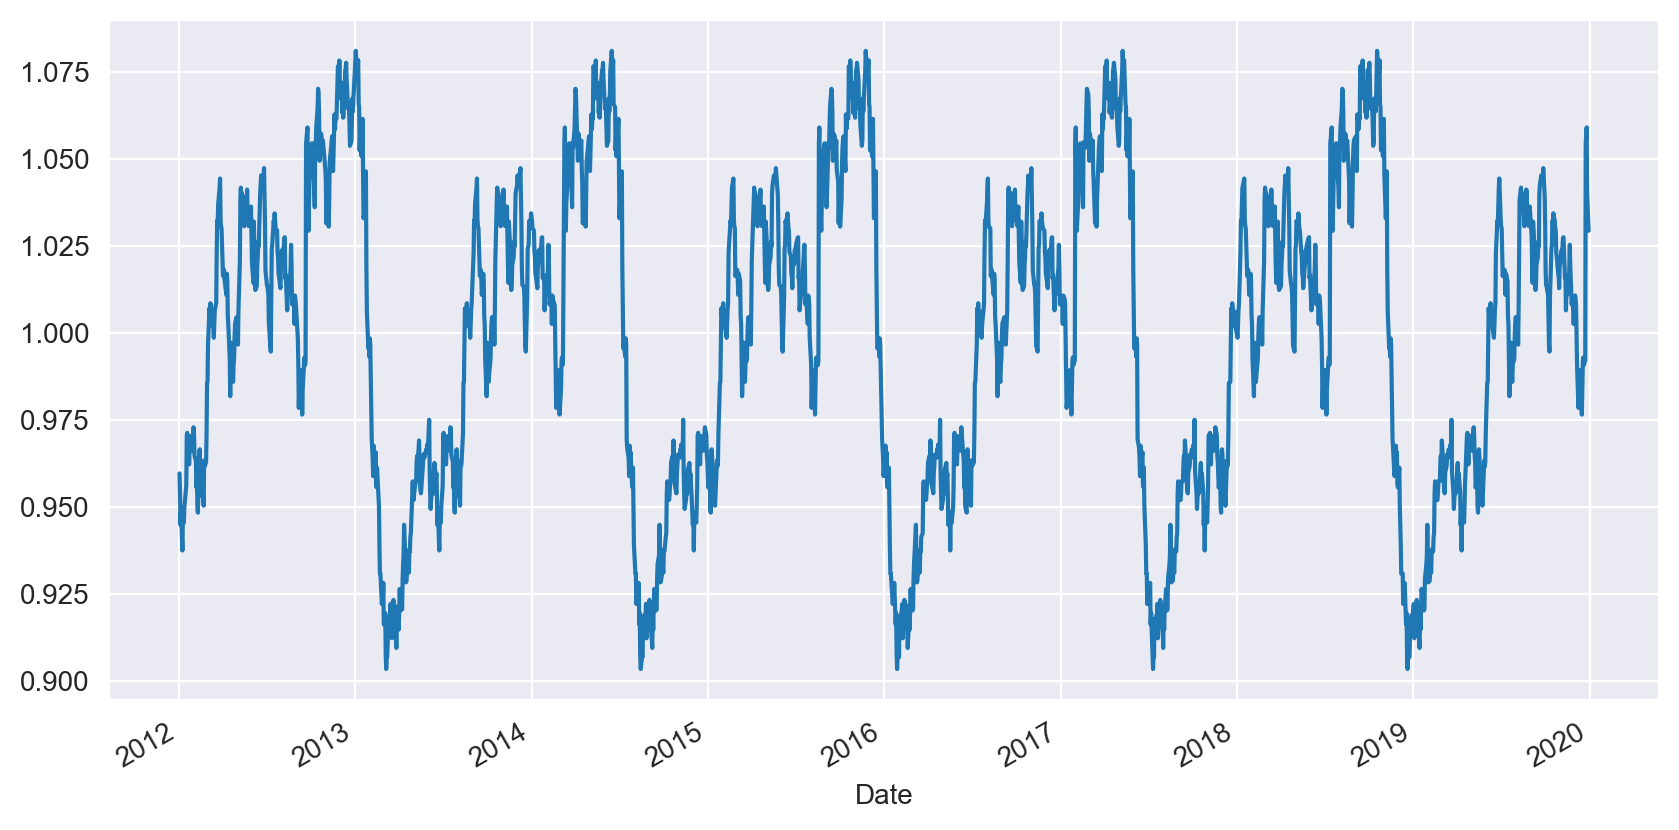

In [19]:
result.seasonal.plot()
# seasonality is present

<Axes: xlabel='Date'>

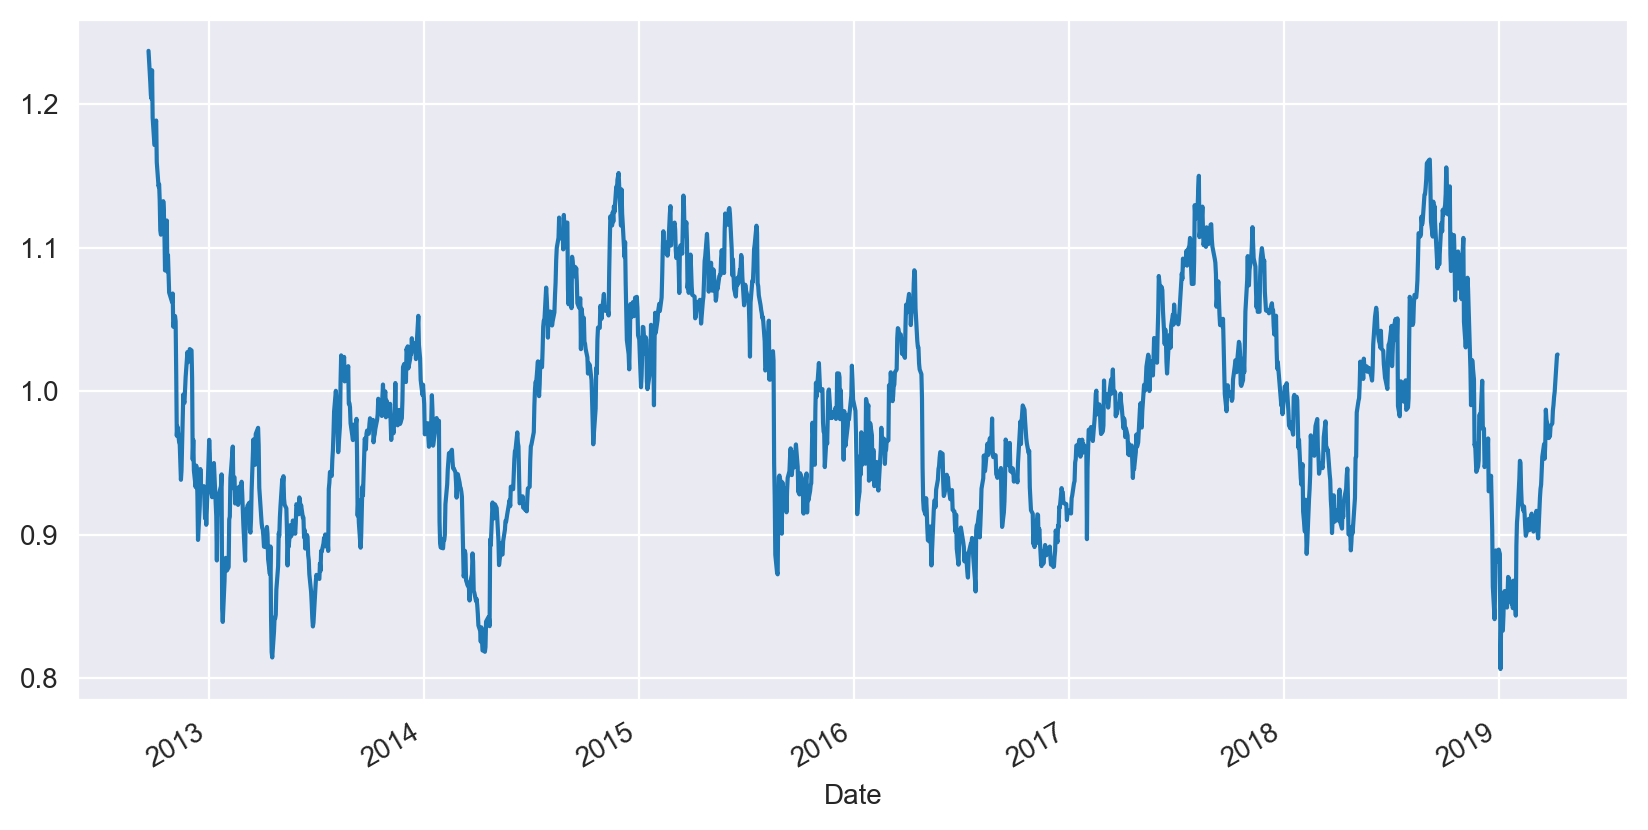

In [20]:
result.resid.plot()
# residuals is also present

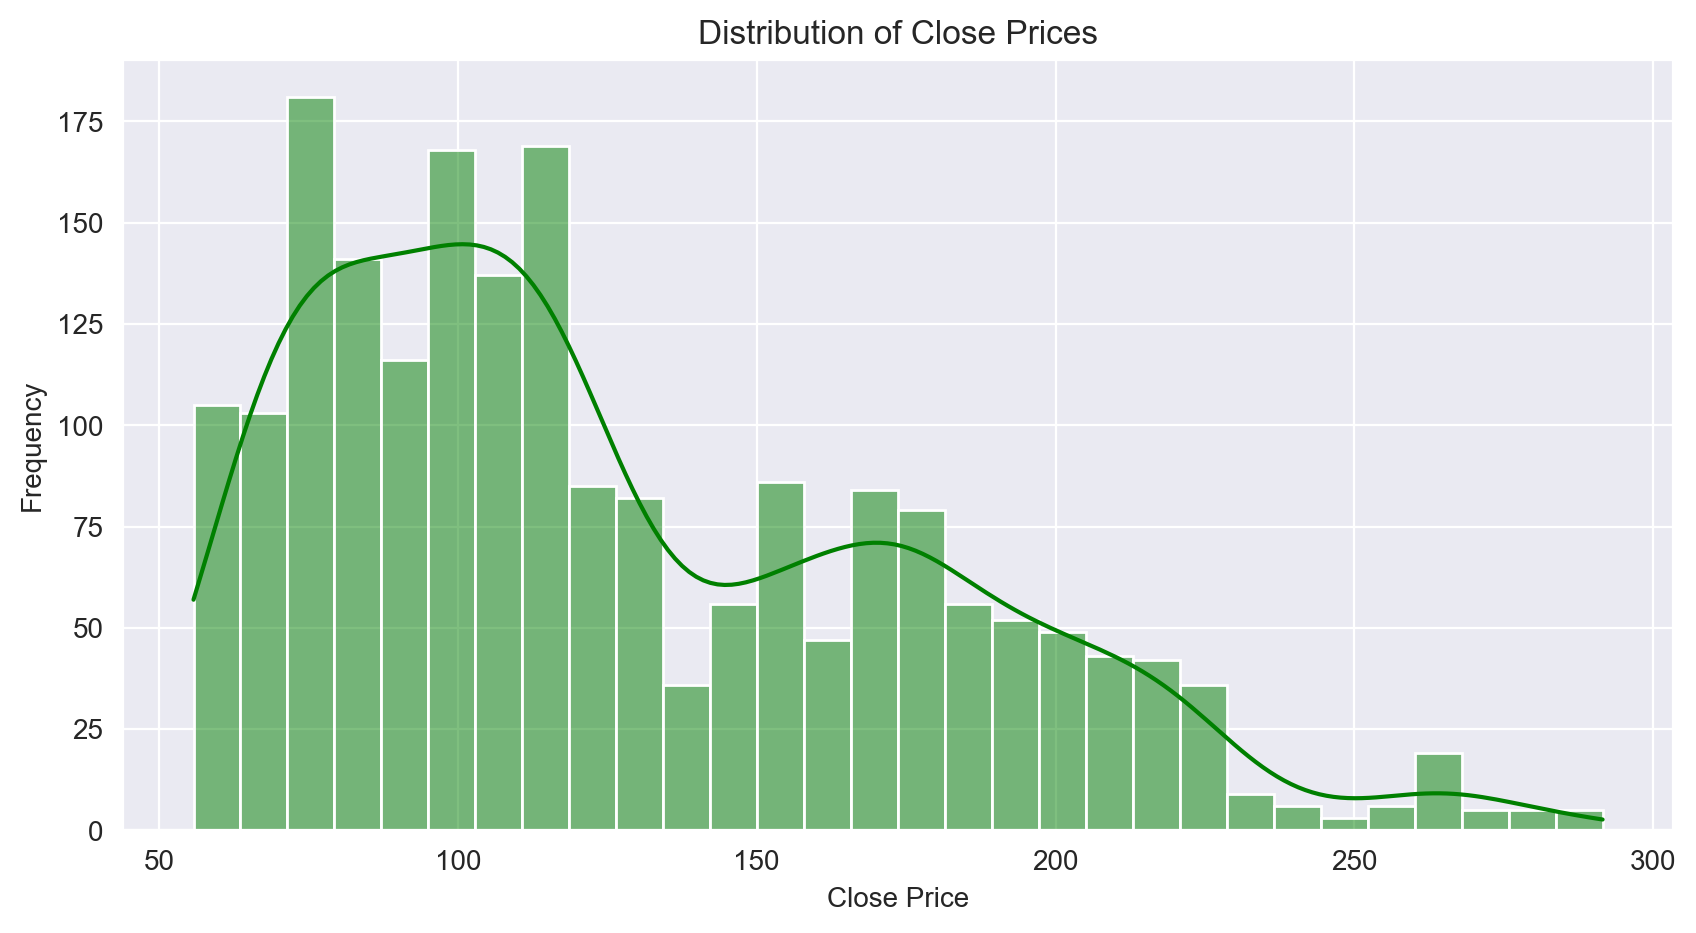

In [21]:
# Visualization: Distribution of Close prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], kde=True, bins=30, color='green')
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

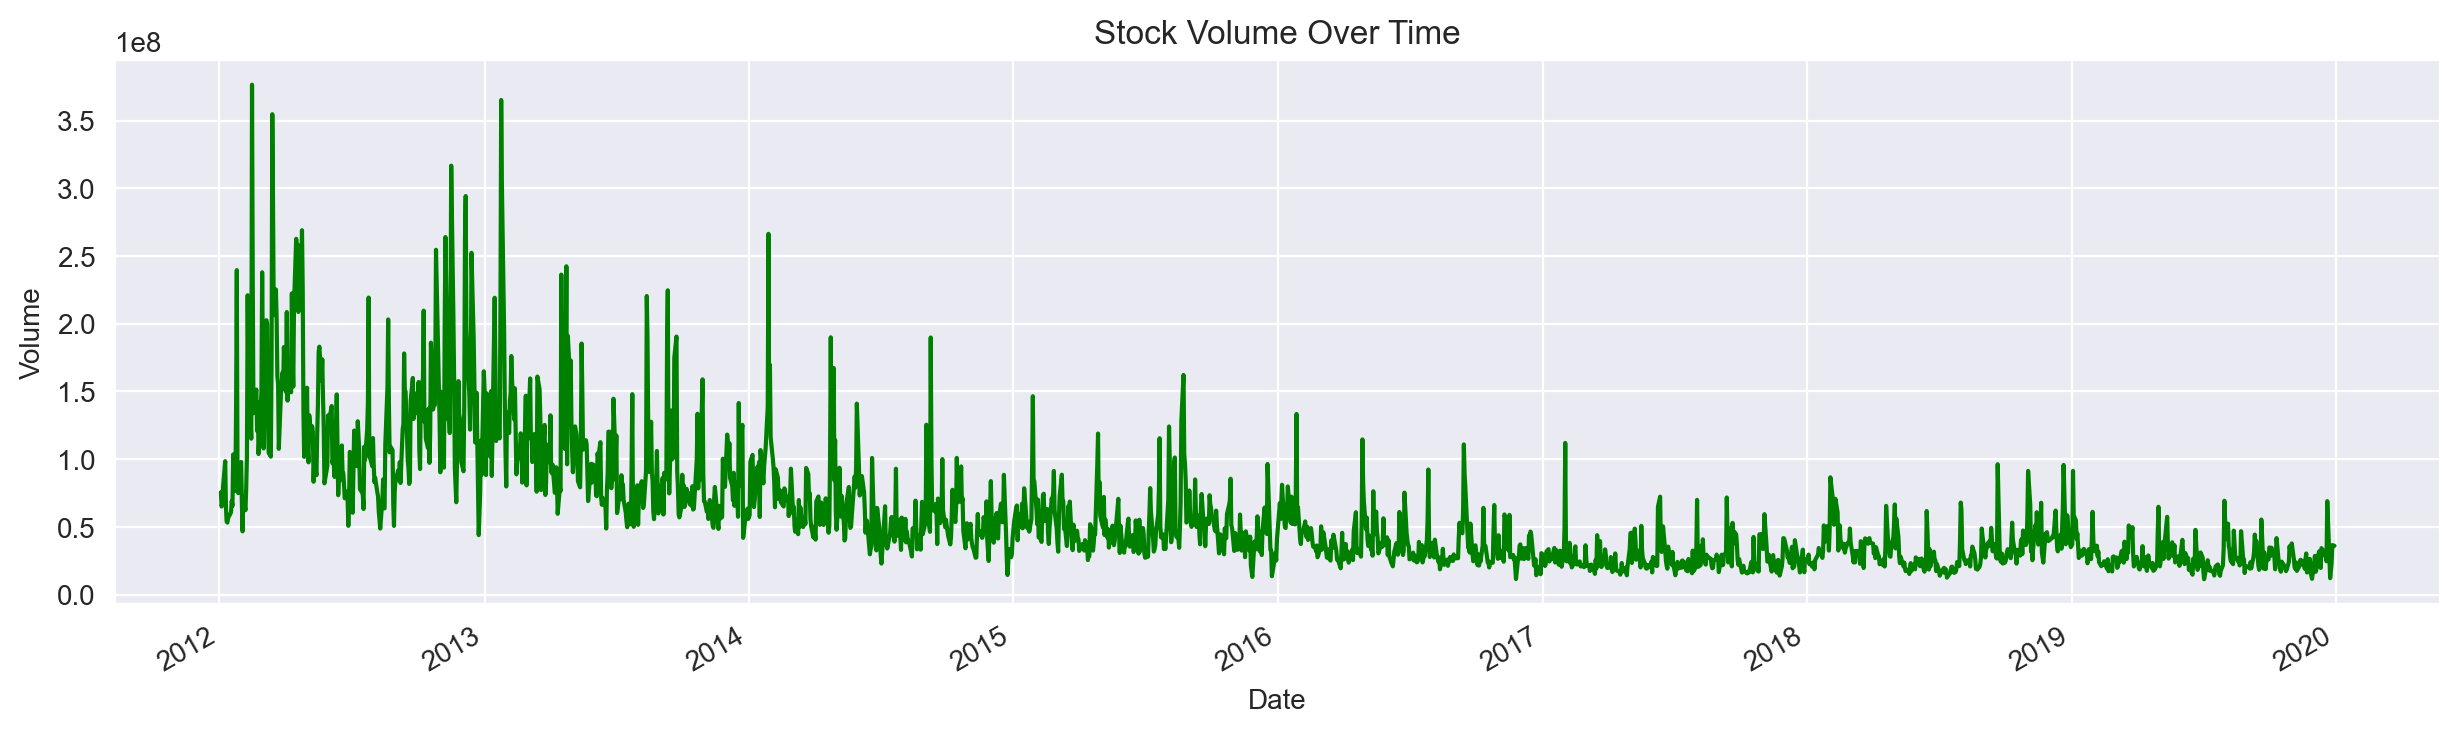

In [46]:
# Visualization of Volume over time
plt.figure(figsize=(15, 4))
df['Volume'].plot(kind='line', color='green')
plt.title("Stock Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

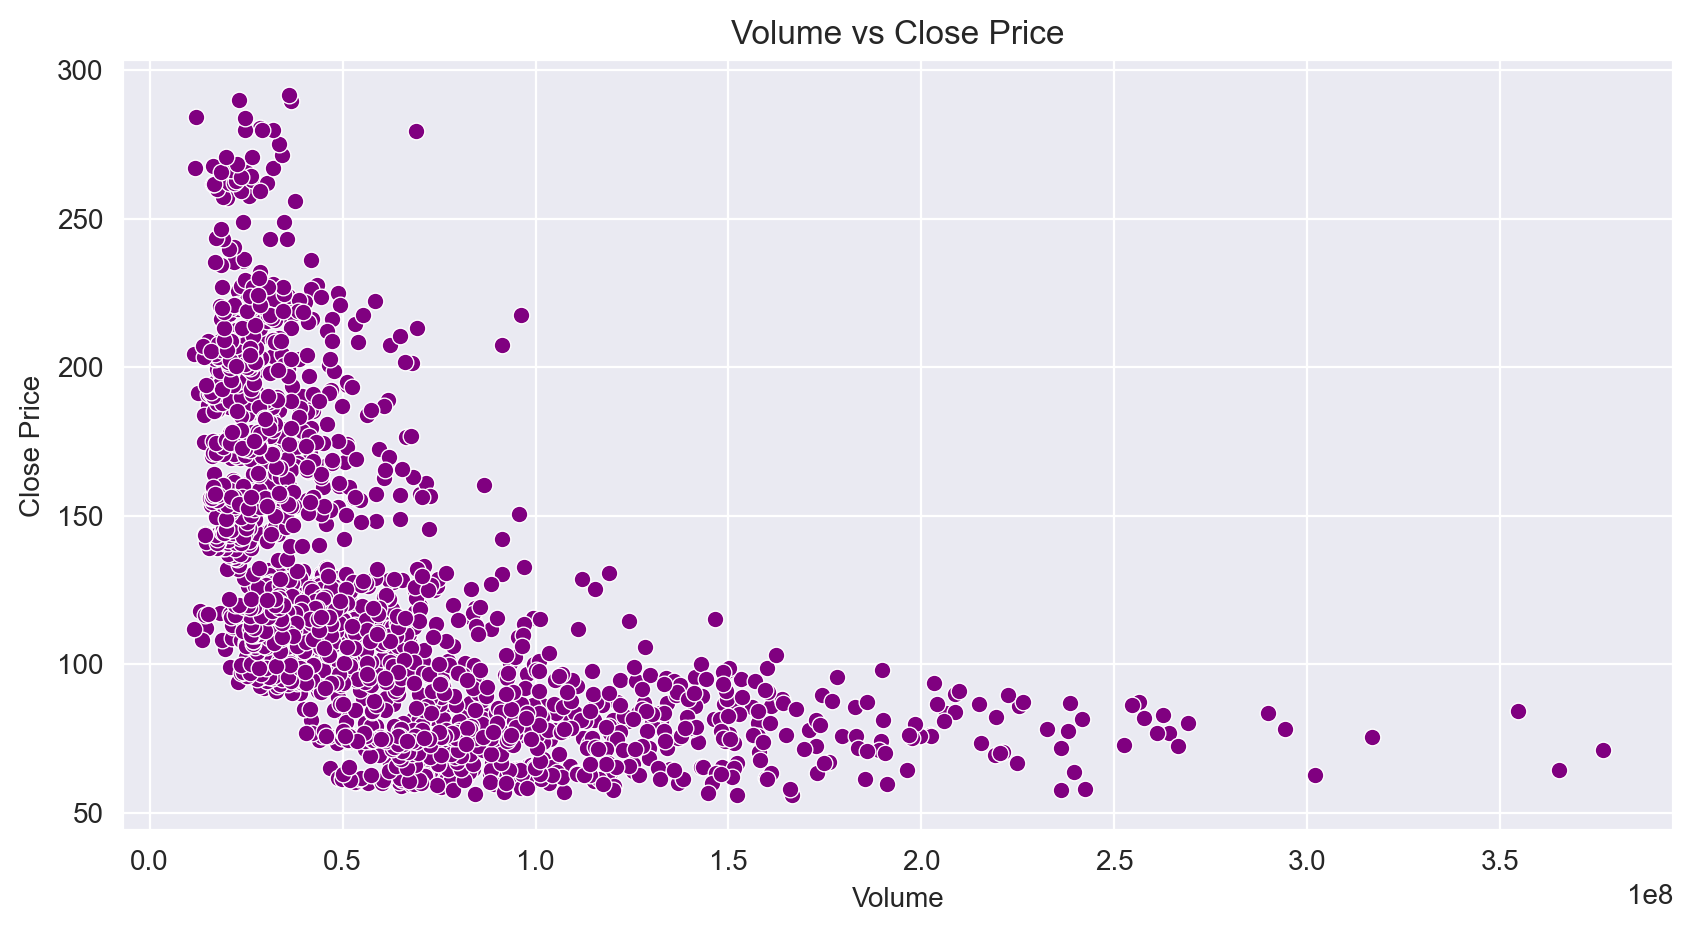

In [47]:
# Scatter plot of Volume vs Close
plt.figure(figsize=(10,5))
sns.scatterplot(x='Volume', y='Close', data=df, color='purple')
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()
# For Higher Close Price range of volume is lower

### Boxplot

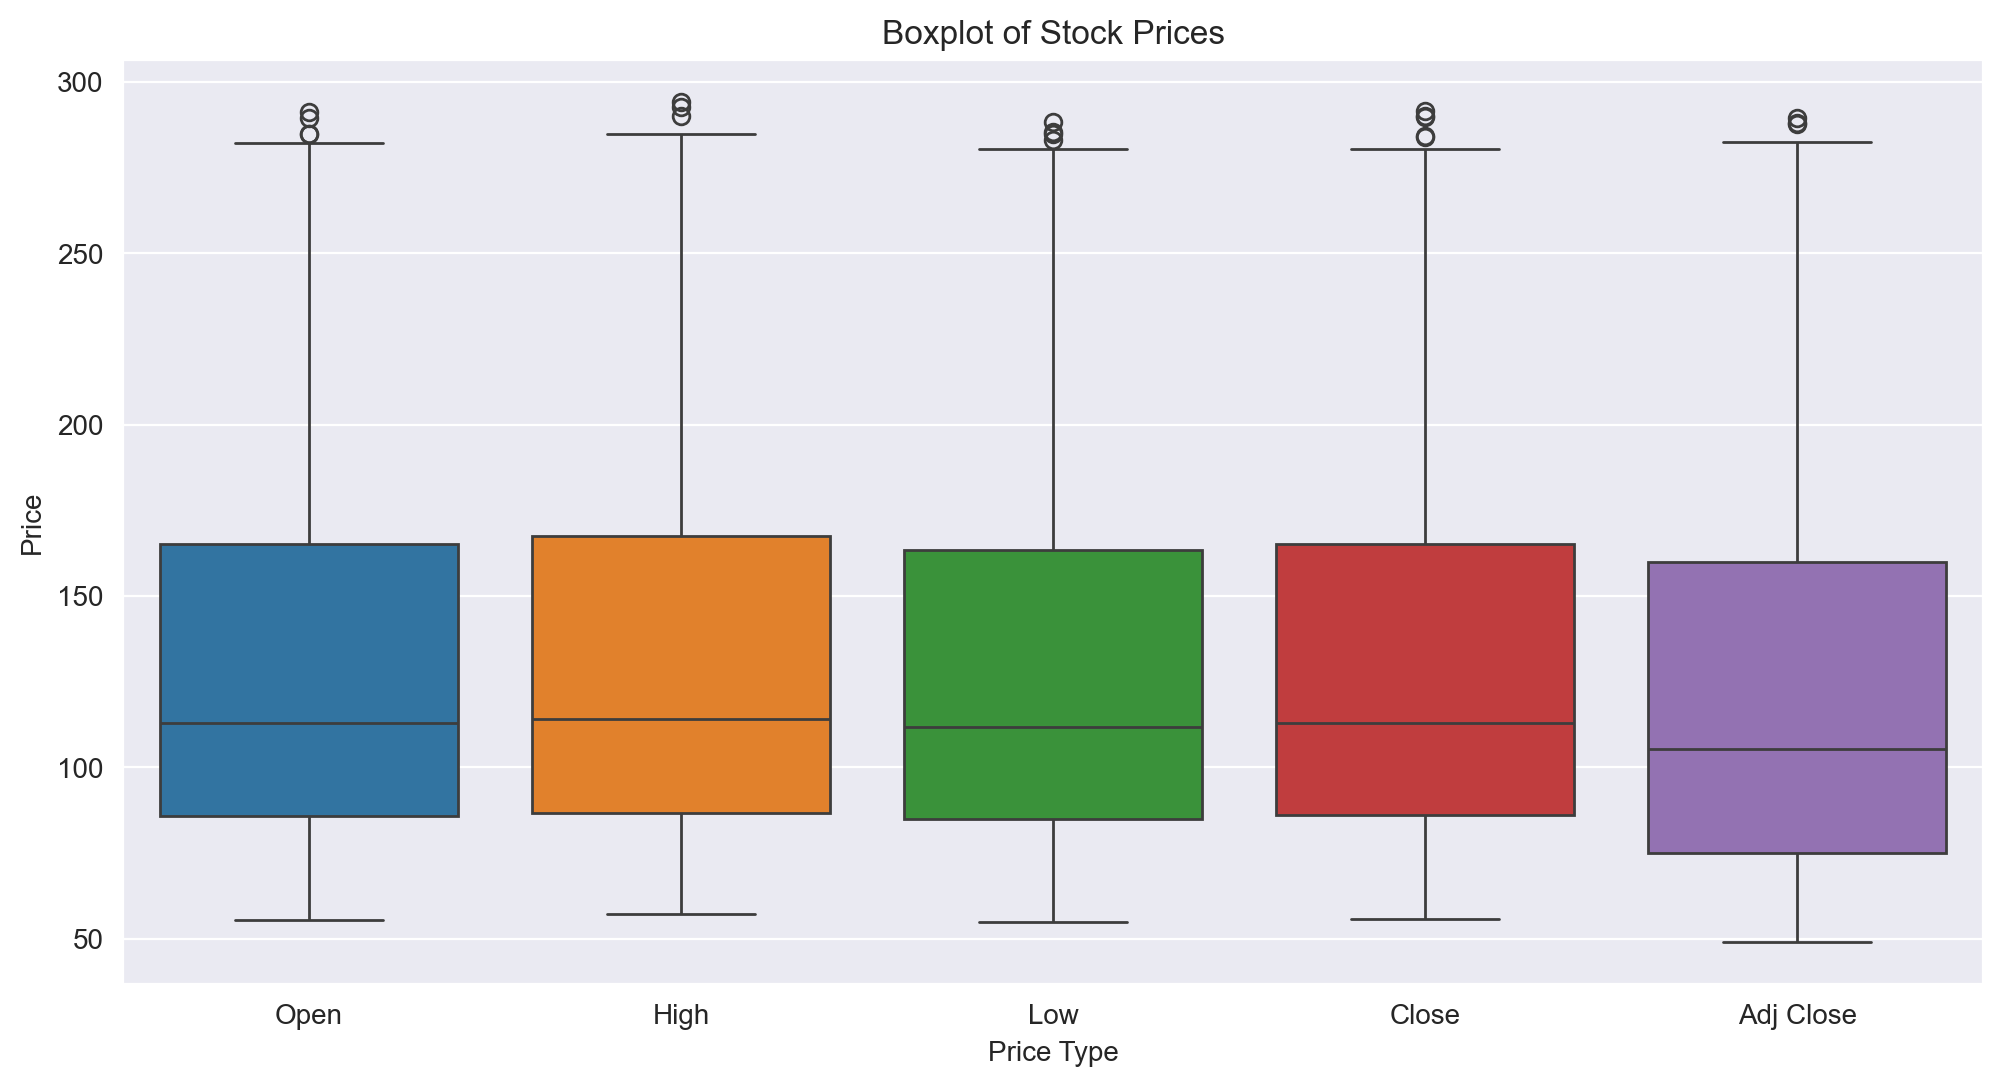

In [50]:
# Visualization: Boxplot for Price Range (High, Low, Close, Open)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close','Adj Close']])
plt.title("Boxplot of Stock Prices")
plt.xlabel("Price Type")
plt.ylabel("Price")
plt.show()

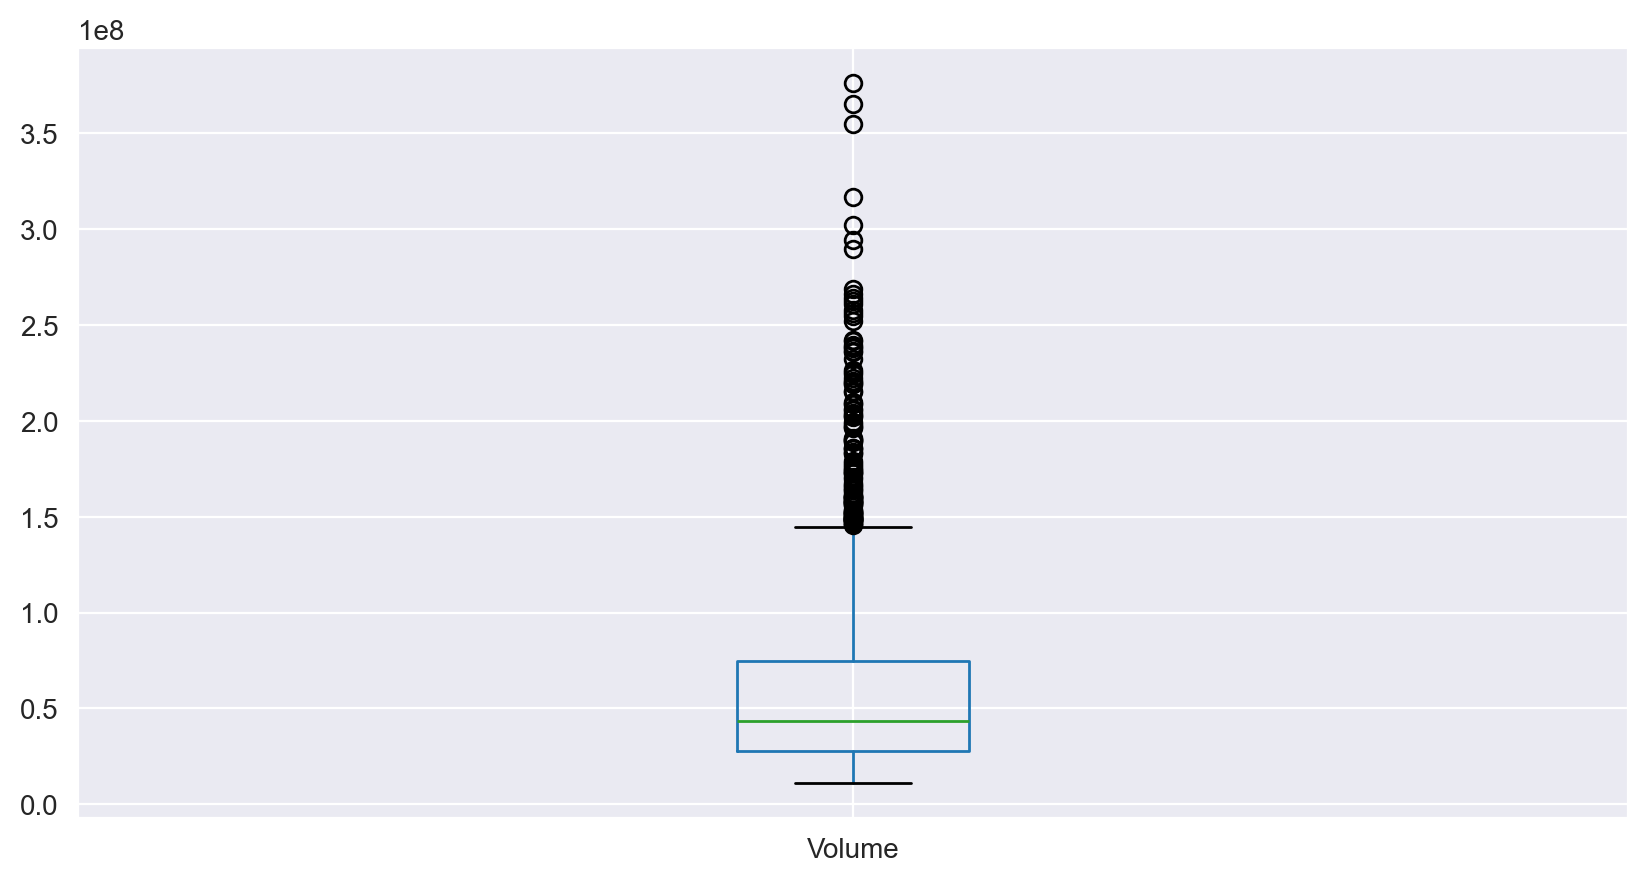

In [51]:
df.boxplot('Volume')
plt.show()

In [55]:
# Detecting outliers using the IQR method

outliers_summary = {}
for col in  df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col]=len(outliers)
    #remove outliers
    df=df[(df[col] >= lower_bound)  &  (df[col] <= upper_bound)]

print("Outlier counts per column:")
print(outliers_summary)

Outlier counts per column:
{'Open': 4, 'High': 0, 'Low': 1, 'Close': 0, 'Adj Close': 0, 'Volume': 127}


In [57]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...                ...         ...         ...         ...         ...   
2019-12-16  277.000000  280.790009  276.980011  279.859985  277.942474   
2019-12-17  279.570007  281.769989  278.799988  280.410004  278.488770   
2019-12-18  279.799988  281.899994  279.119995  279.739990  277.823334   
2019-12-19  279.500000  281.179993  278.950012  280.019989  278.101410   
2019-12-20  282.230011  282.649994  278.559998  279.440002  277.525391   

              Volume  
Date                  
2012-01-03  75555200  
2012-01-04  65005500  
2012-01-05  67817400  
2012-01-06  79573200  
2012-01-09  98506100  
...              ...  
2019-12-16  32046500  
2019-12-17  28539600  
2019-12-18  29007100  
2019-12-19  24592300  
2019-12-20  68994500  

[1879 rows x 6 columns]

### Correlation heatmap

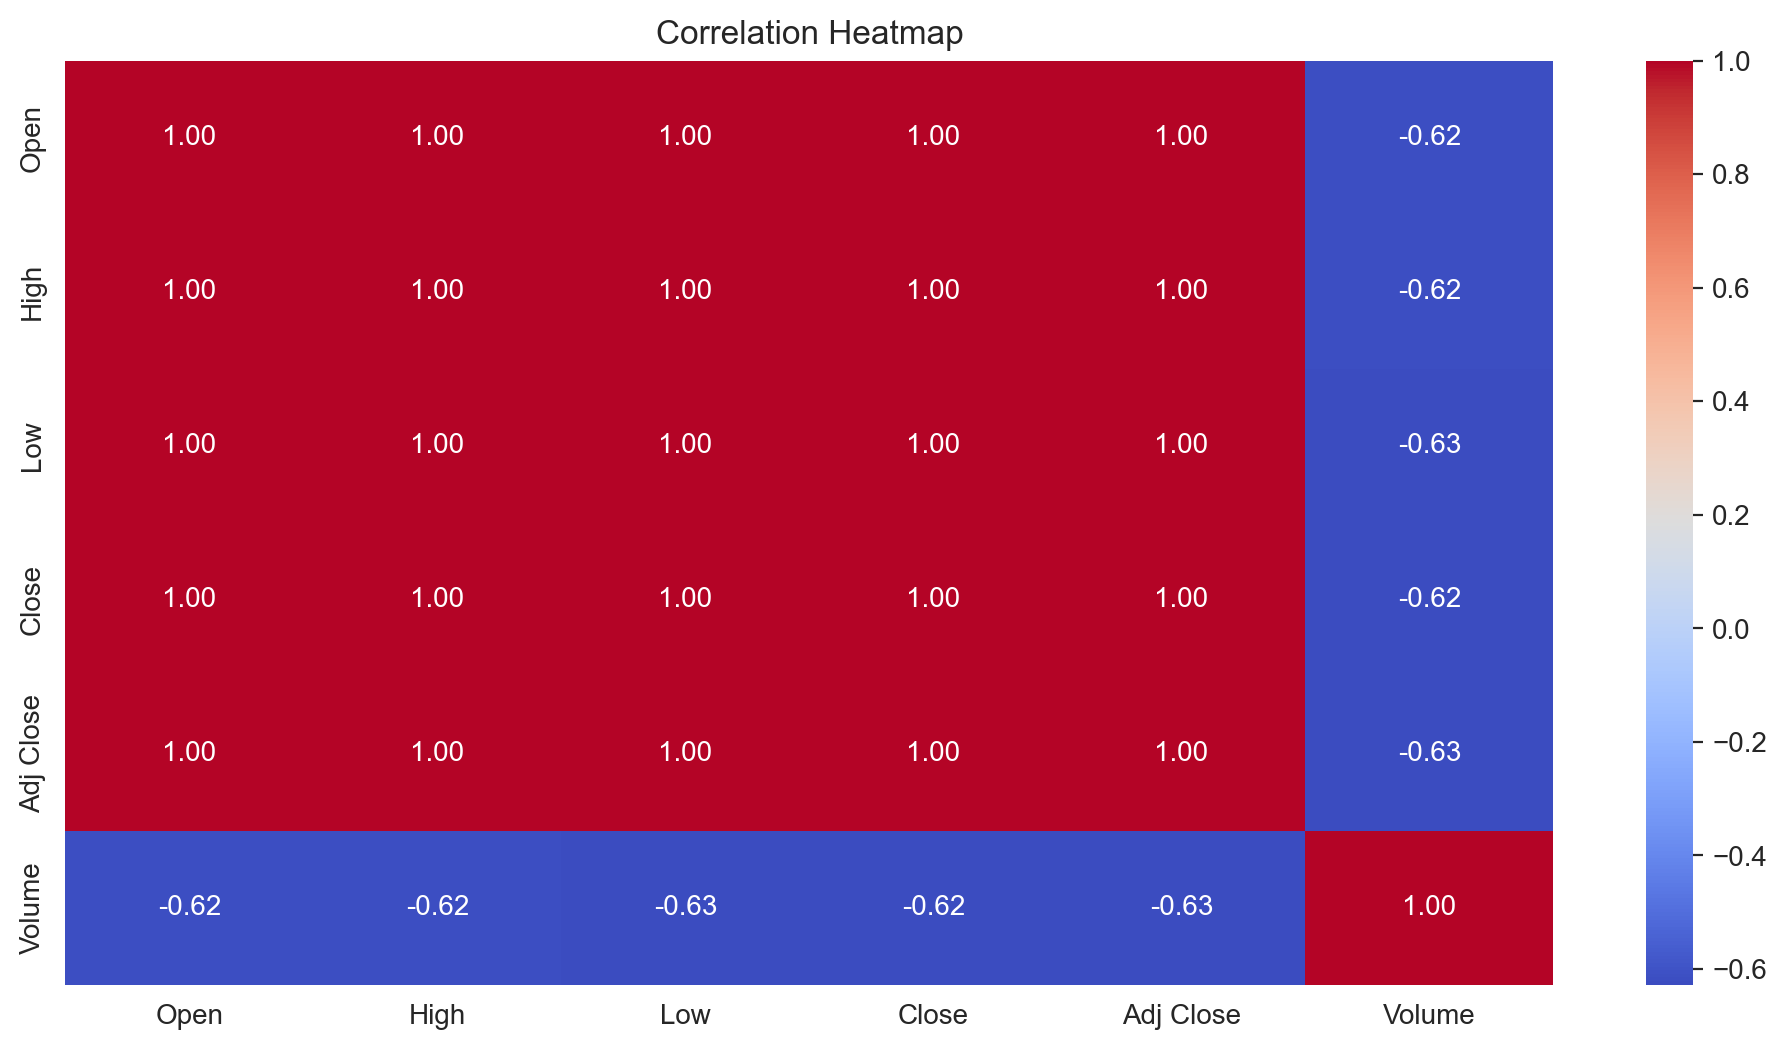

In [60]:
# Correlation heatmap
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
# Open, Close, High and Low columns are perfectly correlated to each other
# However, Volume column is negatively and partially correlated to those four columns

Correlation with Target Variable: Close        1.000000
Low          0.999776
High         0.999746
Open         0.999496
Adj Close    0.999412
Volume      -0.621902
Name: Close, dtype: float64


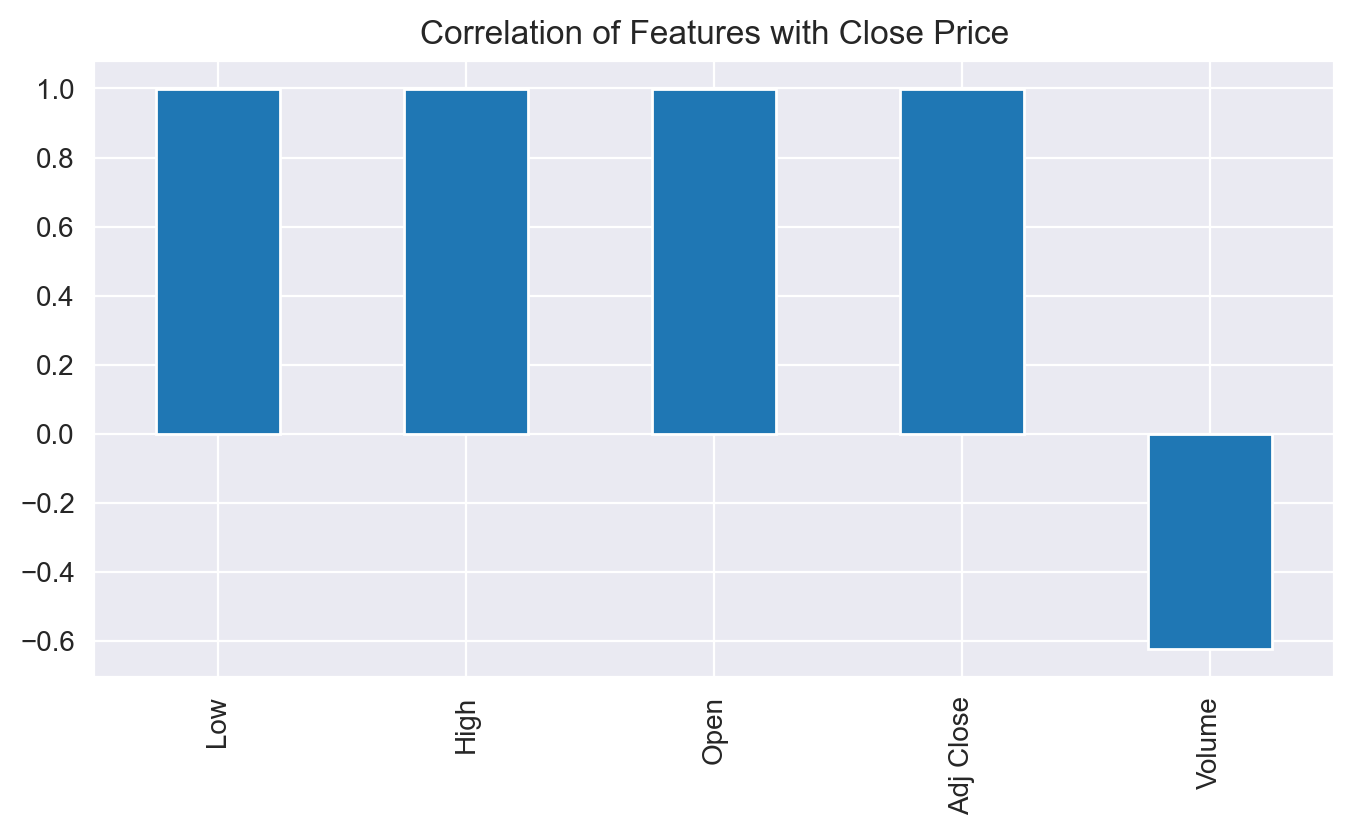

In [61]:
# Calculate correlation of features with the target variable
correlation_with_target = df.corr()['Close'].sort_values(ascending=False)
print("Correlation with Target Variable:", correlation_with_target)

correlation_with_target.drop('Close').plot(kind='bar', figsize=(8, 4))
plt.title("Correlation of Features with Close Price")
plt.show()

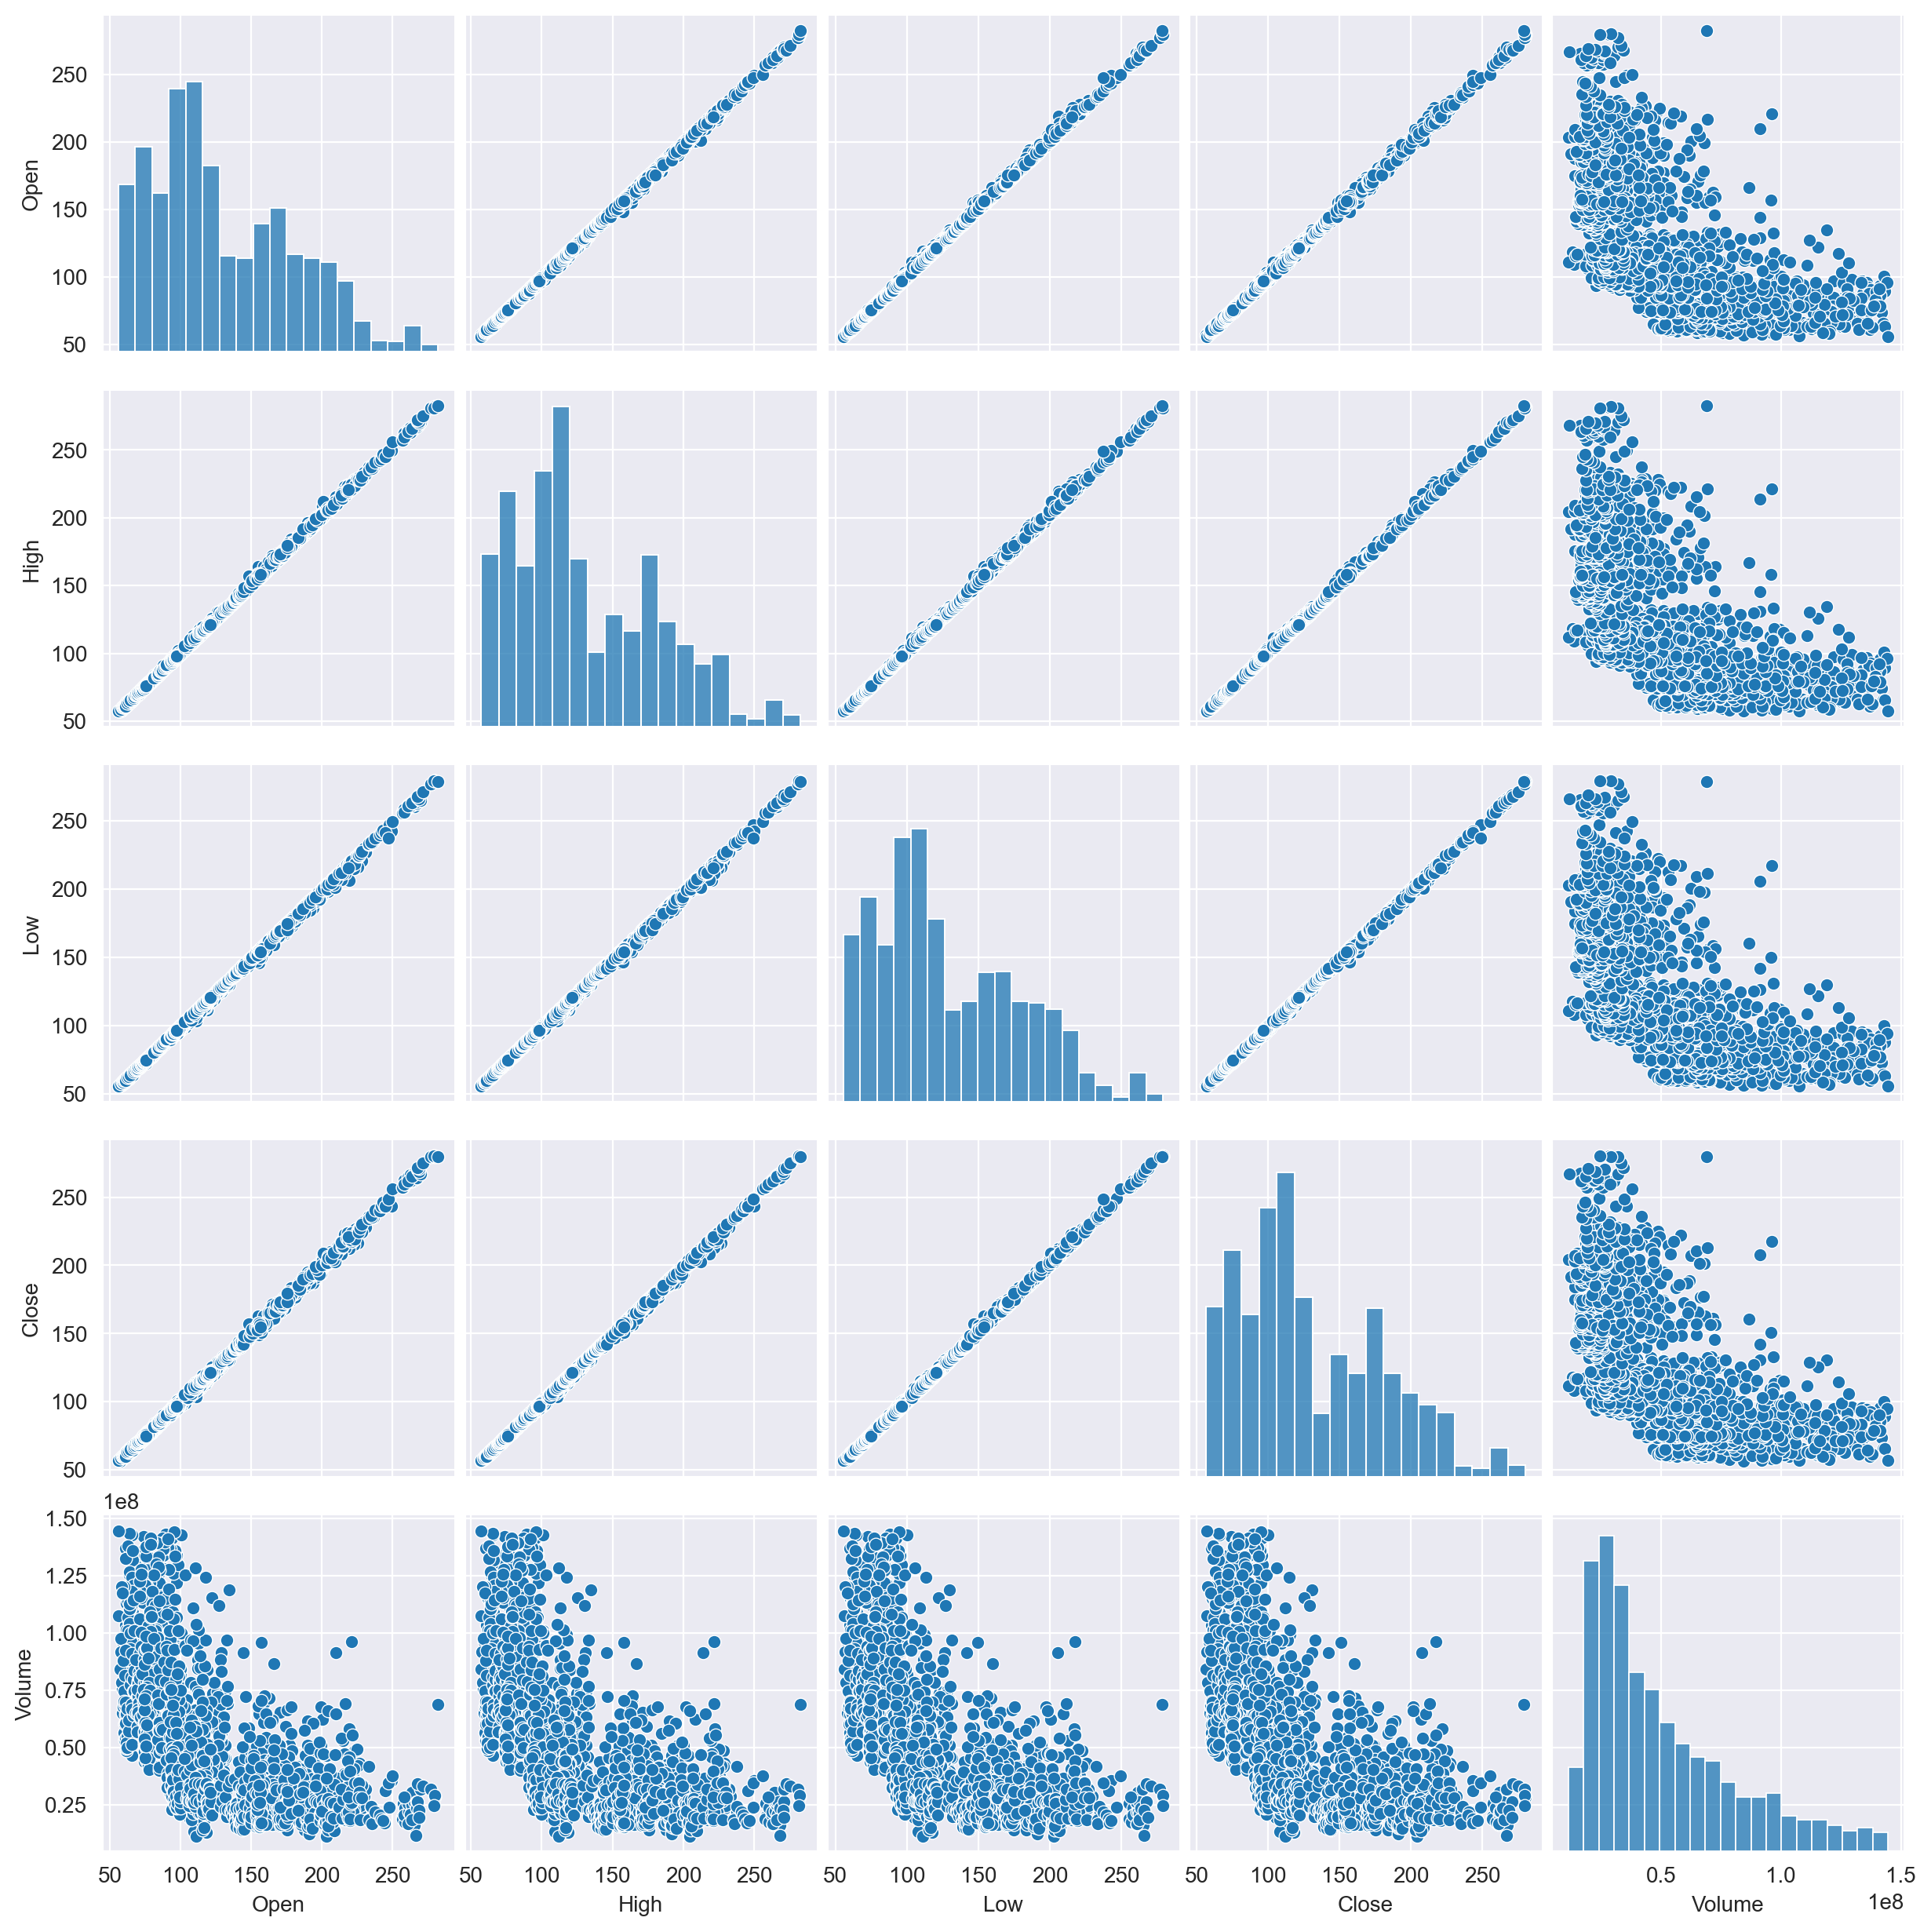

In [64]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

## calculate skewness and kurtosis

In [66]:
kurtosis = df['Close'].kurt()
kurtosis

-0.33666997732415727

In [67]:
skewness = df['Close'].skew()
skewness

0.6712845829576508

In [68]:
# Interpret the results
if abs(skewness) < 0.5:
    print("Data is approximately symmetric.")
elif skewness > 0:
    print("Data is positively skewed.")
else:
    print("Data is negatively skewed.")

if kurtosis < 3:
    print("Data has lighter tails than normal distribution (platykurtic).")
elif kurtosis > 3:
    print("Data has heavier tails than normal distribution (leptokurtic).")
else:
    print("Data is mesokurtic (normal kurtosis).")


Data is positively skewed.
Data has lighter tails than normal distribution (platykurtic).


## Resampling

In [74]:
# Resample the data to monthly instaed of daily by aggregating using mean
monthly_data = df['Close'].resample('M').mean()  # Take the average closing price for each month

In [76]:
# Display the monthly data
monthly_data

Date
2012-01-31     61.089474
2012-02-29     70.024725
2012-03-31     79.439714
2012-04-30     86.392500
2012-05-31     81.172946
                 ...    
2019-08-31    204.957728
2019-09-30    217.994999
2019-10-31    235.286521
2019-11-30    262.520503
2019-12-31    271.592663
Freq: ME, Name: Close, Length: 96, dtype: float64

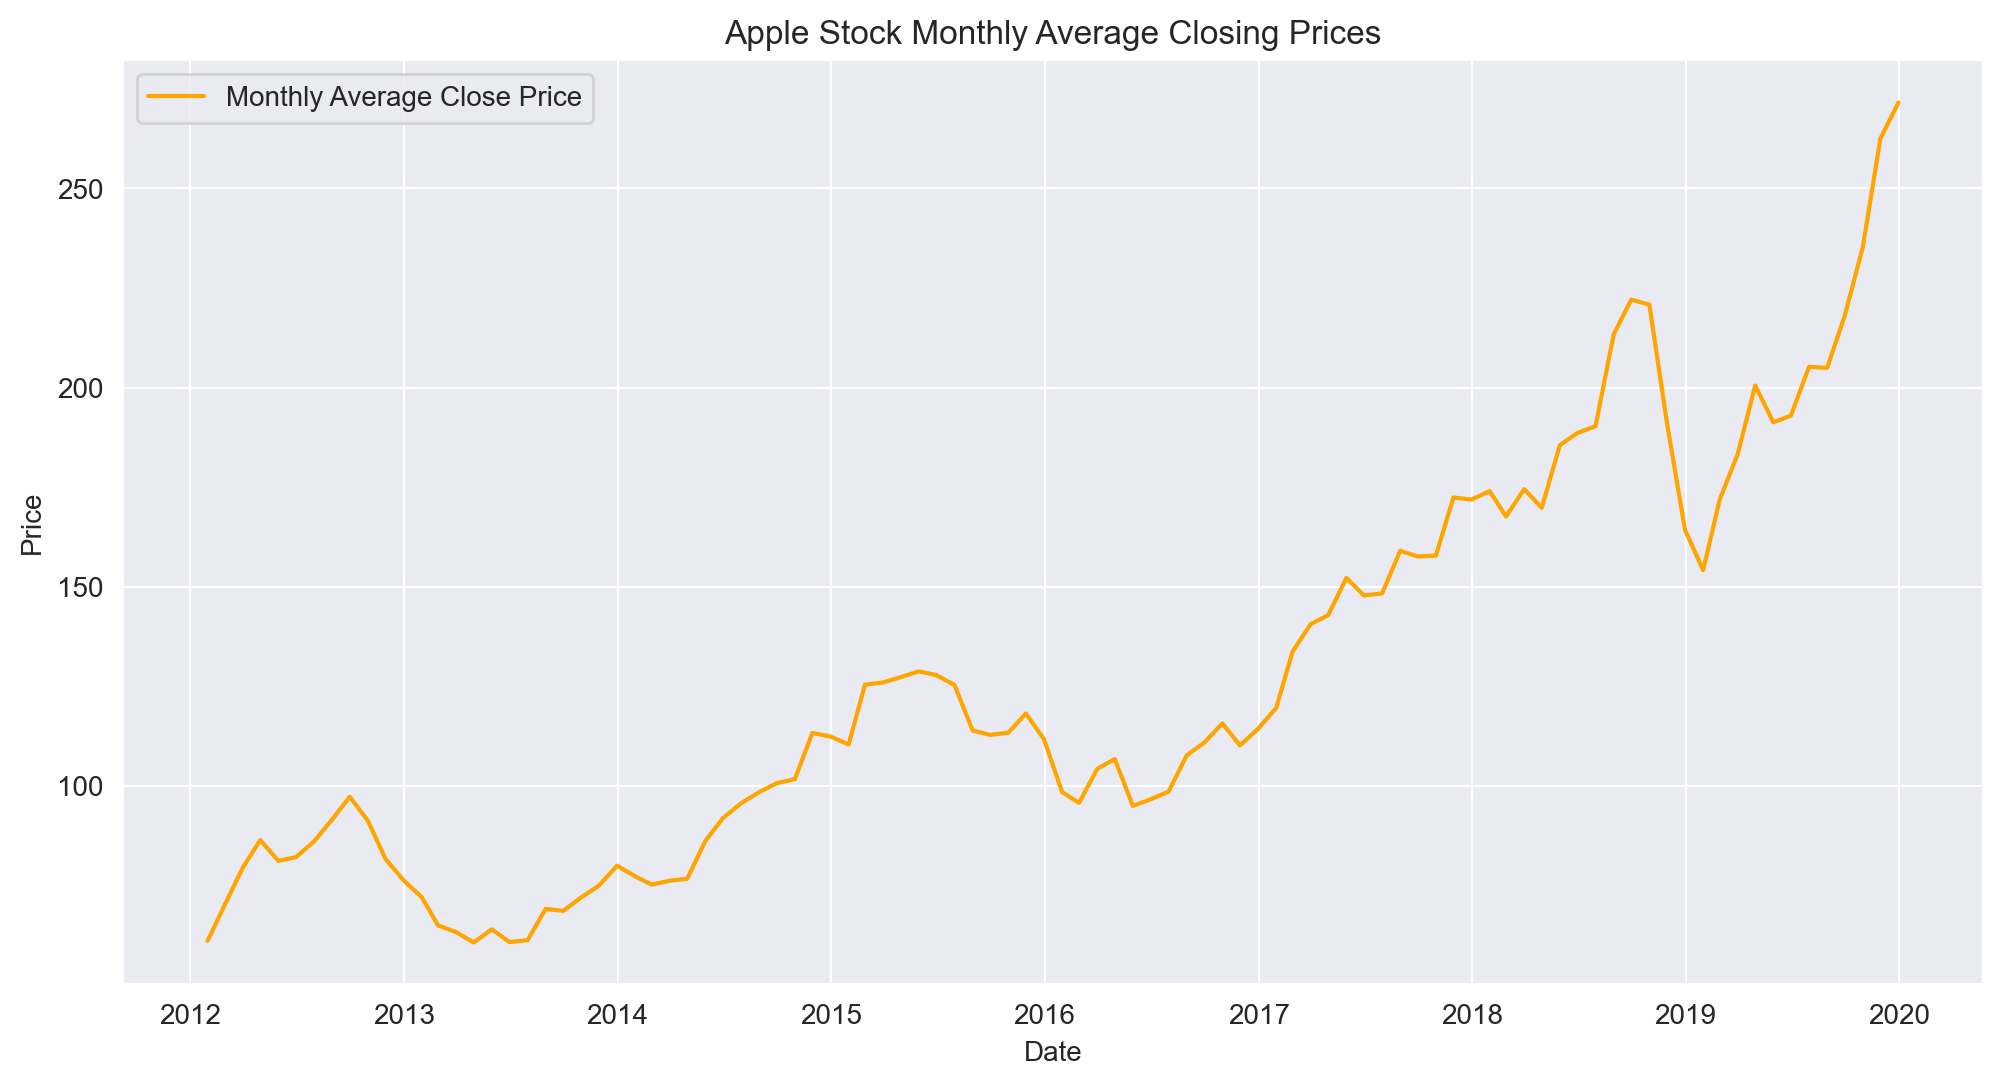

In [78]:
# Plot the monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Average Close Price', color='orange')
plt.title('Apple Stock Monthly Average Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

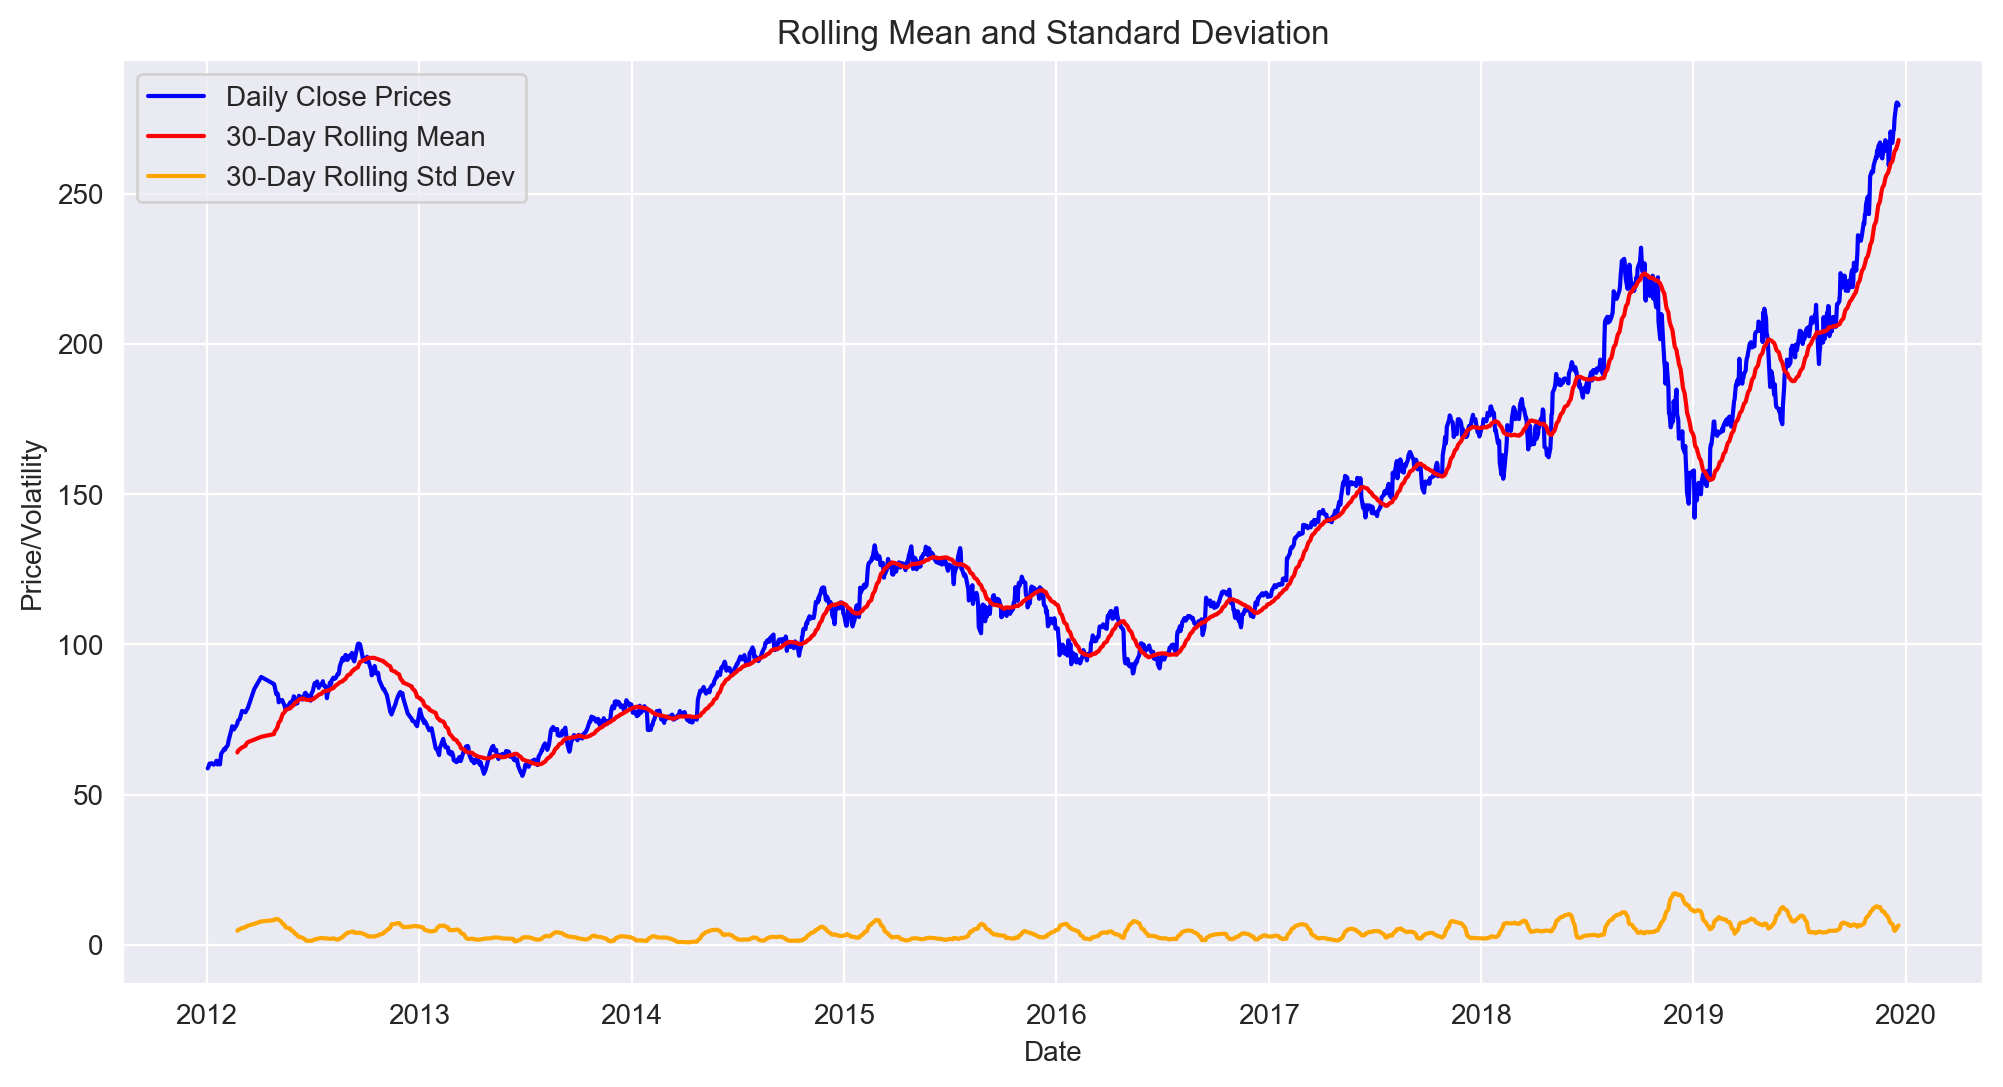

In [79]:
# Calculate the rolling mean (e.g., 30-day window)
df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
# Calculate the rolling standard deviation (e.g., 30-day window)
df['Rolling_Std'] = df['Close'].rolling(window=30).std()
# Plot rolling mean and standard deviation together
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Daily Close Prices', color='blue')
plt.plot(df['Rolling_Mean'], label='30-Day Rolling Mean', color='red')
plt.plot(df['Rolling_Std'], label='30-Day Rolling Std Dev', color='orange')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price/Volatility')
plt.legend()
plt.show()

### ACF and PACF

<Figure size 2000x1000 with 0 Axes>

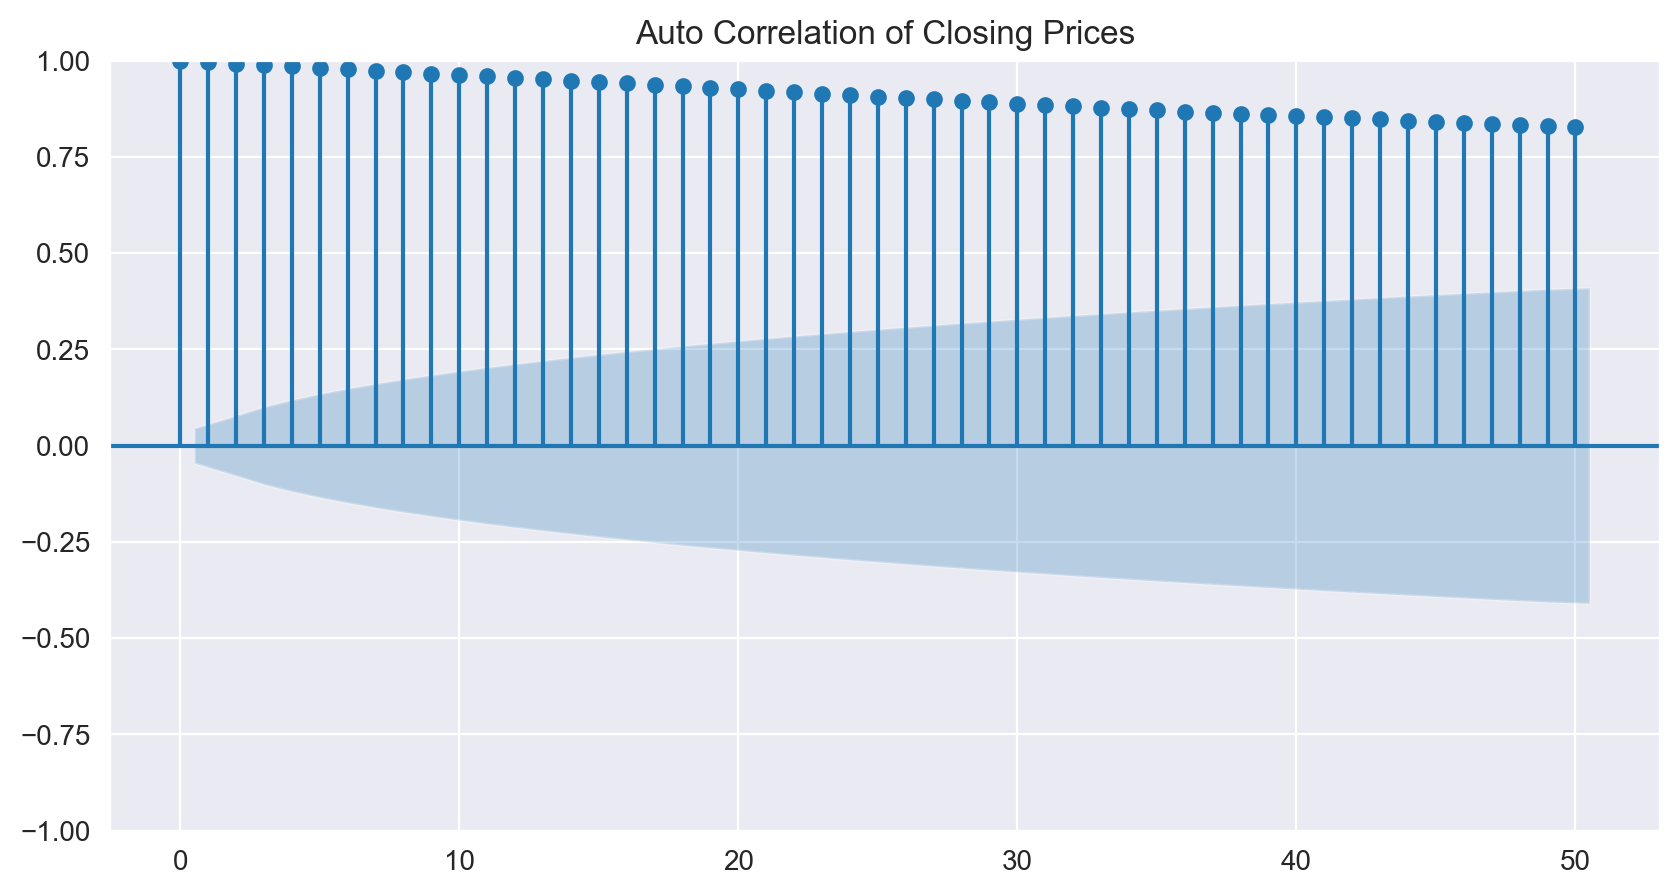

In [82]:
# Auto Correlation
plt.figure(figsize=(10, 5))
plot_acf(df['Close'],lags=50)
plt.title('Auto Correlation of Closing Prices')
plt.show()

<Figure size 2000x1000 with 0 Axes>

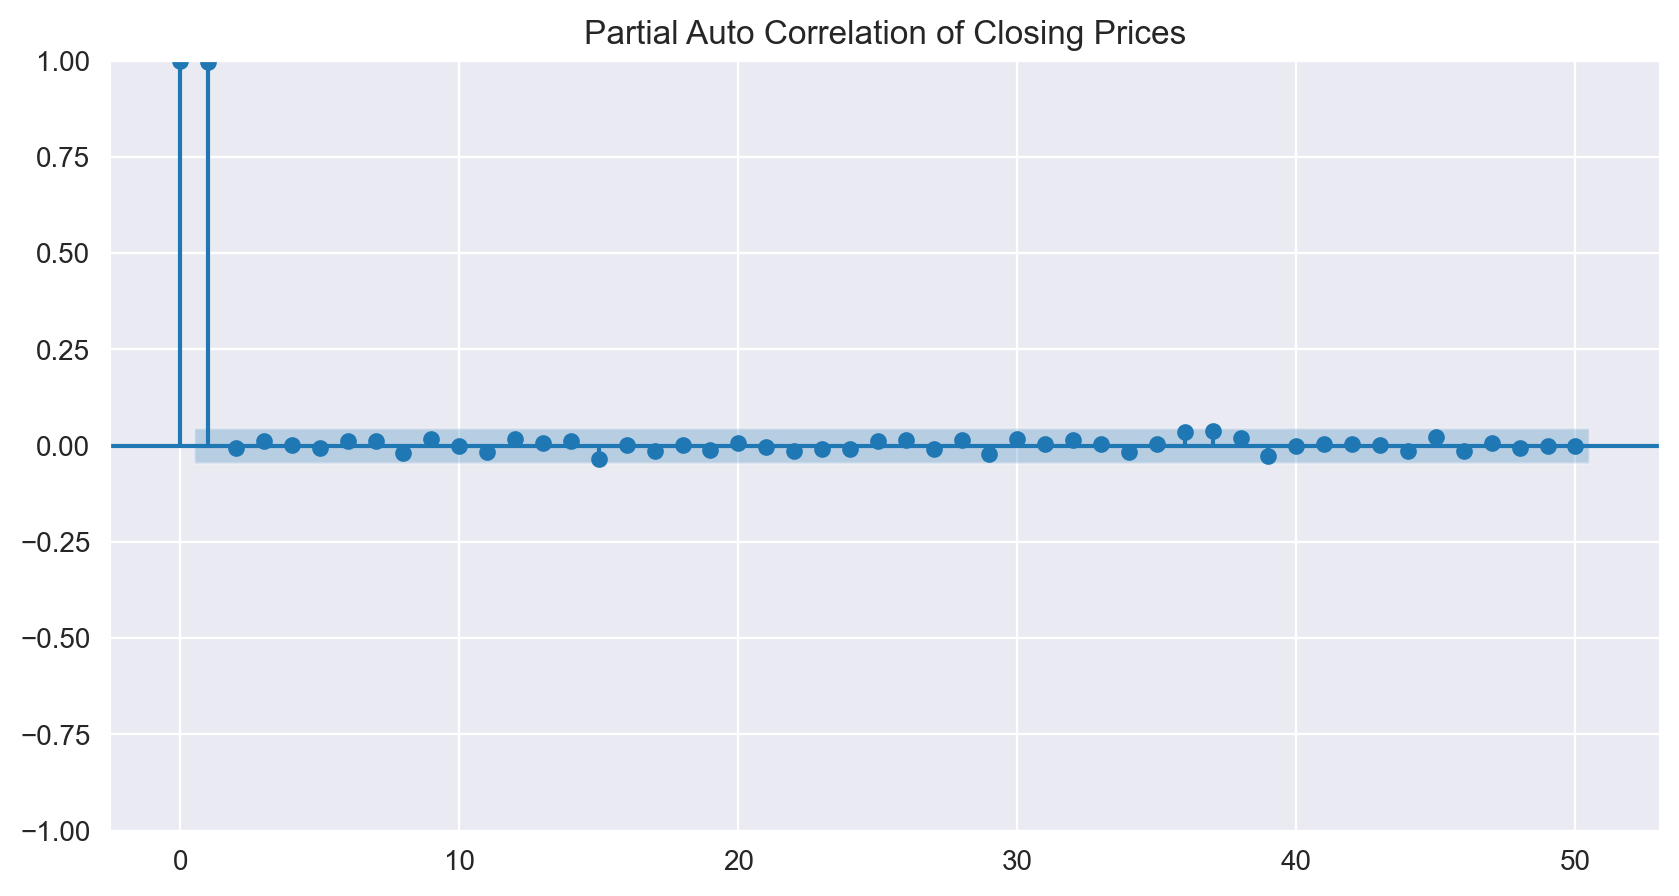

In [84]:
# Partial Auto Correlation
plt.figure(figsize=(10, 5))
plot_pacf(df['Close'],lags=50)
plt.title('Partial Auto Correlation of Closing Prices')
plt.show()

## Perform Augmented Dickey-Fuller (ADF) test

In [87]:
# perform ADF test
# H0 : the data is non stationary
# H1 : the data is stationary
# if p value < 0.05 -- reject null hypothesis . time series is statinary
# if p value >= 0.05 -- fail to reject null hypothesis . time series is non statinary

In [88]:
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:',result[4])
#interpret the result
if result[1] <= 0.05:
    print("The data is stationary--reject null hypothesis")
else:
    print("The data is non-stationary--fail to reject null hypothesis")

ADF Statistic: 0.8530604319404594
p-value: 0.9924461341921569
Critical Values: {'1%': -3.433851764270508, '5%': -2.863086831883029, '10%': -2.5675934770796993}
The data is non-stationary--fail to reject null hypothesis


## Differencing:

In [93]:
# Apply first differencing to make the data stationary
df['Close_diff'] = df['Close'] - df['Close'].shift(1)

# Drop the first row, as it will contain NaN
df.dropna(inplace=True)

# Check if the series is stationary using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value < 0.05, the series is stationary

if result[1] <= 0.05:
    print("The data is stationary--reject null hypothesis")
else:
    print("The data is non-stationary--fail to reject null hypothesis")

ADF Statistic: -14.6768338261339
p-value: 3.2018721893046005e-27
The data is stationary--reject null hypothesis


In [95]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [96]:
#from pmdarima import auto_arima
#model = auto_arima(train_df['Close_diff'], seasonal=False, stepwise=True)
#print(model.summary())

In [97]:
from statsmodels.graphics.tsaplots import plot_pacf

In [98]:
#diff=df.Close.diff().dropna()
#fig,(ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
#ax1.plot(diff)
#ax1.set_title('Difference once')
#ax2.set_ylim(0,1)
#plot_pacf(diff, ax=ax2)

Text(0, 0.5, 'Frequency')

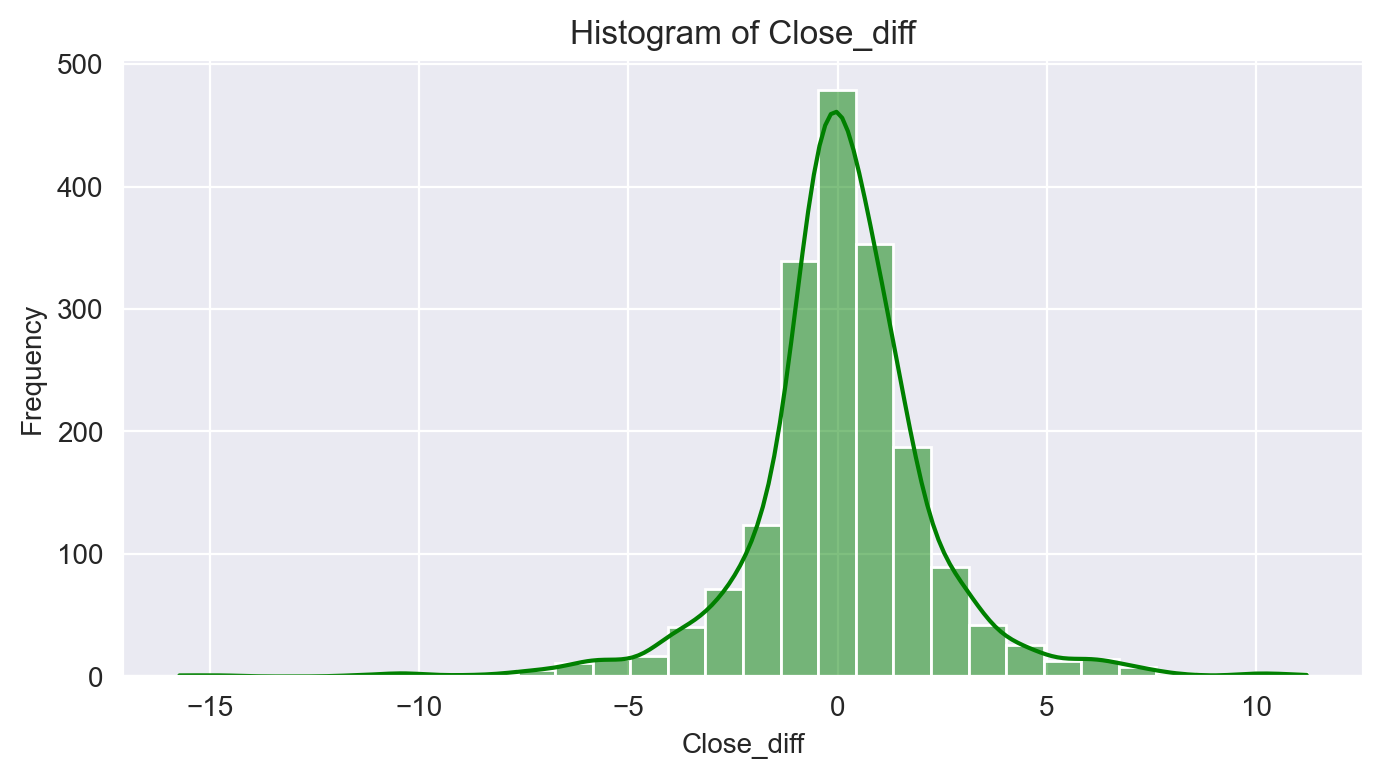

In [99]:
# Histogram of differenced close price
plt.figure(figsize=(8,4))
sns.histplot(df['Close_diff'],kde=True,bins=30,color='green')
plt.title('Histogram of Close_diff')
plt.xlabel('Close_diff')
plt.ylabel('Frequency')

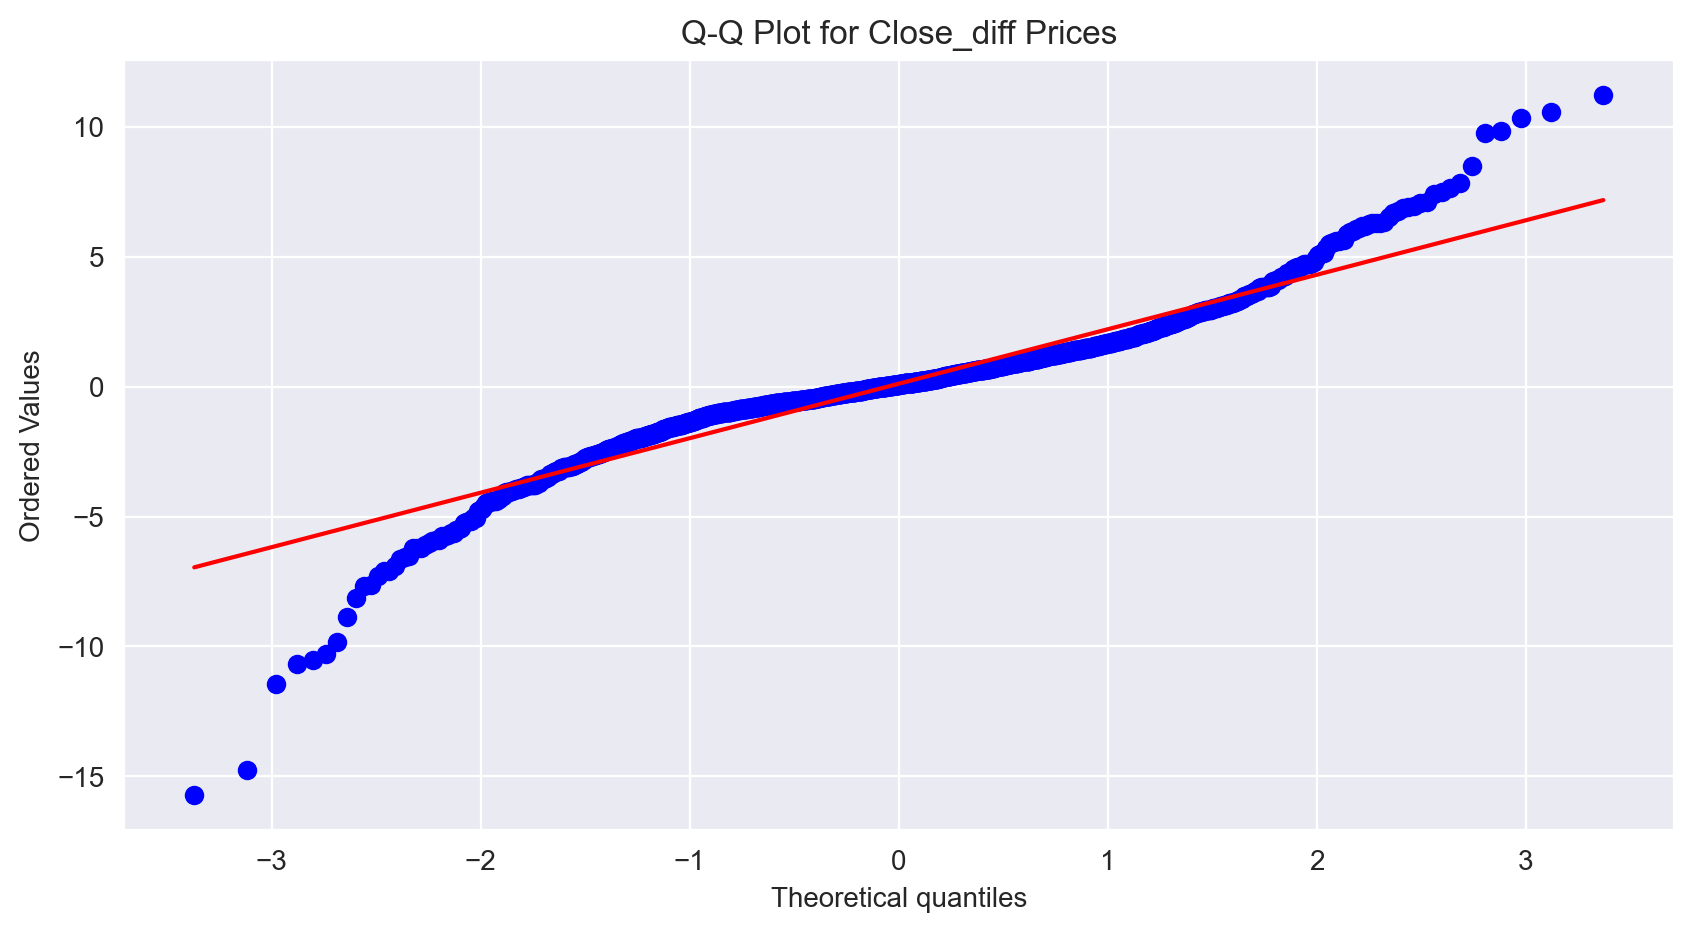

In [100]:
# Q-Q plot Differenced Close price

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot to check if the data follows a normal distribution
stats.probplot(df['Close_diff'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Close_diff Prices')
plt.show()
# If the points fall approximately on a straight diagonal line, the data is likely normally distributed.

In [101]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p = shapiro(df['Close_diff'])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p > 0.05:
    print("Data appears to be normally distributed (fail to reject H0).")
else:
    print("Data does not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.914277795472956, p-value: 4.0105892331382965e-31
Data does not appear to be normally distributed (reject H0).


In [109]:
# standardization
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'Close' column
df['Close_scaled'] = scaler.fit_transform(df[['Close_diff']])

# Check the range of the scaled values
print(df['Close_scaled'].describe())

count    1850.000000
mean        0.588026
std         0.081361
min         0.000000
25%         0.555308
50%         0.586939
75%         0.624350
max         1.000000
Name: Close_scaled, dtype: float64


In [110]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Rolling_Mean',
       'Rolling_Std', 'Close_diff', 'Close_scaled'],
      dtype='object')


In [113]:
# Create 'month' feature (ensure it's done before splitting)
df['month'] = df.index.month
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-02-23   73.582855   73.975716   72.785713   73.769997   63.747555   
2012-02-24   74.238571   74.699997   74.091431   74.629997   64.490730   
2012-02-27   74.472855   75.500000   73.754288   75.108574   64.904282   
2012-03-02   77.748573   78.114288   77.502853   77.882858   67.301636   
2012-03-08   76.384285   77.570000   76.017143   77.427139   66.907837   
...                ...         ...         ...         ...         ...   
2019-12-16  277.000000  280.790009  276.980011  279.859985  277.942474   
2019-12-17  279.570007  281.769989  278.799988  280.410004  278.488770   
2019-12-18  279.799988  281.899994  279.119995  279.739990  277.823334   
2019-12-19  279.500000  281.179993  278.950012  280.019989  278.101410   
2019-12-20  282.230011  282.649994  278.559998  279.440002  277.525391   

               Volume  Rolling_Mean  Rolling_Std  Close_diff  Close_scaled  \
Date                                                                         
2012-02-23  142006900     64.042762     4.691959    0.478569      0.601654   
2012-02-24  103768000     64.572190     4.962123    0.860000      0.615813   
2012-02-27  136895500     65.107047     5.206553    0.478577      0.601654   
2012-03-02  107928100     65.712524     5.599647    2.774284      0.686870   
2012-03-08  129114300     66.282000     5.895630   -0.455719      0.566974   
...               ...           ...          ...         ...           ...   
2019-12-16   32046500    264.962334     5.220723    4.709991      0.758723   
2019-12-17   28539600    265.726001     5.741173    0.550019      0.604306   
2019-12-18   29007100    266.479667     6.049598   -0.670014      0.559019   
2019-12-19   24592300    267.239000     6.275300    0.279999      0.594283   
2019-12-20   68994500    267.906001     6.476854   -0.579987      0.562361   

            month  
Date               
2012-02-23      2  
2012-02-24      2  
2012-02-27      2  
2012-03-02      3  
2012-03-08      3  
...           ...  
2019-12-16     12  
2019-12-17     12  
2019-12-18     12  
2019-12-19     12  
2019-12-20     12  

[1850 rows x 11 columns]

## Splitting

In [116]:
# Split data into training (2012-2018) and testing (2019)
# test_start_date='2019-01-01'
train_df = df[df.index < '2019-01-01']
test_df = df[df.index >= '2019-01-01']

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 1604
Testing set size: 246


In [118]:
train_df.shape

(1604, 11)

In [120]:
test_df.shape

(246, 11)

## Model Building

### 1. ARIMA Model

In [124]:
pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


In [165]:
from pmdarima import auto_arima
order = auto_arima(train_df['Close_diff'].dropna())
order

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

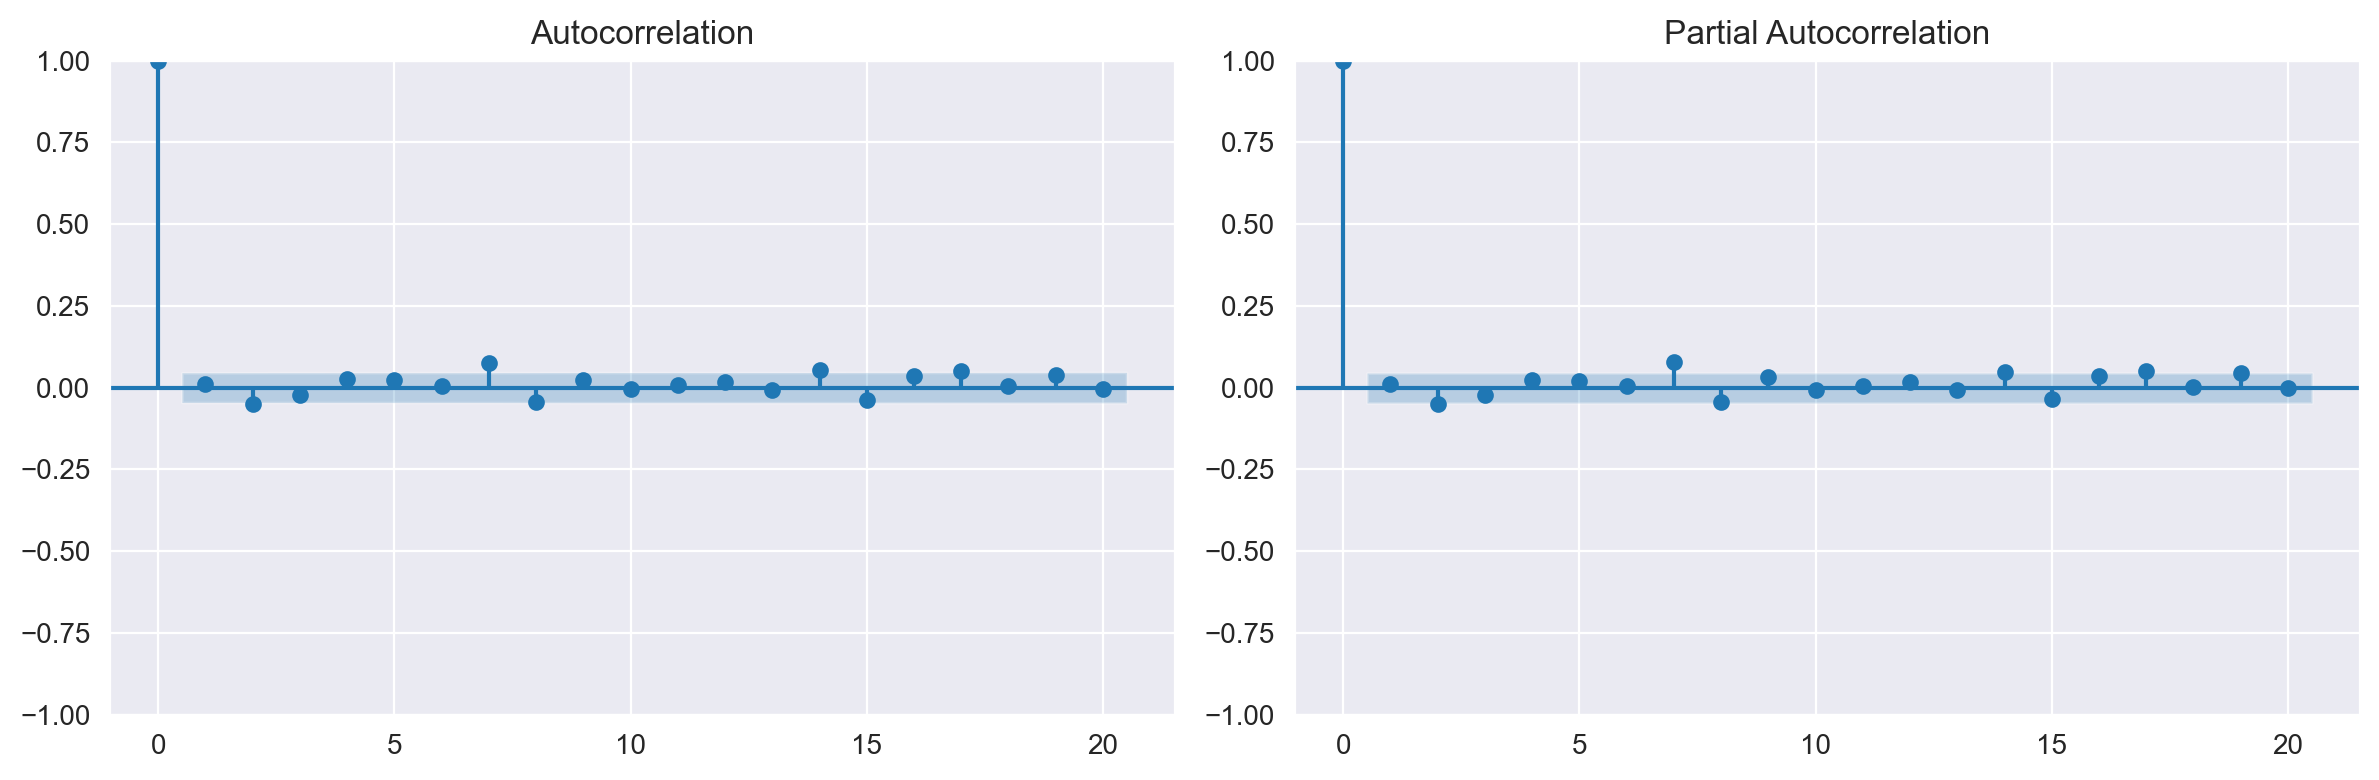

In [126]:
# ACF Plot of Differenced Close Price 
# PACF Plot of Differenced Close Price
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df['Close_diff'], lags=20, ax=axes[0])
smt.graphics.plot_pacf(df['Close_diff'], lags=20, ax=axes[1])
plt.tight_layout()
# q value- 4--4 values not in the shaeded region
# p value --3--3 values not in the shaeded region

In [128]:
from statsmodels.tsa.arima.model import ARIMA
#Fit the ARIMA model
model= ARIMA(train_df['Close_diff'],order=(1,0,1))
result=model.fit()

In [129]:
# summary of the model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 1604
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3371.885
Date:                Wed, 05 Feb 2025   AIC                           6751.770
Time:                        18:01:40   BIC                           6773.291
Sample:                             0   HQIC                          6759.760
                               - 1604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0526      0.050      1.042      0.297      -0.046       0.151
ar.L1         -0.8932      0.059    -15.026      0.000      -1.010      -0.777
ma.L1          0.9186      0.052     17.590      0.0

In [132]:
pred_ARIMA=result.forecast(steps=len(test_df))
pred_ARIMA

1604   -0.081326
1605    0.172162
1606   -0.054262
1607    0.147988
1608   -0.032669
          ...   
1845    0.052566
1846    0.052566
1847    0.052566
1848    0.052566
1849    0.052566
Name: predicted_mean, Length: 246, dtype: float64

In [134]:
ypred_series = pd.Series(pred_ARIMA.values, index=test_df.index)

In [136]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = result.forecast(steps=forecast_steps)
forecast_values
# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

# Create a DataFrame with forecasted values
forecast_ARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_ARIMA)

            Forecast
Date                
2019-12-31 -0.081326
2020-01-01  0.172162
2020-01-02 -0.054262
2020-01-03  0.147988
2020-01-06 -0.032669
2020-01-07  0.128701
2020-01-08 -0.015441
2020-01-09  0.113312
2020-01-10 -0.001695
2020-01-13  0.101033
2020-01-14  0.009273
2020-01-15  0.091236
2020-01-16  0.018024
2020-01-17  0.083420
2020-01-20  0.025006
2020-01-21  0.077183
2020-01-22  0.030576
2020-01-23  0.072207
2020-01-24  0.035021
2020-01-27  0.068237
2020-01-28  0.038567
2020-01-29  0.065070
2020-01-30  0.041397
2020-01-31  0.062542
2020-02-03  0.043654
2020-02-04  0.060526
2020-02-05  0.045456
2020-02-06  0.058917
2020-02-07  0.046893
2020-02-10  0.057633


In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

mae_arima = mean_absolute_error(test_df['Close_diff'], pred_ARIMA)
mse_arima = mean_squared_error(test_df['Close_diff'], pred_ARIMA)
rmse_arima = root_mean_squared_error(test_df['Close_diff'], pred_ARIMA)
r2_arima = r2_score(test_df['Close_diff'],pred_ARIMA )

print("Mean Squared Error:", mse_arima)
print("Root Mean Squared Error:",rmse_arima)
print("Mean Absolute Error:", mae_arima)
print("R-squared:", r2_arima)

Mean Squared Error: 10.508855350370917
Root Mean Squared Error: 3.2417364714564503
Mean Absolute Error: 2.3499389112673774
R-squared: -0.02120247441711509


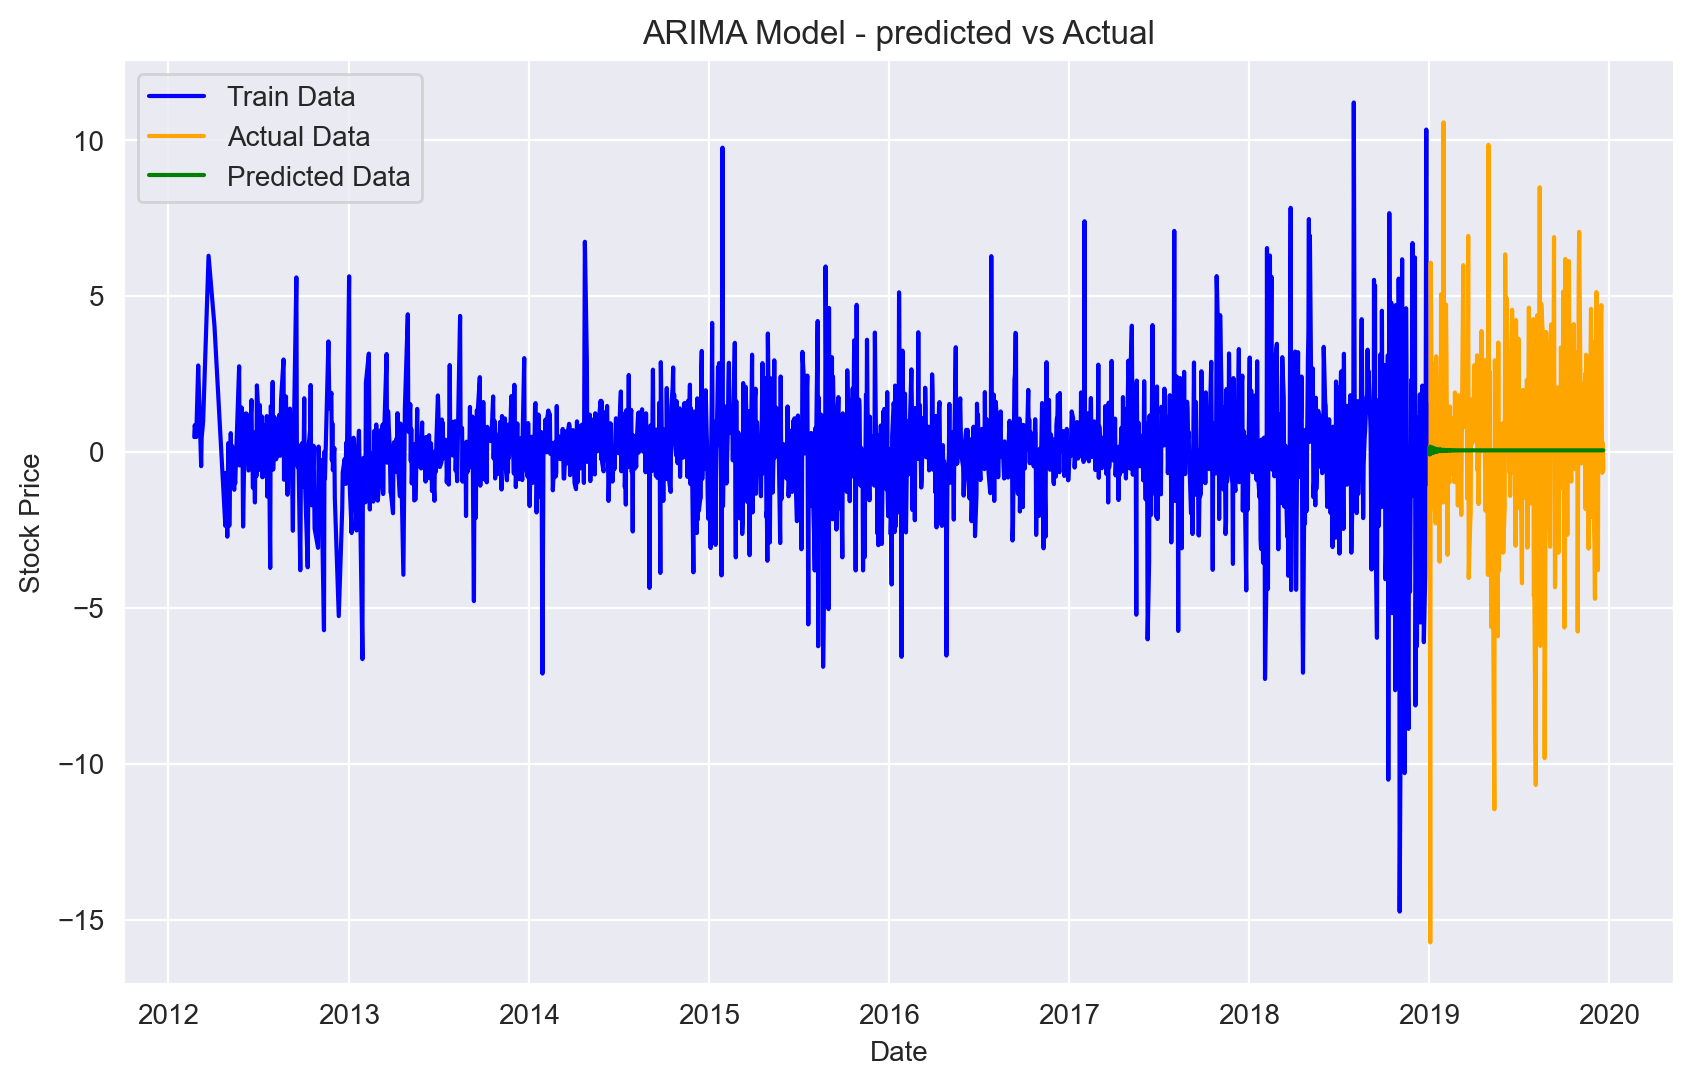

In [140]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_df['Close_diff'], label='Train Data', color='blue')
plt.plot(test_df['Close_diff'], label='Actual Data', color='orange')
plt.plot(ypred_series, label='Predicted Data', color='green')
plt.title('ARIMA Model - predicted vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

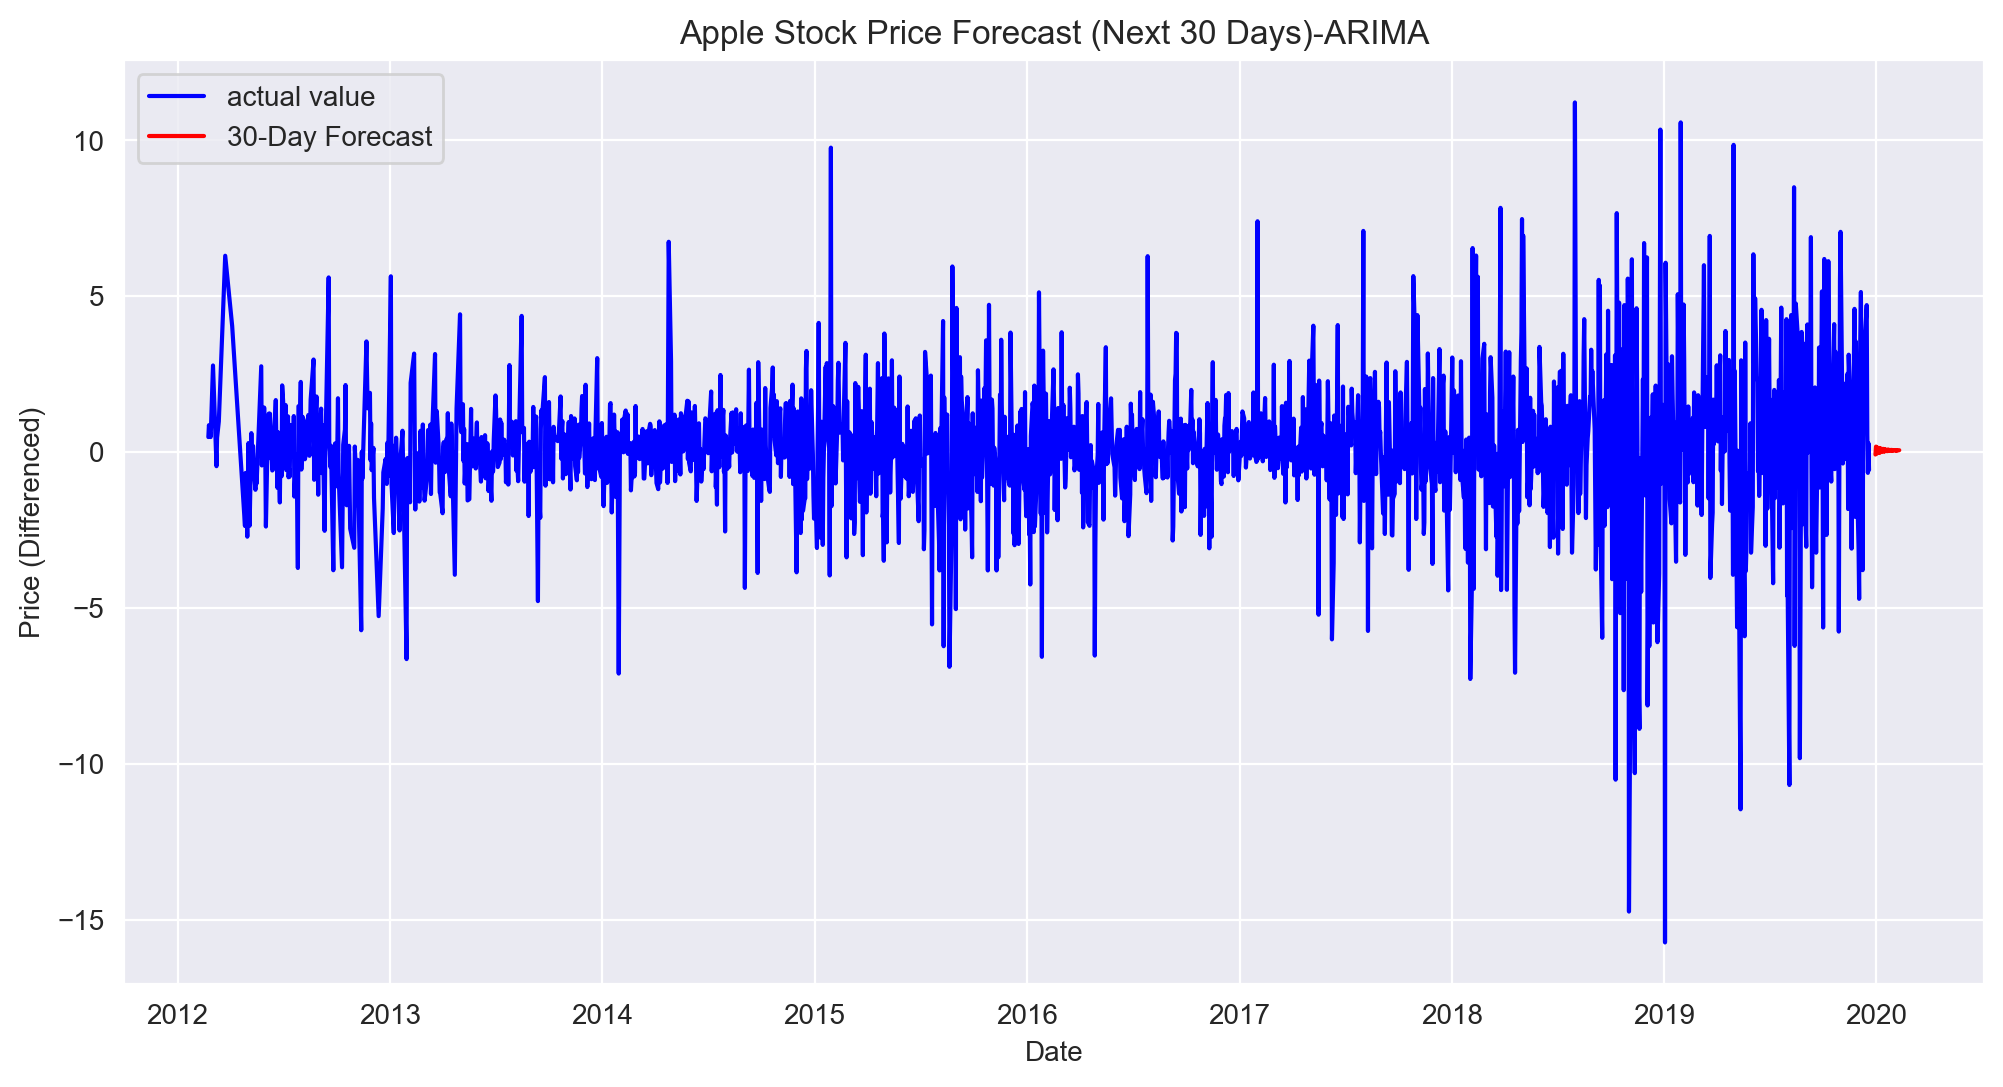

In [141]:
# Plot the actual value and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'], label='actual value', color='blue')
plt.plot(forecast_ARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')
plt.title('Apple Stock Price Forecast (Next 30 Days)-ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [142]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_ARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_ARIMA)

              Forecast
Date                  
2019-12-31  279.358676
2020-01-01  279.530839
2020-01-02  279.476576
2020-01-03  279.624565
2020-01-06  279.591896
2020-01-07  279.720596
2020-01-08  279.705155
2020-01-09  279.818467
2020-01-10  279.816772
2020-01-13  279.917805
2020-01-14  279.927078
2020-01-15  280.018315
2020-01-16  280.036338
2020-01-17  280.119758
2020-01-20  280.144764
2020-01-21  280.221947
2020-01-22  280.252523
2020-01-23  280.324731
2020-01-24  280.359752
2020-01-27  280.427989
2020-01-28  280.466556
2020-01-29  280.531626
2020-01-30  280.573023
2020-01-31  280.635565
2020-02-03  280.679219
2020-02-04  280.739745
2020-02-05  280.785201
2020-02-06  280.844117
2020-02-07  280.891010
2020-02-10  280.948643


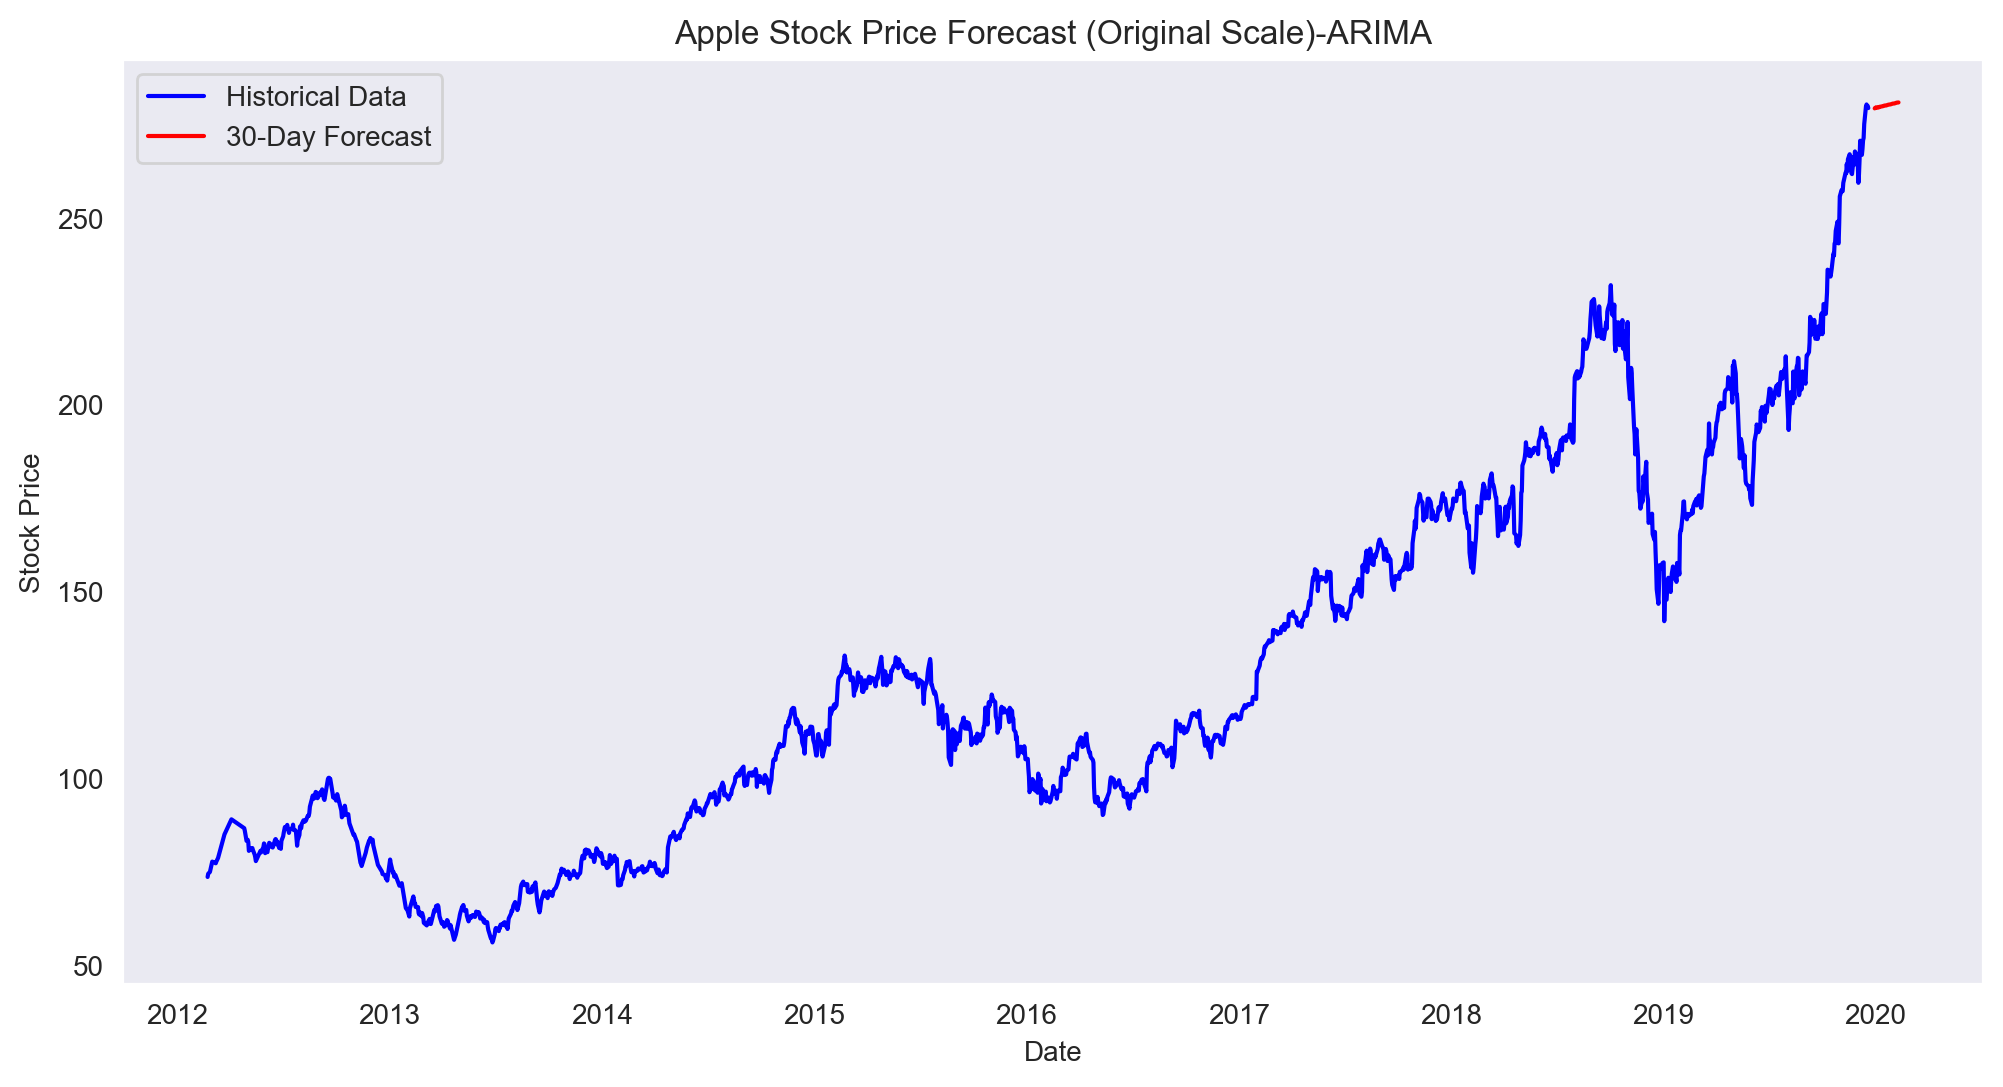

In [144]:
# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_ARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)-ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<Figure size 2000x1200 with 0 Axes>

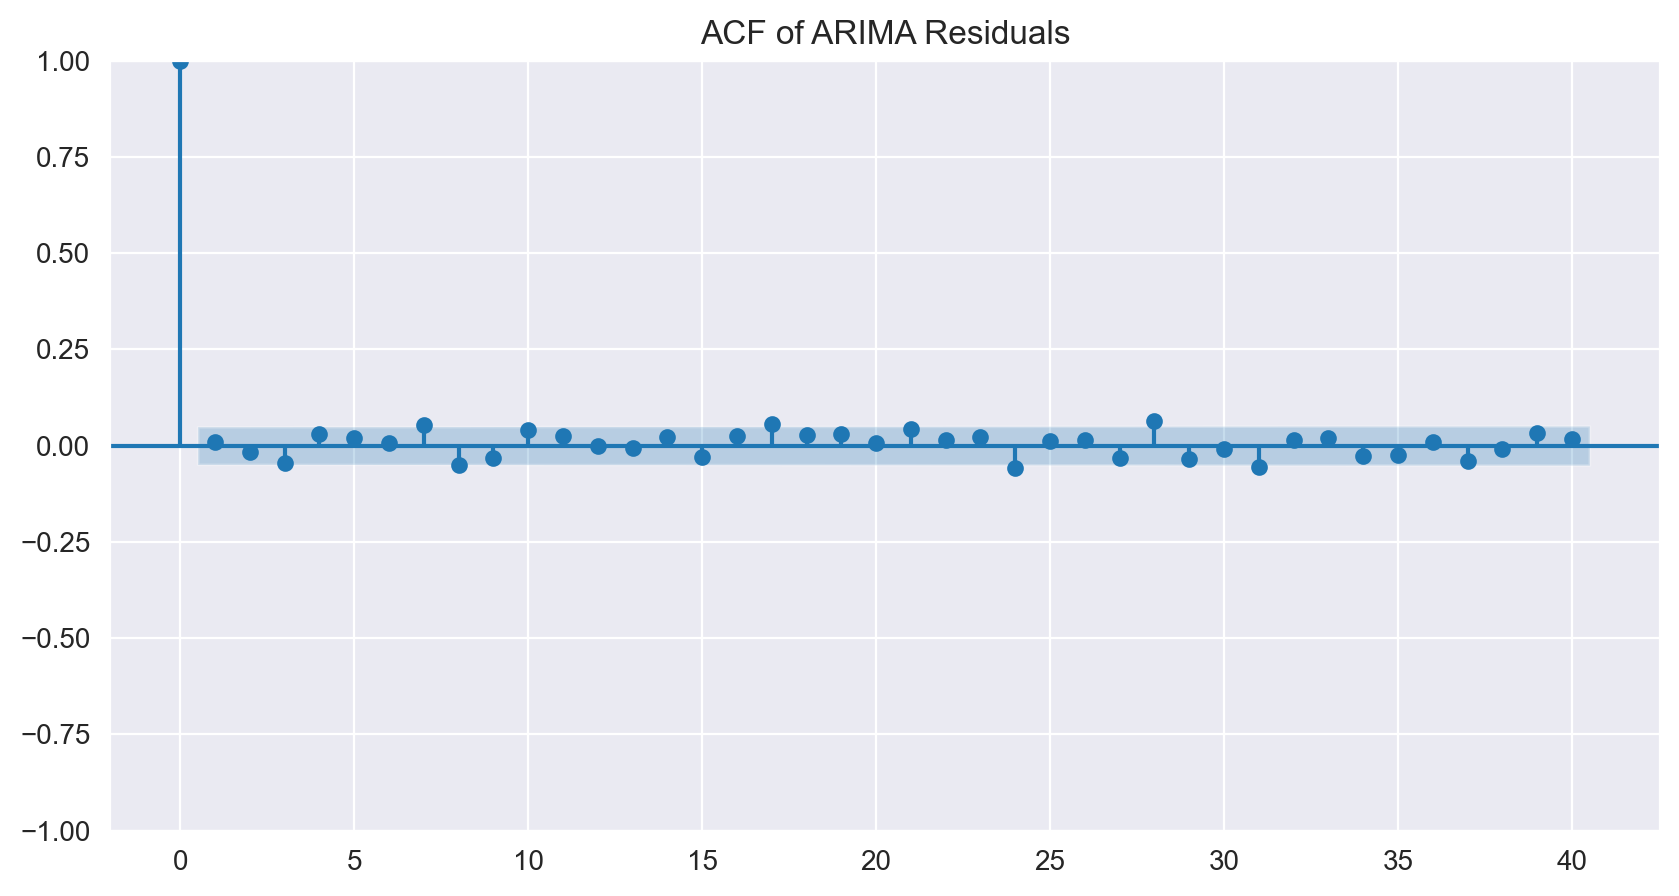

In [145]:
# residuals
residuals_ARIMA = result.resid

# 1. ACF of Residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals_ARIMA, lags=40)
plt.title("ACF of ARIMA Residuals")
plt.show()


<Figure size 2000x1200 with 0 Axes>

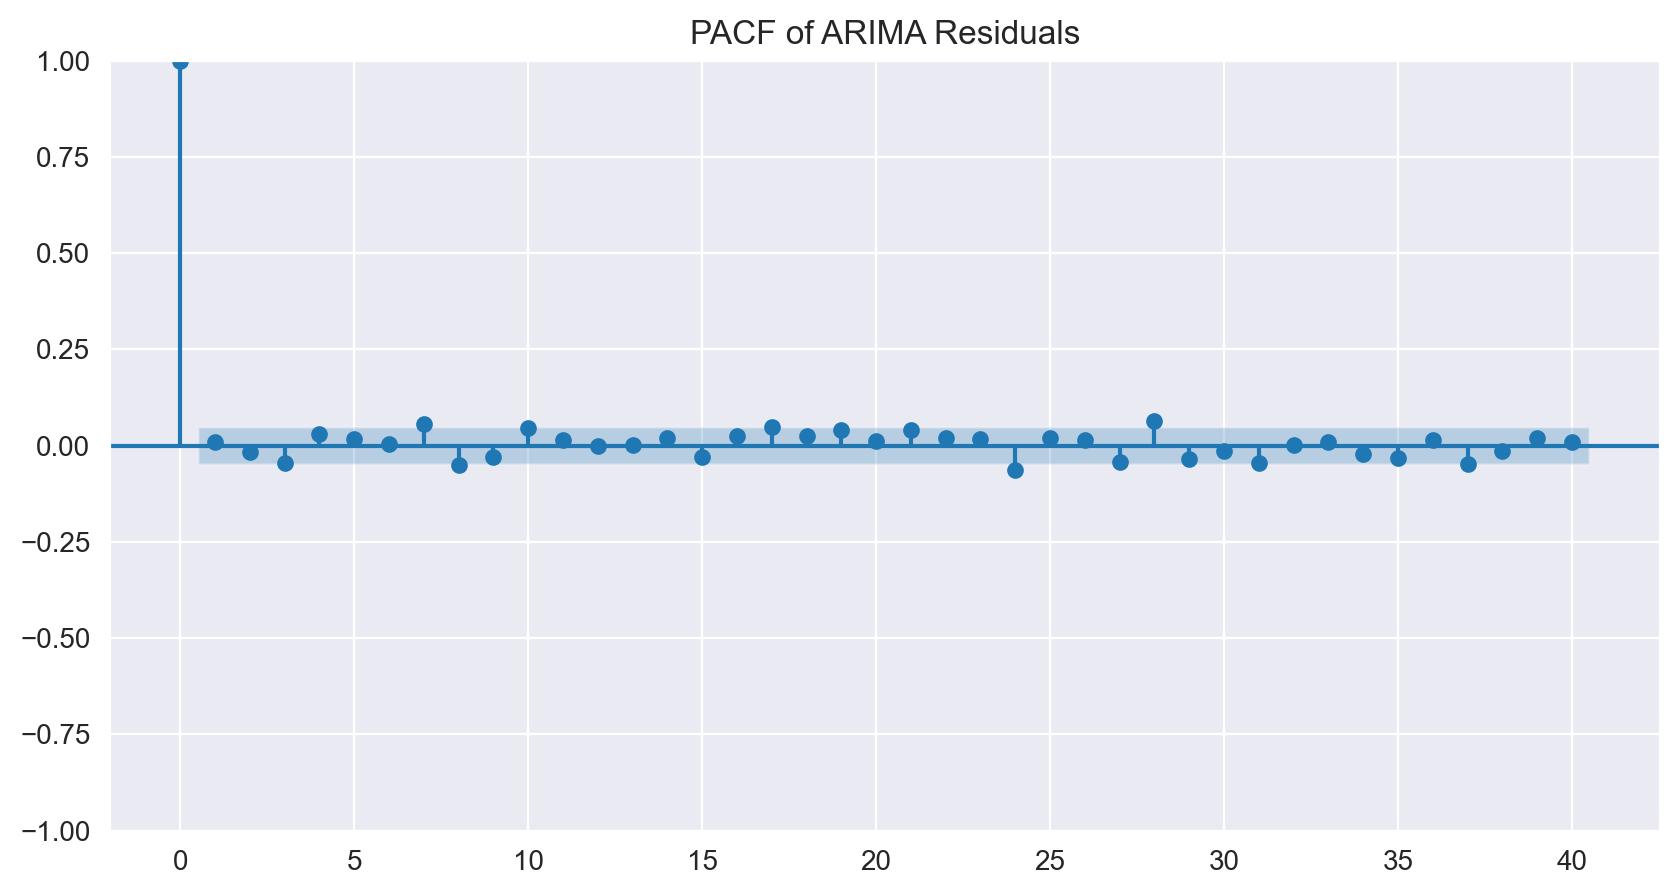

In [146]:
# 2. PACF of Residuals
plt.figure(figsize=(10, 6))
plot_pacf(residuals_ARIMA, lags=40)
plt.title("PACF of ARIMA Residuals")
plt.show()

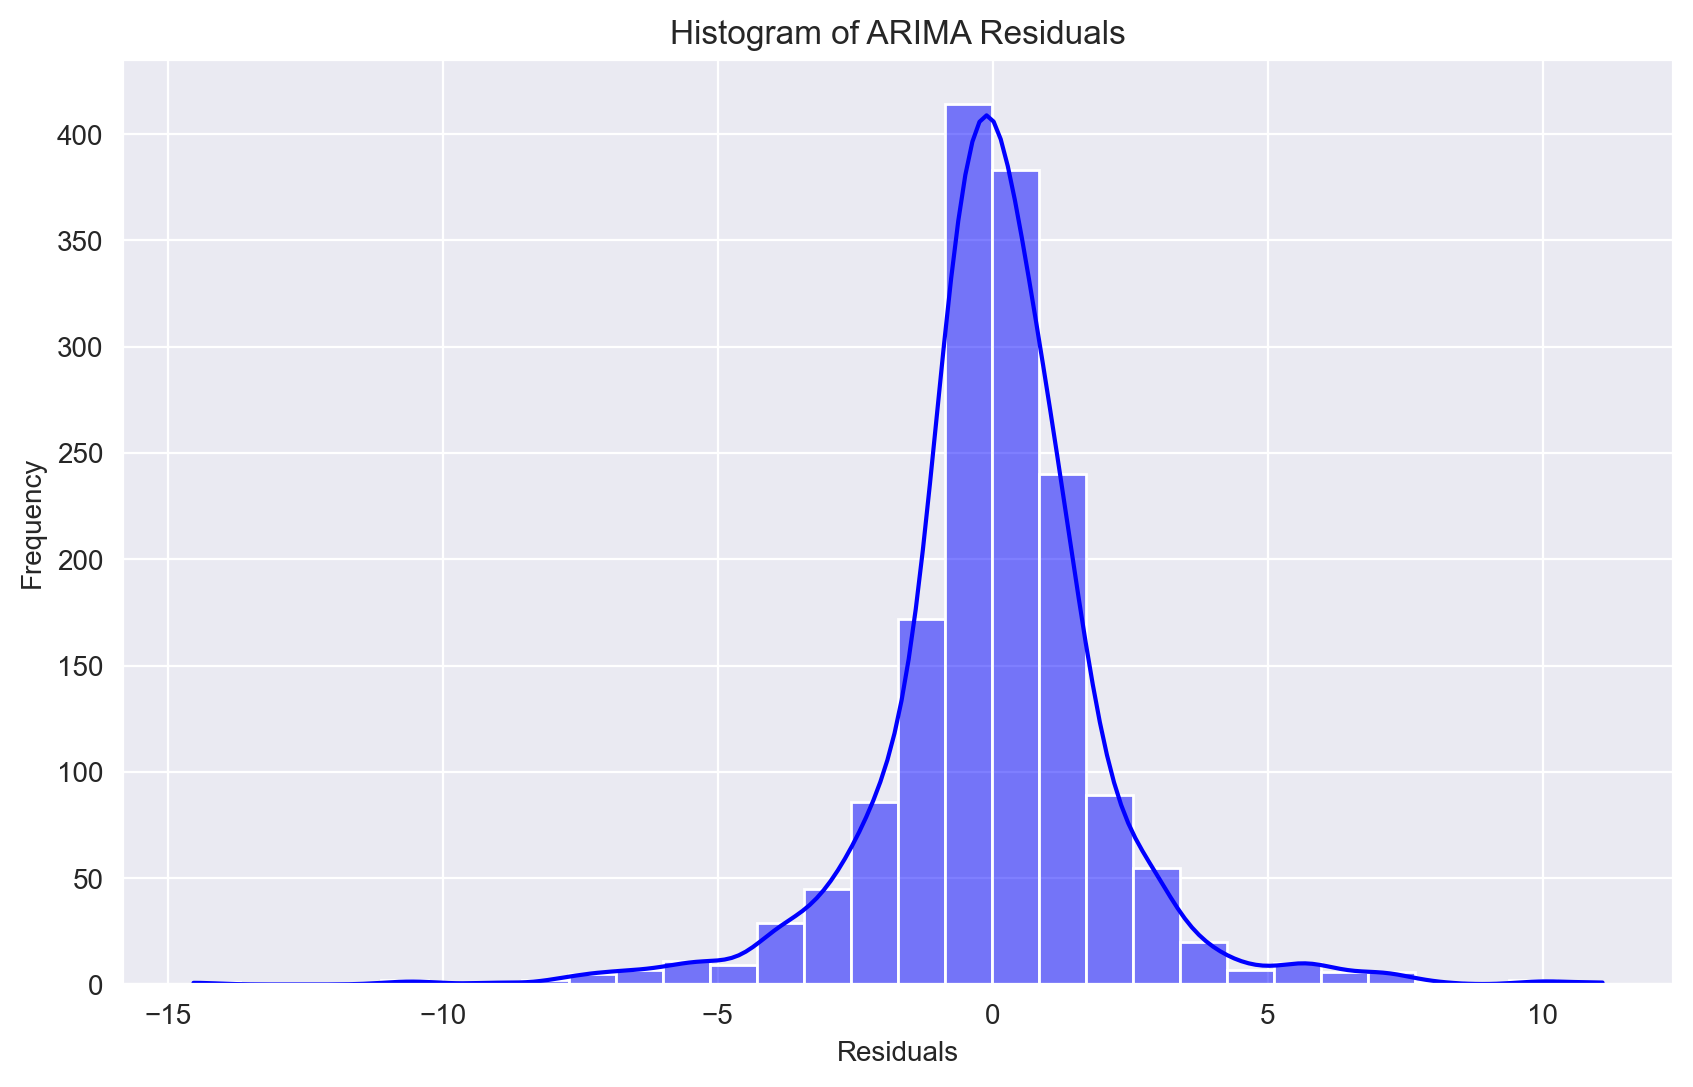

In [149]:
# 3. Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ARIMA, kde=True, bins=30, color='blue')
plt.title("Histogram of ARIMA Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

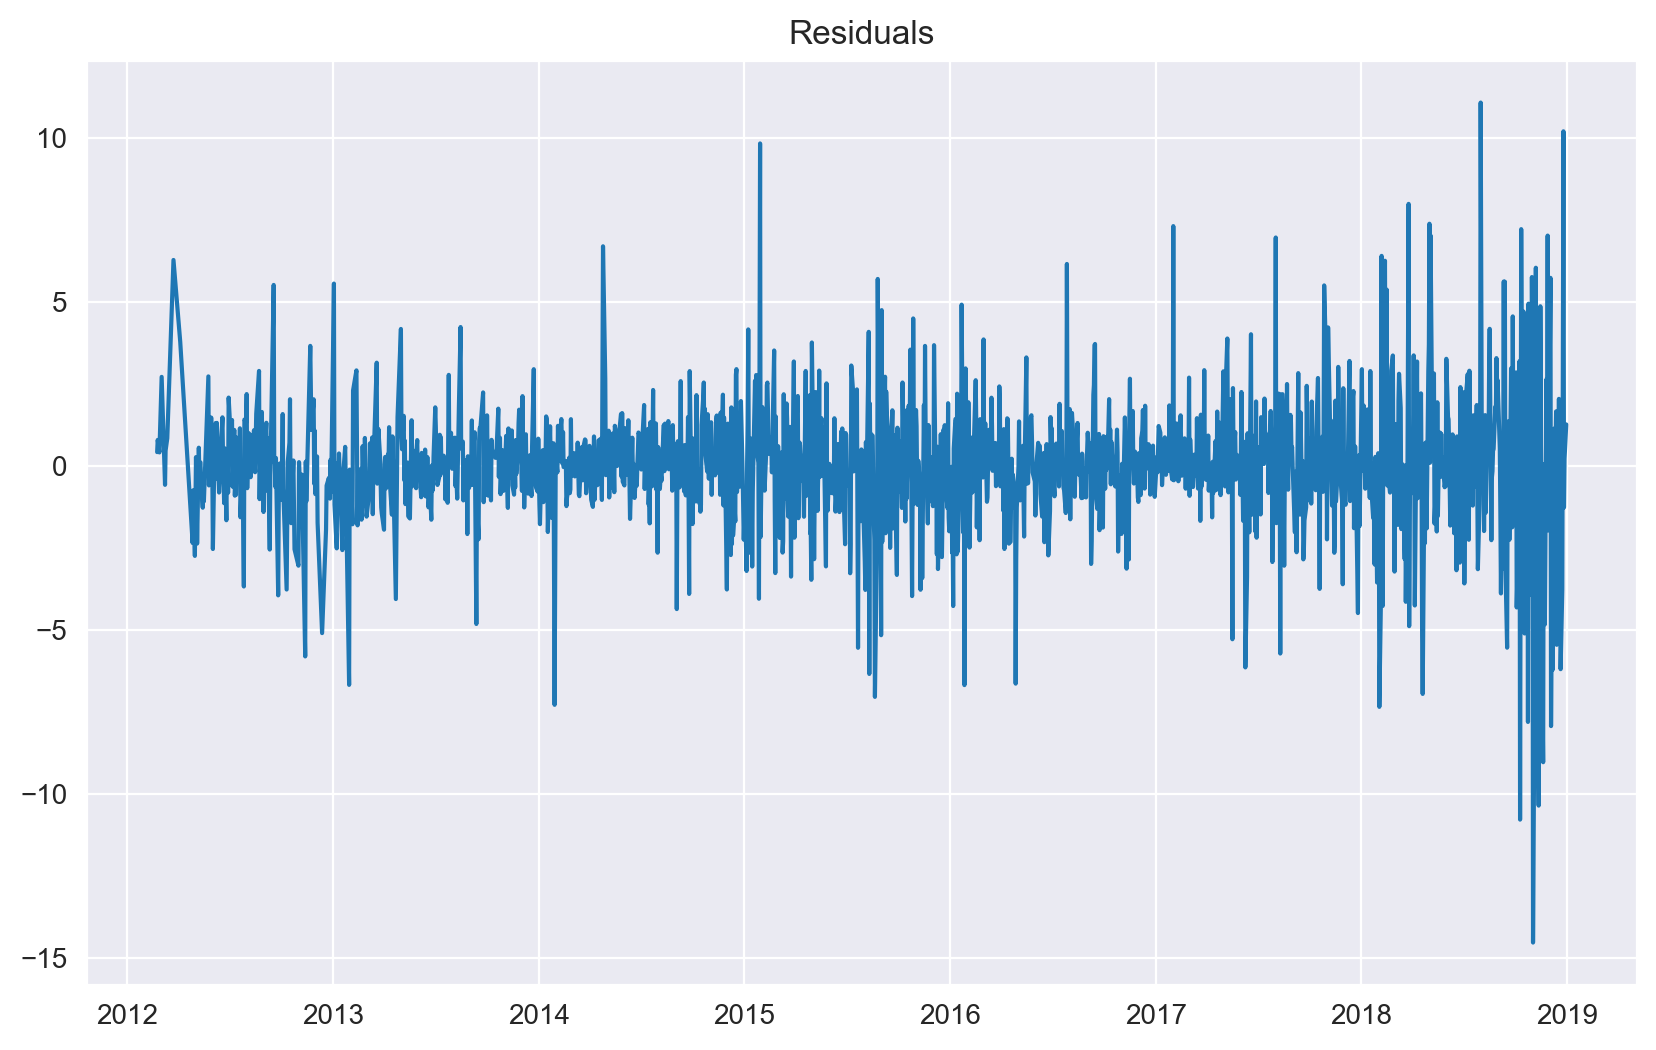

In [150]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals_ARIMA)
plt.title('Residuals')
plt.show()


 ## 2. SARIMA

In [157]:
pip install pandas statsmodels matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [158]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

<Figure size 800x400 with 0 Axes>

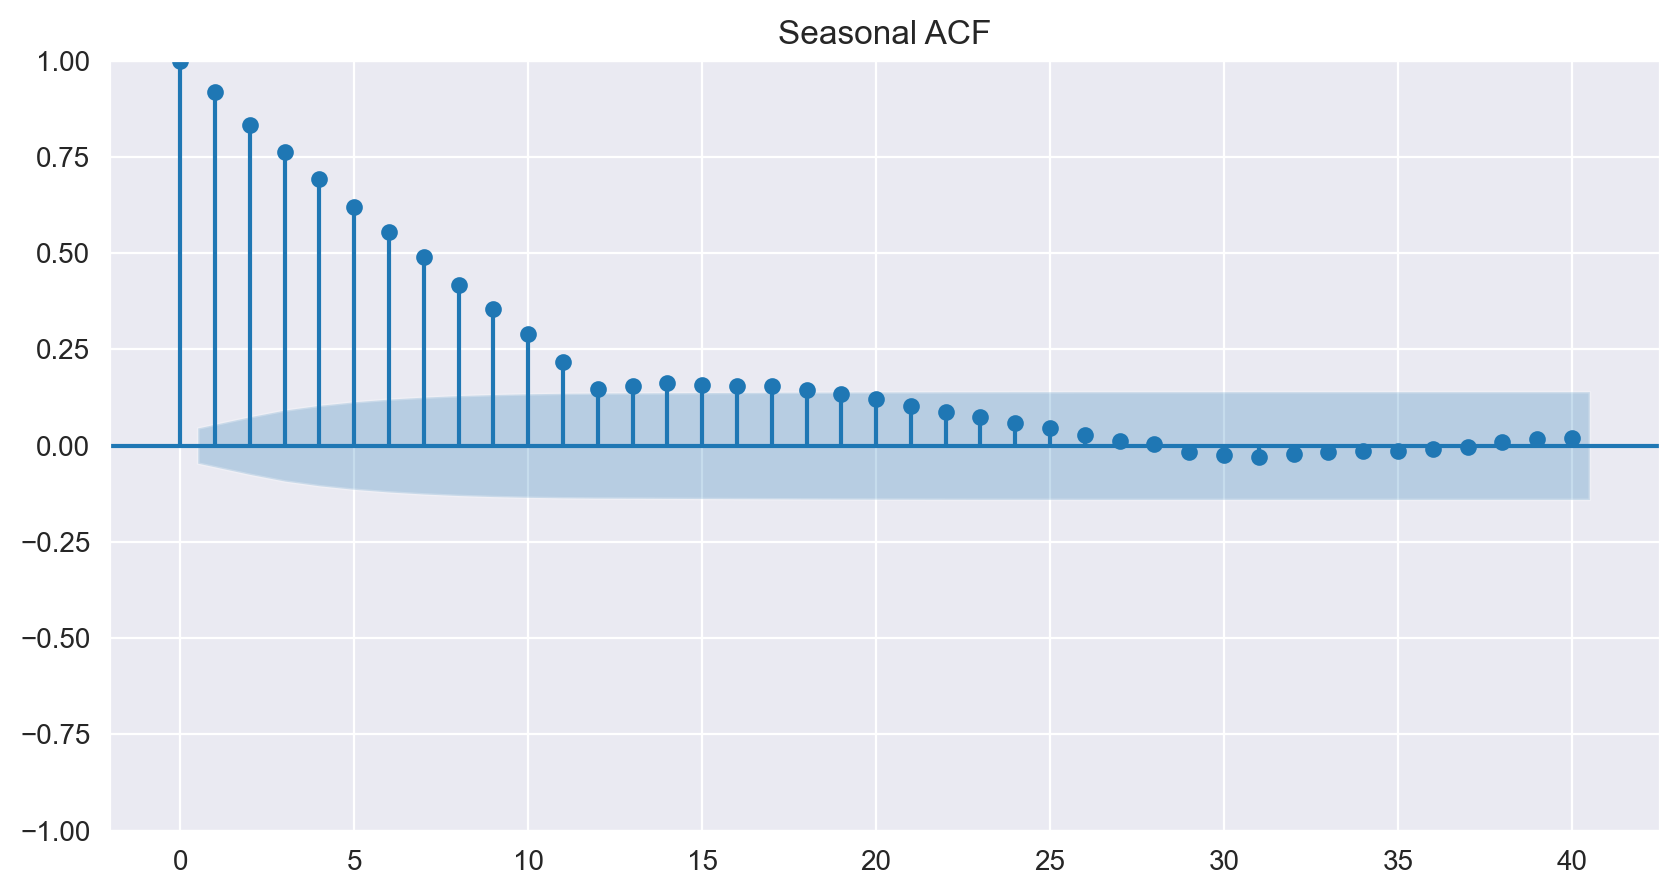

<Figure size 800x400 with 0 Axes>

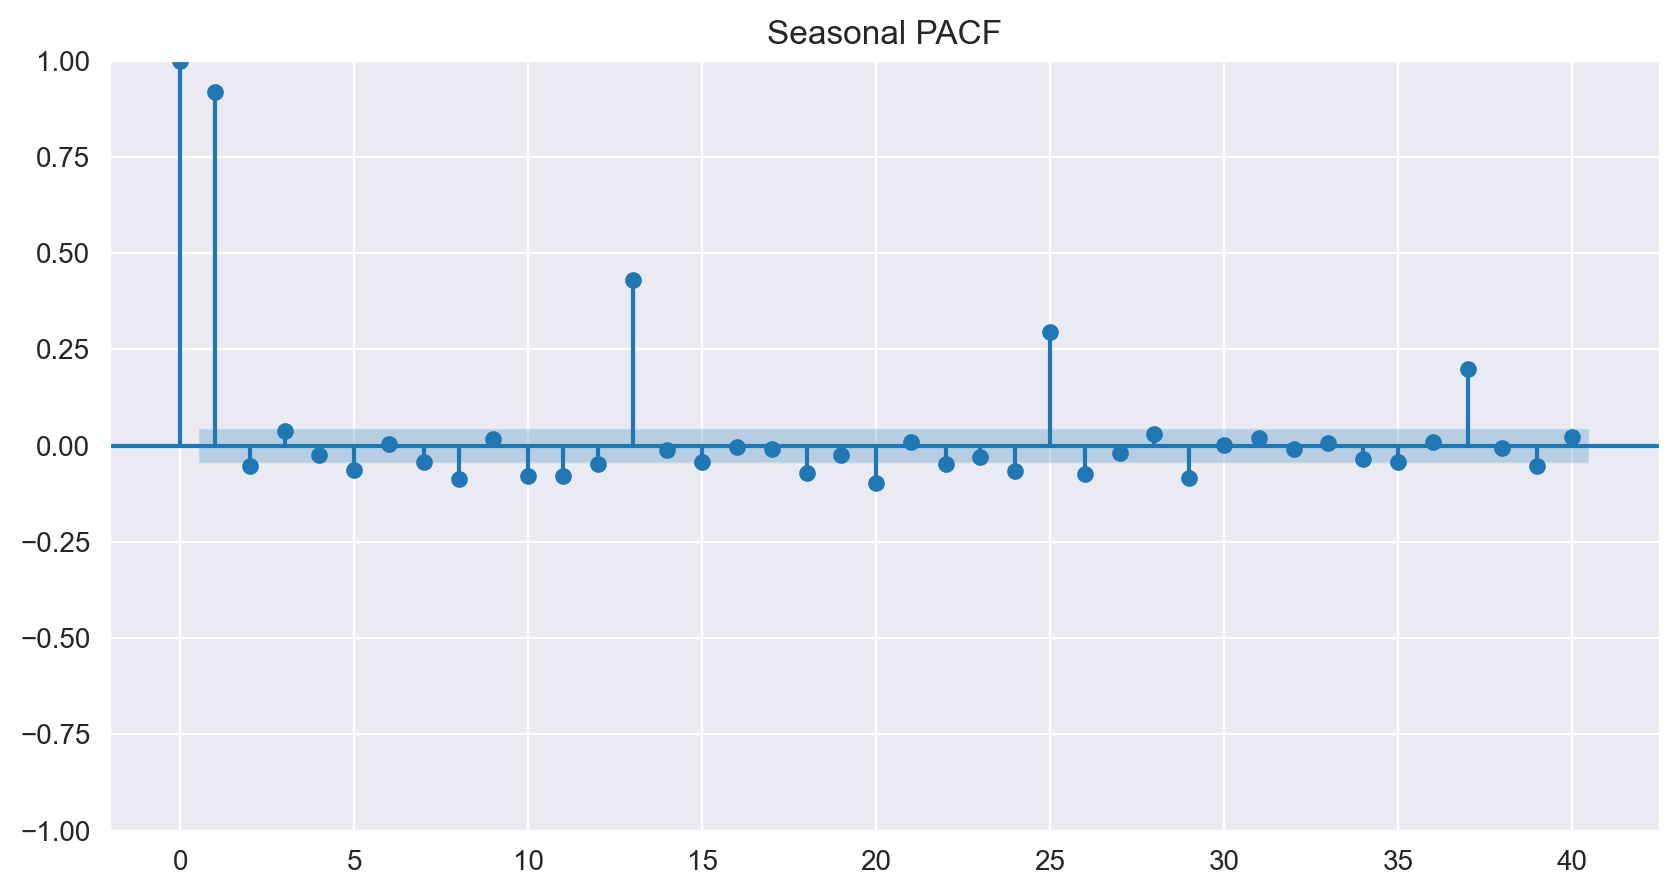

In [159]:
# taking seasonal period as 12
seasonal_period = 12

# Differencing the data to remove seasonal patterns
data_diff_seasonal = df['Close'] - df['Close'].shift(12)

# Drop NA values resulting from differencing
data_diff_seasonal = data_diff_seasonal.dropna()

# Plot ACF
plt.figure(figsize=(4, 2))
plot_acf(data_diff_seasonal, lags=40, title='Seasonal ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(4, 2))
plot_pacf(data_diff_seasonal, lags=40, title='Seasonal PACF', method='ywm')
plt.show()

In [167]:
# SARIMA Tuning with m = 12
sarima_model = auto_arima(train_df['Close_diff'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,  # Set seasonality to 12
                          d=0, max_d=0,
                          seasonal=True,
                          start_P=1, start_Q=1,
                          max_P=3, max_Q=3,
                          D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=True)

print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=17.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7787.216, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7402.244, Time=3.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.82 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7785.253, Time=0.39 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7788.958, Time=0.53 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=7172.036, Time=10.42 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=7039.511, Time=54.81 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=289.57 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=34.12 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=7039.663, Time=80.66 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=7040.515, Time=72.08 sec
 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=7041.234, Time=164.23 sec
 ARIMA(0,0,1)(3,1,0)[12] intercept   : AIC=7039.410, Time=52.88 sec
 ARIMA(0,0,1)(2,1,0)[12] in

In [174]:
# Define SARIMA model parameters
p, d, q = 1, 0, 1  # ARIMA terms
P, D, Q, m = 2, 0, 4, 12  # Seasonal terms (e.g., m=12 for monthly seasonality)

# Fit the SARIMA model
model = SARIMAX(train_df['Close_diff'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                    Close_diff   No. Observations:                 1604
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2, 3, 4], 12)   Log Likelihood               -3366.543
Date:                                       Wed, 05 Feb 2025   AIC                           6751.087
Time:                                               23:12:10   BIC                           6799.509
Sample:                                                    0   HQIC                          6769.065
                                                      - 1604                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9215     

In [176]:
pred_SARIMA=model_fit.forecast(steps=len(test_df))
pred_SARIMA

1604   -0.289691
1605   -0.014490
1606   -0.657003
1607    0.804647
1608    0.097854
          ...   
1845    0.006127
1846    0.195637
1847   -0.261760
1848   -0.165264
1849    0.083846
Name: predicted_mean, Length: 246, dtype: float64

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

mae_sarima = mean_absolute_error(test_df['Close_diff'], pred_SARIMA)
mse_sarima = mean_squared_error(test_df['Close_diff'], pred_SARIMA)
rmse_sarima = root_mean_squared_error(test_df['Close_diff'], pred_SARIMA)
r2_sarima = r2_score(test_df['Close_diff'],pred_SARIMA )

print("Mean Squared Error:", mse_sarima)
print("Root Mean Squared Error:",rmse_sarima)
print("Mean Absolute Error:", mae_sarima)
print("R-squared:", r2_sarima)

Mean Squared Error: 10.678373782957255
Root Mean Squared Error: 3.267778111034661
Mean Absolute Error: 2.37961971693163
R-squared: -0.037675499979348936


In [182]:
ypredsarima_series = pd.Series(pred_SARIMA.values, index=test_df.index)

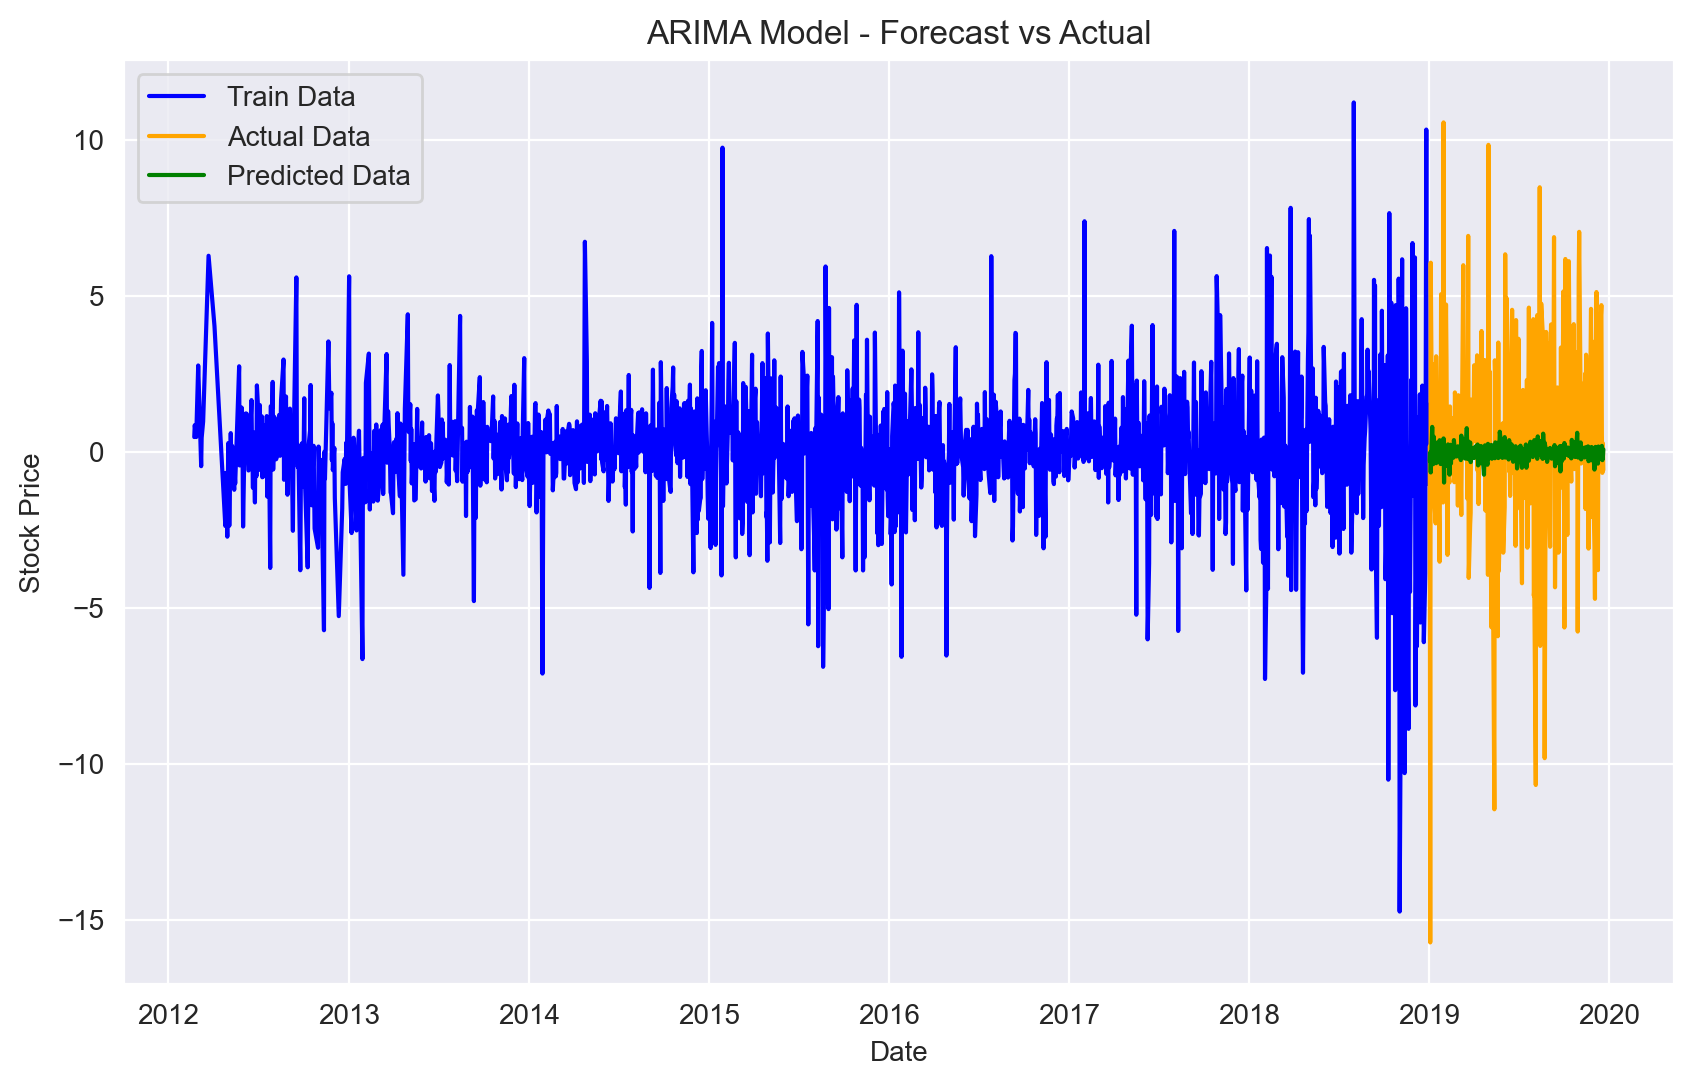

In [184]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_df['Close_diff'], label='Train Data', color='blue')
plt.plot(test_df['Close_diff'], label='Actual Data', color='orange')
plt.plot(ypredsarima_series, label='Predicted Data', color='green')
plt.title('ARIMA Model - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [194]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = model_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

# Create a DataFrame with forecasted values
forecast_SARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_SARIMA)

            Forecast
Date                
2019-12-31 -0.289691
2020-01-01 -0.014490
2020-01-02 -0.657003
2020-01-03  0.804647
2020-01-06  0.097854
2020-01-07 -0.392377
2020-01-08  0.491848
2020-01-09  0.175983
2020-01-10  0.306239
2020-01-13 -0.360056
2020-01-14 -0.204785
2020-01-15 -0.045031
2020-01-16  0.044554
2020-01-17  0.377606
2020-01-20 -0.056278
2020-01-21 -0.387797
2020-01-22  0.244200
2020-01-23  0.297189
2020-01-24  0.117666
2020-01-27  0.434675
2020-01-28 -0.981663
2020-01-29  0.036646
2020-01-30  0.000965
2020-01-31 -0.440522
2020-02-03  0.127512
2020-02-04  0.125476
2020-02-05  0.242799
2020-02-06 -0.728584
2020-02-07 -0.212259
2020-02-10  0.230963


In [202]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_SARIMA = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_SARIMA)

              Forecast
Date                  
2019-12-31  279.150311
2020-01-01  279.135822
2020-01-02  278.478819
2020-01-03  279.283466
2020-01-06  279.381320
2020-01-07  278.988943
2020-01-08  279.480792
2020-01-09  279.656775
2020-01-10  279.963014
2020-01-13  279.602958
2020-01-14  279.398173
2020-01-15  279.353142
2020-01-16  279.397696
2020-01-17  279.775302
2020-01-20  279.719024
2020-01-21  279.331227
2020-01-22  279.575427
2020-01-23  279.872616
2020-01-24  279.990282
2020-01-27  280.424957
2020-01-28  279.443294
2020-01-29  279.479941
2020-01-30  279.480905
2020-01-31  279.040383
2020-02-03  279.167895
2020-02-04  279.293371
2020-02-05  279.536170
2020-02-06  278.807586
2020-02-07  278.595327
2020-02-10  278.826290


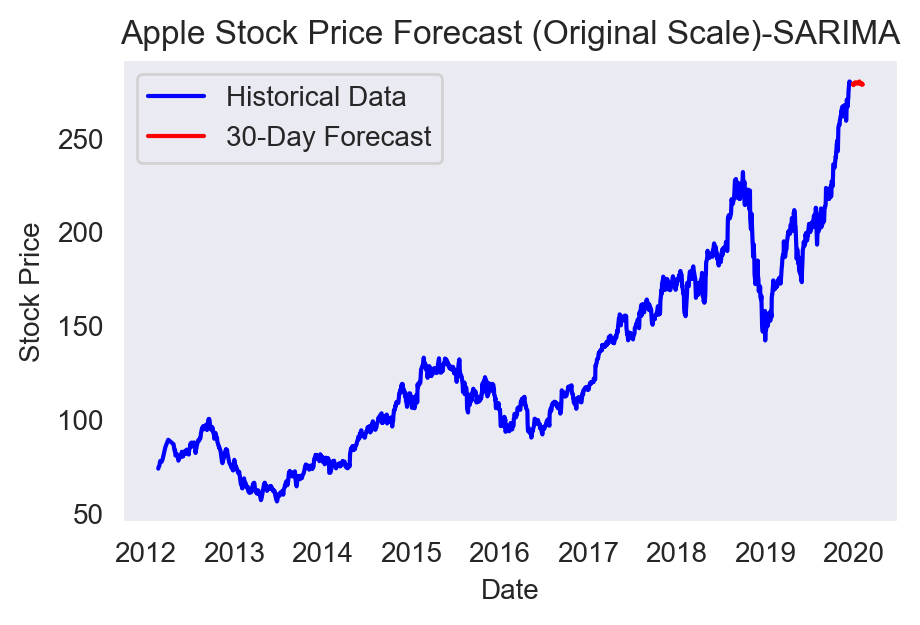

In [206]:
# Plot the historical and forecasted values
plt.figure(figsize=(5, 3))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_SARIMA['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)-SARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

### 3. Triple exponential smoothing with additive trend and additive seasonality

In [218]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import math
# Holts with add seasonality
hwe_model = ExponentialSmoothing(train_df['Close_diff'],seasonal="add",trend="add",seasonal_periods=12).fit()

In [219]:
# Summary of the model
print(hwe_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Close_diff   No. Observations:                 1604
Model:             ExponentialSmoothing   SSE                           6287.275
Optimized:                         True   AIC                           2223.108
Trend:                         Additive   BIC                           2309.192
Seasonal:                      Additive   AICC                          2223.539
Seasonal Periods:                    12   Date:                 Wed, 05 Feb 2025
Box-Cox:                          False   Time:                         23:30:31
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

In [222]:
hwe_model_ypred=hwe_model.forecast(steps=len(test_df))
hwe_model_ypred

1604    0.201845
1605    0.175147
1606   -0.050083
1607   -0.204530
1608   -0.013054
          ...   
1845    0.171330
1846   -0.053900
1847   -0.208347
1848   -0.016871
1849   -0.090024
Length: 246, dtype: float64

In [224]:
mae_exp = mean_absolute_error(test_df['Close_diff'], hwe_model_ypred)
mse_exp = mean_squared_error(test_df['Close_diff'], hwe_model_ypred)
rmse_exp = root_mean_squared_error(test_df['Close_diff'], hwe_model_ypred)
r2_exp = r2_score(test_df['Close_diff'], hwe_model_ypred)

# Print the evaluation results
print("Mean Squared Error:", mse_exp)
print("Root Mean Squared Error:",rmse_exp)
print("Mean Absolute Error:", mae_exp)
print("R-squared:", r2_exp)

Mean Squared Error: 10.405191056759747
Root Mean Squared Error: 3.2257078380968953
Mean Absolute Error: 2.3351093183189064
R-squared: -0.01112885273188624


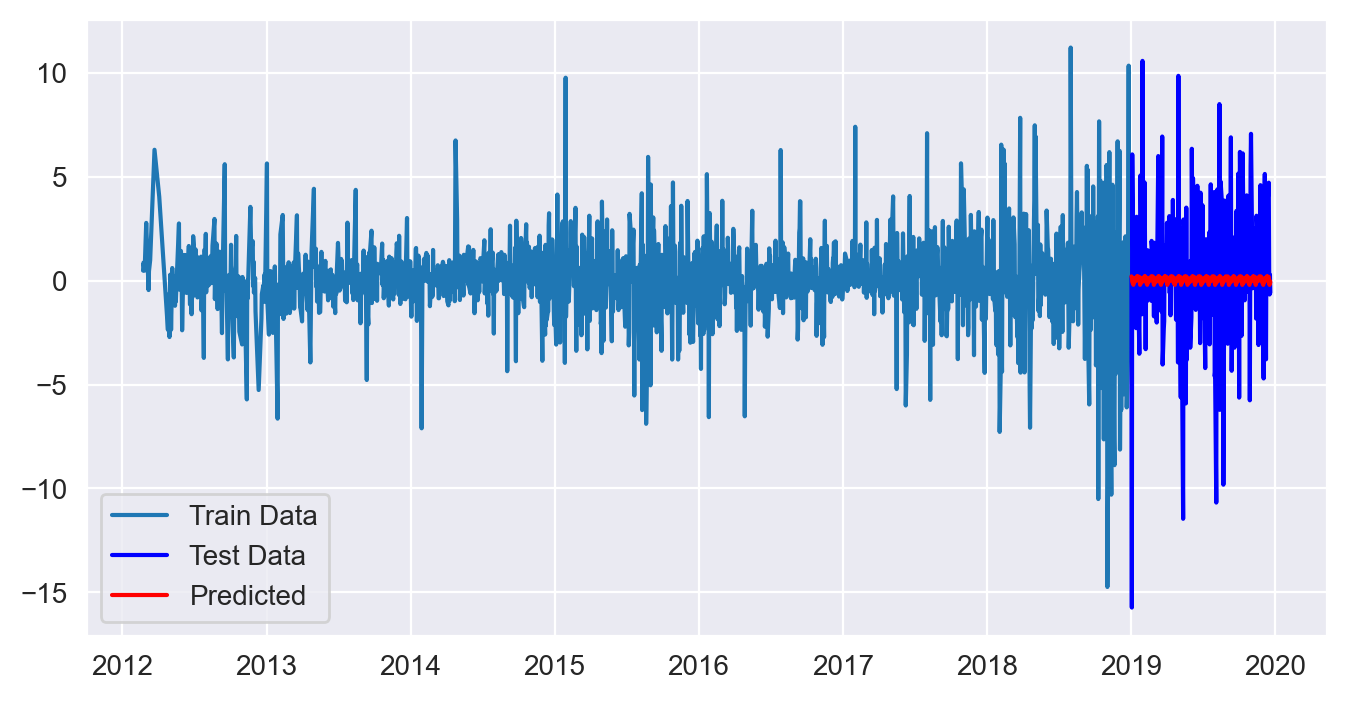

In [226]:
# Plot the actual vs predicted values of Triple ES
plt.figure(figsize=(8,4))
plt.plot(train_df.index, train_df['Close_diff'], label='Train Data')
plt.plot(test_df.index, test_df['Close_diff'], label='Test Data', color='blue')
plt.plot(test_df.index, hwe_model_ypred, label='Predicted', color='red')
plt.legend()
plt.show()

In [227]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = hwe_model.forecast(steps=forecast_steps)

# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

# Create a DataFrame with forecasted values
forecast_TES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_TES)

            Forecast
Date                
2019-12-31  0.201845
2020-01-01  0.175147
2020-01-02 -0.050083
2020-01-03 -0.204530
2020-01-06 -0.013054
2020-01-07 -0.086207
2020-01-08  0.090009
2020-01-09  0.120409
2020-01-10 -0.003609
2020-01-13  0.010621
2020-01-14  0.204251
2020-01-15  0.031495
2020-01-16  0.201654
2020-01-17  0.174956
2020-01-20 -0.050274
2020-01-21 -0.204721
2020-01-22 -0.013245
2020-01-23 -0.086398
2020-01-24  0.089819
2020-01-27  0.120218
2020-01-28 -0.003800
2020-01-29  0.010431
2020-01-30  0.204060
2020-01-31  0.031304
2020-02-03  0.201463
2020-02-04  0.174765
2020-02-05 -0.050465
2020-02-06 -0.204911
2020-02-07 -0.013435
2020-02-10 -0.086589


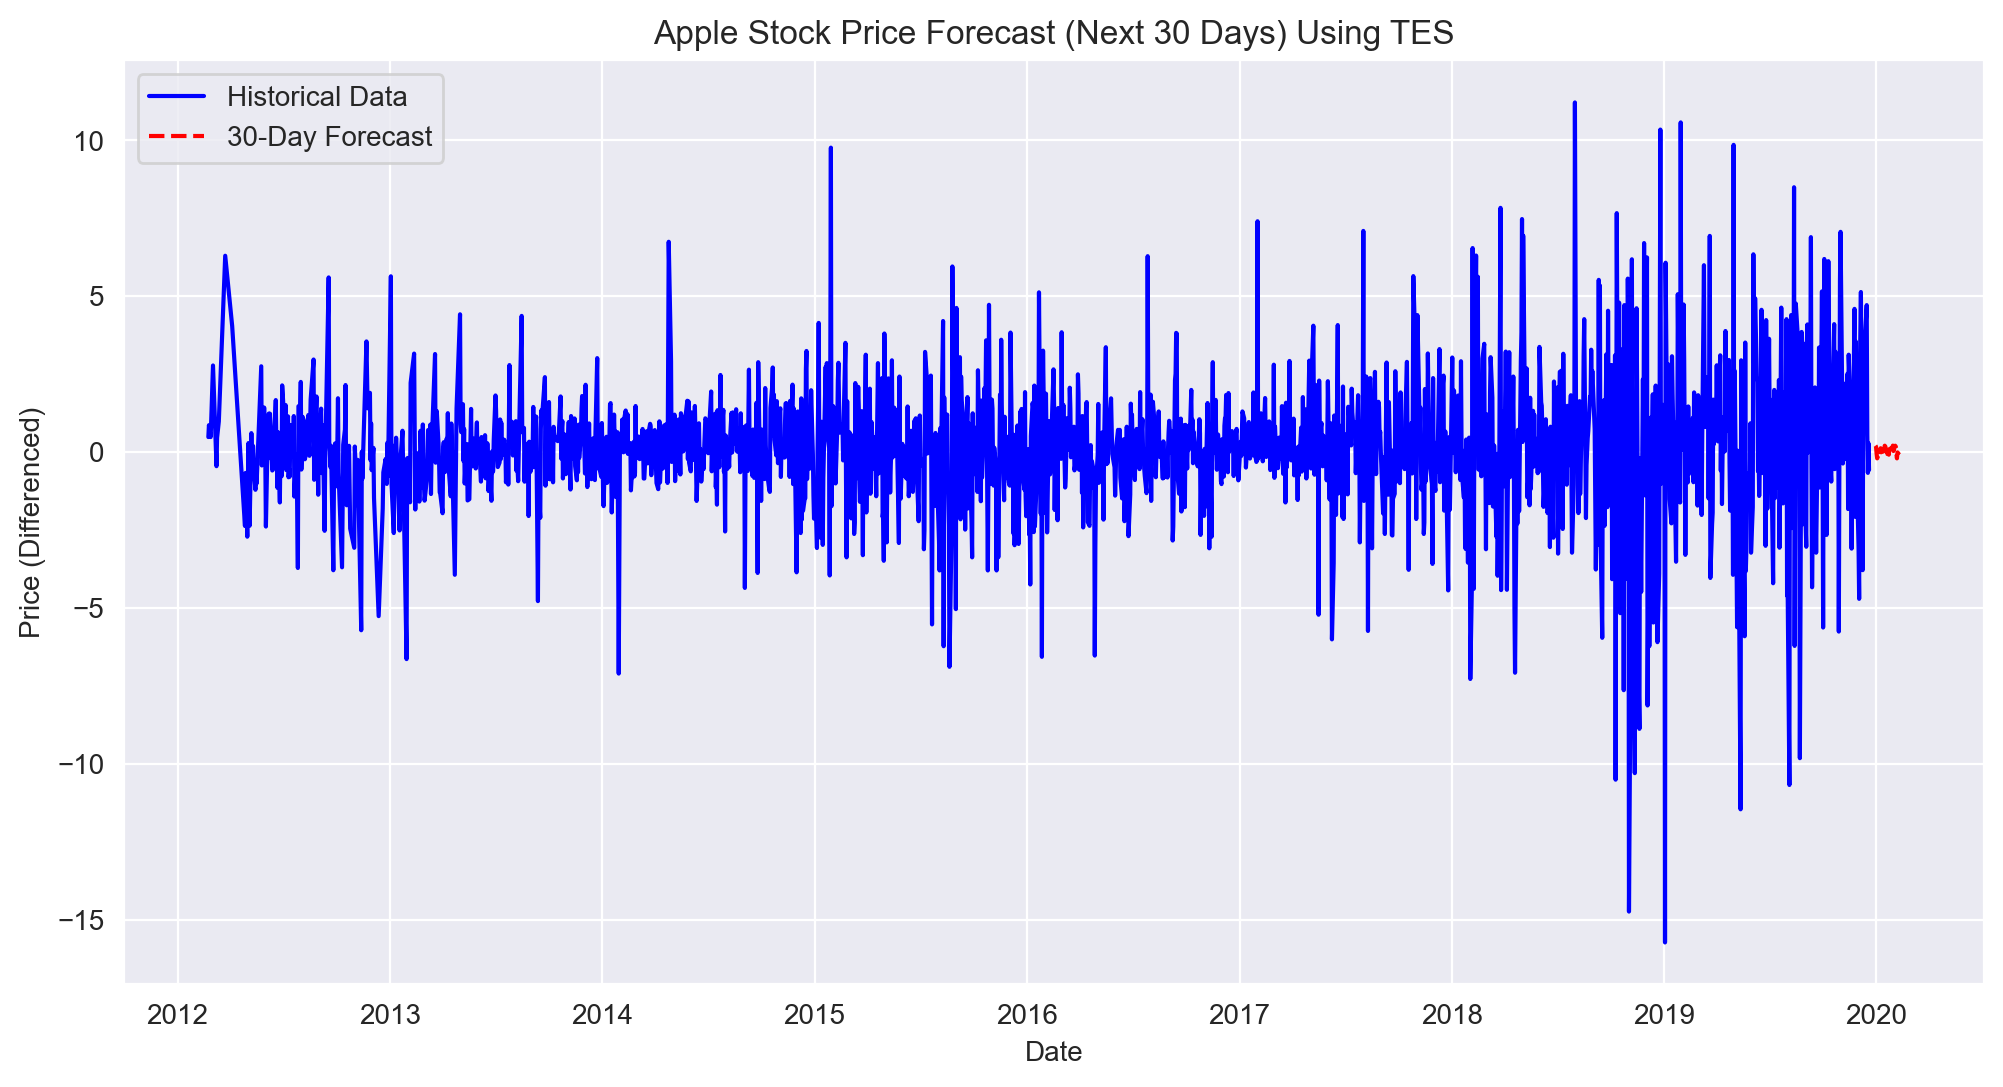

In [230]:
# Plot the historical and forecasted values Of triple ES
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'], label='Historical Data', color='blue')
plt.plot(forecast_TES['Forecast'], label='30-Day Forecast', color='red', linestyle='--')
plt.title('Apple Stock Price Forecast (Next 30 Days) Using TES')
plt.xlabel('Date')
plt.ylabel('Price (Differenced)')
plt.legend()
plt.show()

In [231]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_TES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_TES)

              Forecast
Date                  
2019-12-31  279.641847
2020-01-01  279.816993
2020-01-02  279.766910
2020-01-03  279.562381
2020-01-06  279.549327
2020-01-07  279.463120
2020-01-08  279.553129
2020-01-09  279.673538
2020-01-10  279.669929
2020-01-13  279.680550
2020-01-14  279.884802
2020-01-15  279.916296
2020-01-16  280.117950
2020-01-17  280.292906
2020-01-20  280.242632
2020-01-21  280.037912
2020-01-22  280.024667
2020-01-23  279.938269
2020-01-24  280.028088
2020-01-27  280.148306
2020-01-28  280.144506
2020-01-29  280.154936
2020-01-30  280.358997
2020-01-31  280.390301
2020-02-03  280.591764
2020-02-04  280.766528
2020-02-05  280.716064
2020-02-06  280.511152
2020-02-07  280.497717
2020-02-10  280.411128


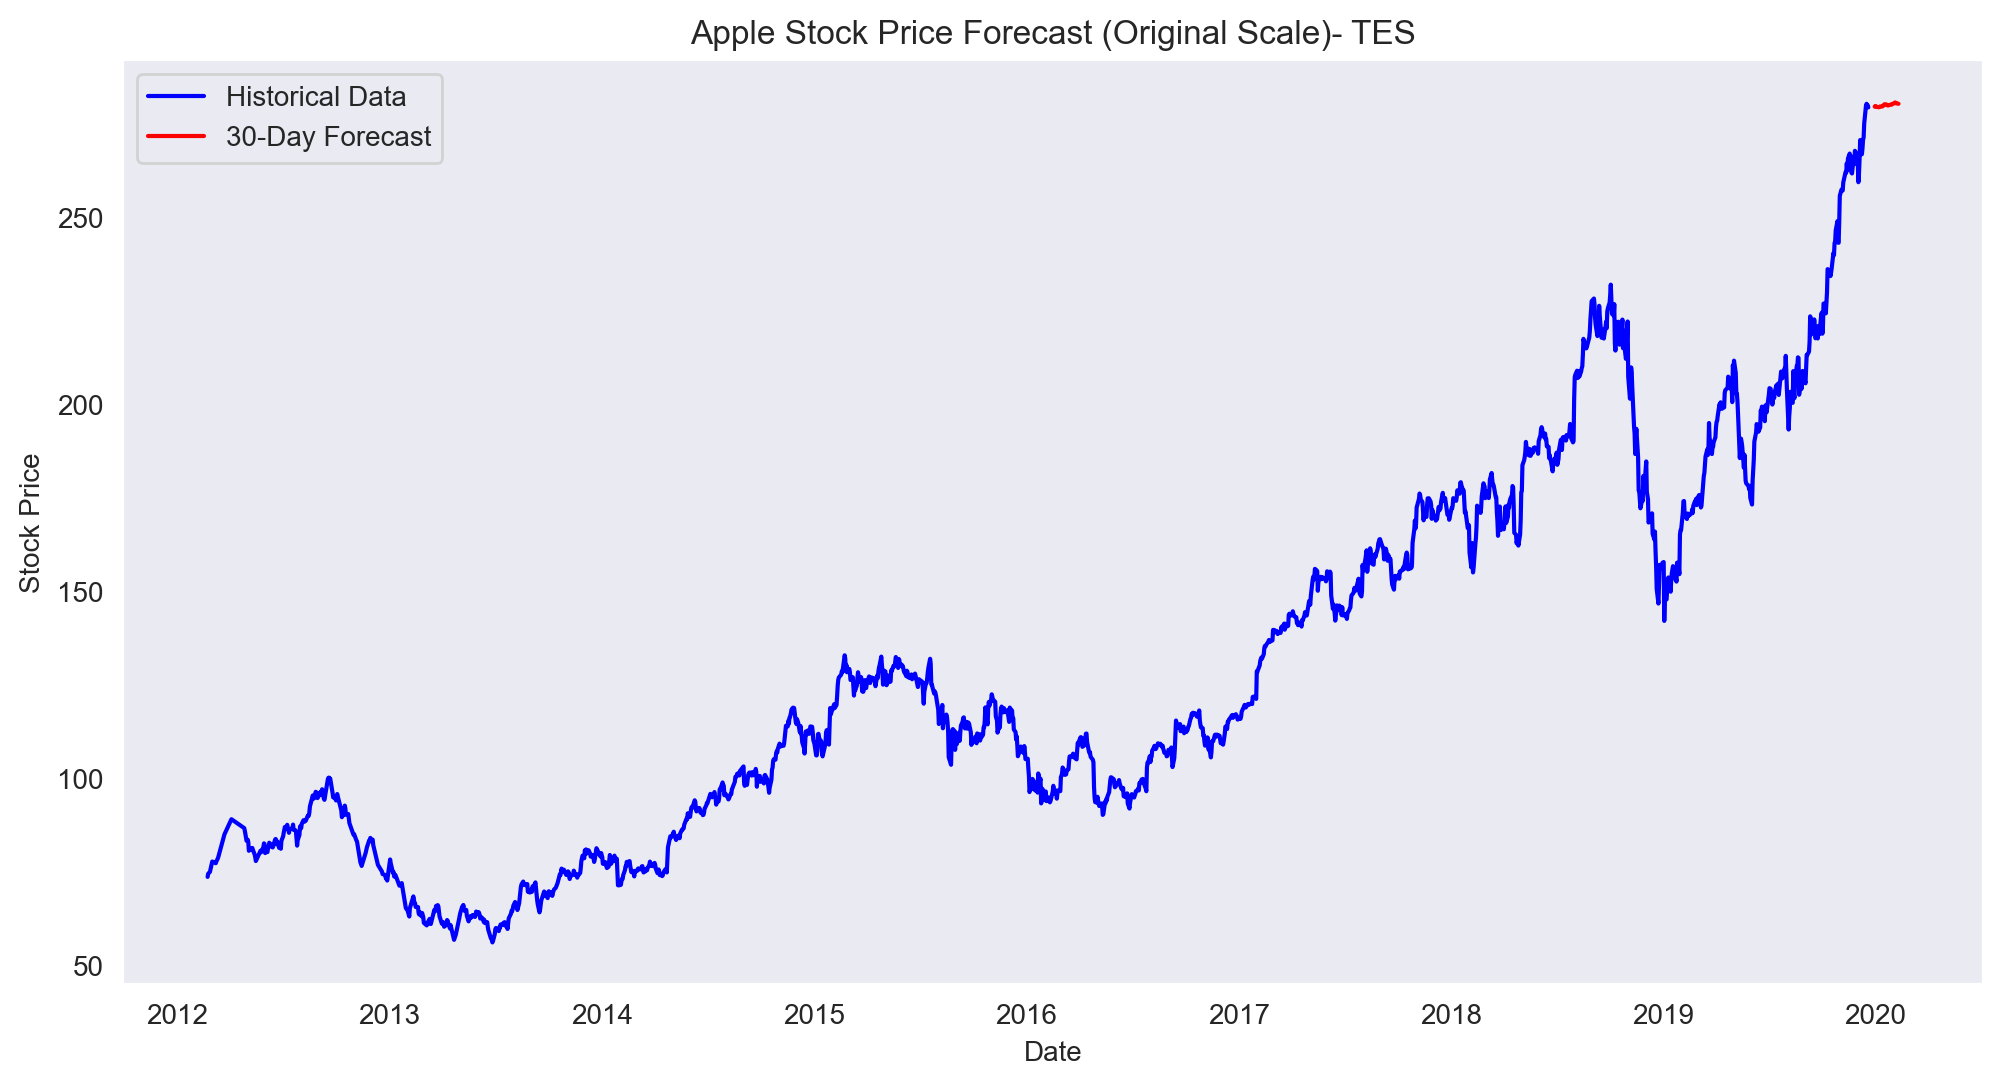

In [232]:
# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_TES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)- TES')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

###  4. Additive Seasonality Model

In [243]:
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt as root_mean_squared_error

In [245]:
add_season_model = ols('Close ~ C(month)', data=train_df).fit()

In [247]:
# Summary of the model
print(add_season_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.763
Date:                Wed, 05 Feb 2025   Prob (F-statistic):            0.00148
Time:                        23:31:51   Log-Likelihood:                -8209.6
No. Observations:                1604   AIC:                         1.644e+04
Df Residuals:                    1592   BIC:                         1.651e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        112.2443      3.868     29.

In [249]:
pred_add_sea = pd.Series(add_season_model.predict(test_df))

In [251]:
mse_add_sea = mean_squared_error(np.array(test_df['Close']), np.array(pred_add_sea))
rmse_add_sea = root_mean_squared_error(mse_add_sea)
mae_add_sea = mean_absolute_error(np.array(test_df['Close']), np.array(pred_add_sea))
r2_add_sea = r2_score(np.array(test_df['Close']), np.array(pred_add_sea))

print("Additive Seasonality Model:")
print("Mean Squared Error:", mse_add_sea)
print("Root Mean Squared Error:", rmse_add_sea)
print("Mean Absolute Error:", mae_add_sea)
print("R-squared:", r2_add_sea)

Additive Seasonality Model:
Mean Squared Error: 8460.773646428106
Root Mean Squared Error: 91.9824637984225
Mean Absolute Error: 87.50505906734087
R-squared: -7.023081976866116


### 5.Multiplicative seasonality model

In [254]:
# Multiplicative Seasonality Model using log transformation

In [256]:
# Log transform the 'Close' prices
train_df['log_Close'] = np.log(train_df['Close'])

In [258]:
# Fit the OLS model on the log-transformed data
mul_season_model = ols('log_Close ~ C(month)', data=train_df).fit()

In [260]:
# Summary of the model
print(mul_season_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Close   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.740
Date:                Wed, 05 Feb 2025   Prob (F-statistic):            0.00162
Time:                        23:32:22   Log-Likelihood:                -514.16
No. Observations:                1604   AIC:                             1052.
Df Residuals:                    1592   BIC:                             1117.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.6771      0.032    146.

In [262]:
# Predict on the test data
pred_log_close = mul_season_model.predict(test_df)

In [264]:
# Inverse transform the predictions (exponentiate)
pred_mul_sea = np.exp(pred_log_close)

In [266]:
mse_mul_sea = mean_squared_error(np.array(test_df['Close']), np.array(pred_mul_sea))
rmse_mul_sea = root_mean_squared_error(mse_mul_sea)
mae_mul_sea = mean_absolute_error(np.array(test_df['Close']), np.array(pred_mul_sea))
r2_mul_sea = r2_score(np.array(test_df['Close']), np.array(pred_mul_sea))

print("Multiplicative Seasonality Model (OLS with Log Transformation):")
print("Mean Squared Error:", mse_mul_sea)
print("Root Mean Squared Error:", rmse_mul_sea)
print("Mean Absolute Error:", mae_mul_sea)
print("R-squared:", r2_mul_sea)

Multiplicative Seasonality Model (OLS with Log Transformation):
Mean Squared Error: 9638.621206567146
Root Mean Squared Error: 98.1764799051542
Mean Absolute Error: 93.96214152741695
R-squared: -8.139997276359653


### Comparison

In [269]:
evaluation = {"Models":["Additive Seasonal","Multiplicative Seasonal","Triple exponential smoothing","ARIMA","SARIMA"],\
            "Mean_Squared_Error":[ mse_add_sea, mse_mul_sea,mse_exp,mse_arima, mse_sarima],
            "Root_Mean_Squared_Error":[rmse_add_sea, rmse_mul_sea, rmse_exp, rmse_arima, rmse_sarima],\
            "Mean_Absolute_Error":[mae_add_sea, mae_mul_sea, mae_exp, mae_arima, mae_sarima]}
evaluation = pd.DataFrame(evaluation)
sorted_df = evaluation.sort_values(by='Root_Mean_Squared_Error')
sorted_df

Models  Mean_Squared_Error  Root_Mean_Squared_Error  \
2  Triple exponential smoothing           10.405191                 3.225708   
3                         ARIMA           10.508855                 3.241736   
4                        SARIMA           10.678374                 3.267778   
0             Additive Seasonal         8460.773646                91.982464   
1       Multiplicative Seasonal         9638.621207                98.176480   

   Mean_Absolute_Error  
2             2.335109  
3             2.349939  
4             2.379620  
0            87.505059  
1            93.962142

In [210]:
## Tripe exponential model gives the best accuracy compared to other models.

In [222]:
# Create a new model using the entire dataset
model = ExponentialSmoothing(df['Close_diff'].dropna(), trend='additive', seasonal='additive', seasonal_periods=12) 

# Fit the model to the entire dataset
results = model.fit()

# Generate forecasts (e.g., for the next 12 periods)
forecast = results.forecast(steps=30) 

# Print or plot the forecast
print(forecast)

1850    0.323158
1851    0.465287
1852    0.024246
1853    0.177657
1854    0.648913
1855    0.270907
1856    0.419521
1857    0.337274
1858    0.217915
1859   -0.054667
1860    0.188621
1861    0.122896
1862    0.325097
1863    0.467226
1864    0.026185
1865    0.179595
1866    0.650852
1867    0.272846
1868    0.421459
1869    0.339213
1870    0.219854
1871   -0.052728
1872    0.190560
1873    0.124835
1874    0.327036
1875    0.469165
1876    0.028124
1877    0.181534
1878    0.652791
1879    0.274785
dtype: float64


In [214]:
# Forecast the next 30 business days
forecast_steps = 30
forecast_values = model.fit().forecast(steps=forecast_steps)

# Generate dates for the forecast starting after the last date in the original data
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=11), periods=forecast_steps, freq='B')

# Create a DataFrame with forecasted values
forecast_TES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
}).set_index('Date')

# Display the forecasted values
print(forecast_TES)

            Forecast
Date                
2019-12-31  0.323158
2020-01-01  0.465287
2020-01-02  0.024246
2020-01-03  0.177657
2020-01-06  0.648913
2020-01-07  0.270907
2020-01-08  0.419521
2020-01-09  0.337274
2020-01-10  0.217915
2020-01-13 -0.054667
2020-01-14  0.188621
2020-01-15  0.122896
2020-01-16  0.325097
2020-01-17  0.467226
2020-01-20  0.026185
2020-01-21  0.179595
2020-01-22  0.650852
2020-01-23  0.272846
2020-01-24  0.421459
2020-01-27  0.339213
2020-01-28  0.219854
2020-01-29 -0.052728
2020-01-30  0.190560
2020-01-31  0.124835
2020-02-03  0.327036
2020-02-04  0.469165
2020-02-05  0.028124
2020-02-06  0.181534
2020-02-07  0.652791
2020-02-10  0.274785


In [218]:
# Reverse differencing to original scale
forecast_original_scale = forecast_values.cumsum() + df['Close'].iloc[-1]

# Create a DataFrame with the original scale forecast
forecast_original_TES = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_original_scale
}).set_index('Date')

# Display the forecasted values in the original scale
print(forecast_original_TES)

              Forecast
Date                  
2019-12-31  279.763160
2020-01-01  280.228447
2020-01-02  280.252693
2020-01-03  280.430349
2020-01-06  281.079263
2020-01-07  281.350170
2020-01-08  281.769690
2020-01-09  282.106965
2020-01-10  282.324880
2020-01-13  282.270213
2020-01-14  282.458834
2020-01-15  282.581730
2020-01-16  282.906827
2020-01-17  283.374053
2020-01-20  283.400238
2020-01-21  283.579833
2020-01-22  284.230686
2020-01-23  284.503532
2020-01-24  284.924991
2020-01-27  285.264205
2020-01-28  285.484059
2020-01-29  285.431331
2020-01-30  285.621891
2020-01-31  285.746726
2020-02-03  286.073761
2020-02-04  286.542927
2020-02-05  286.571050
2020-02-06  286.752585
2020-02-07  287.405376
2020-02-10  287.680161


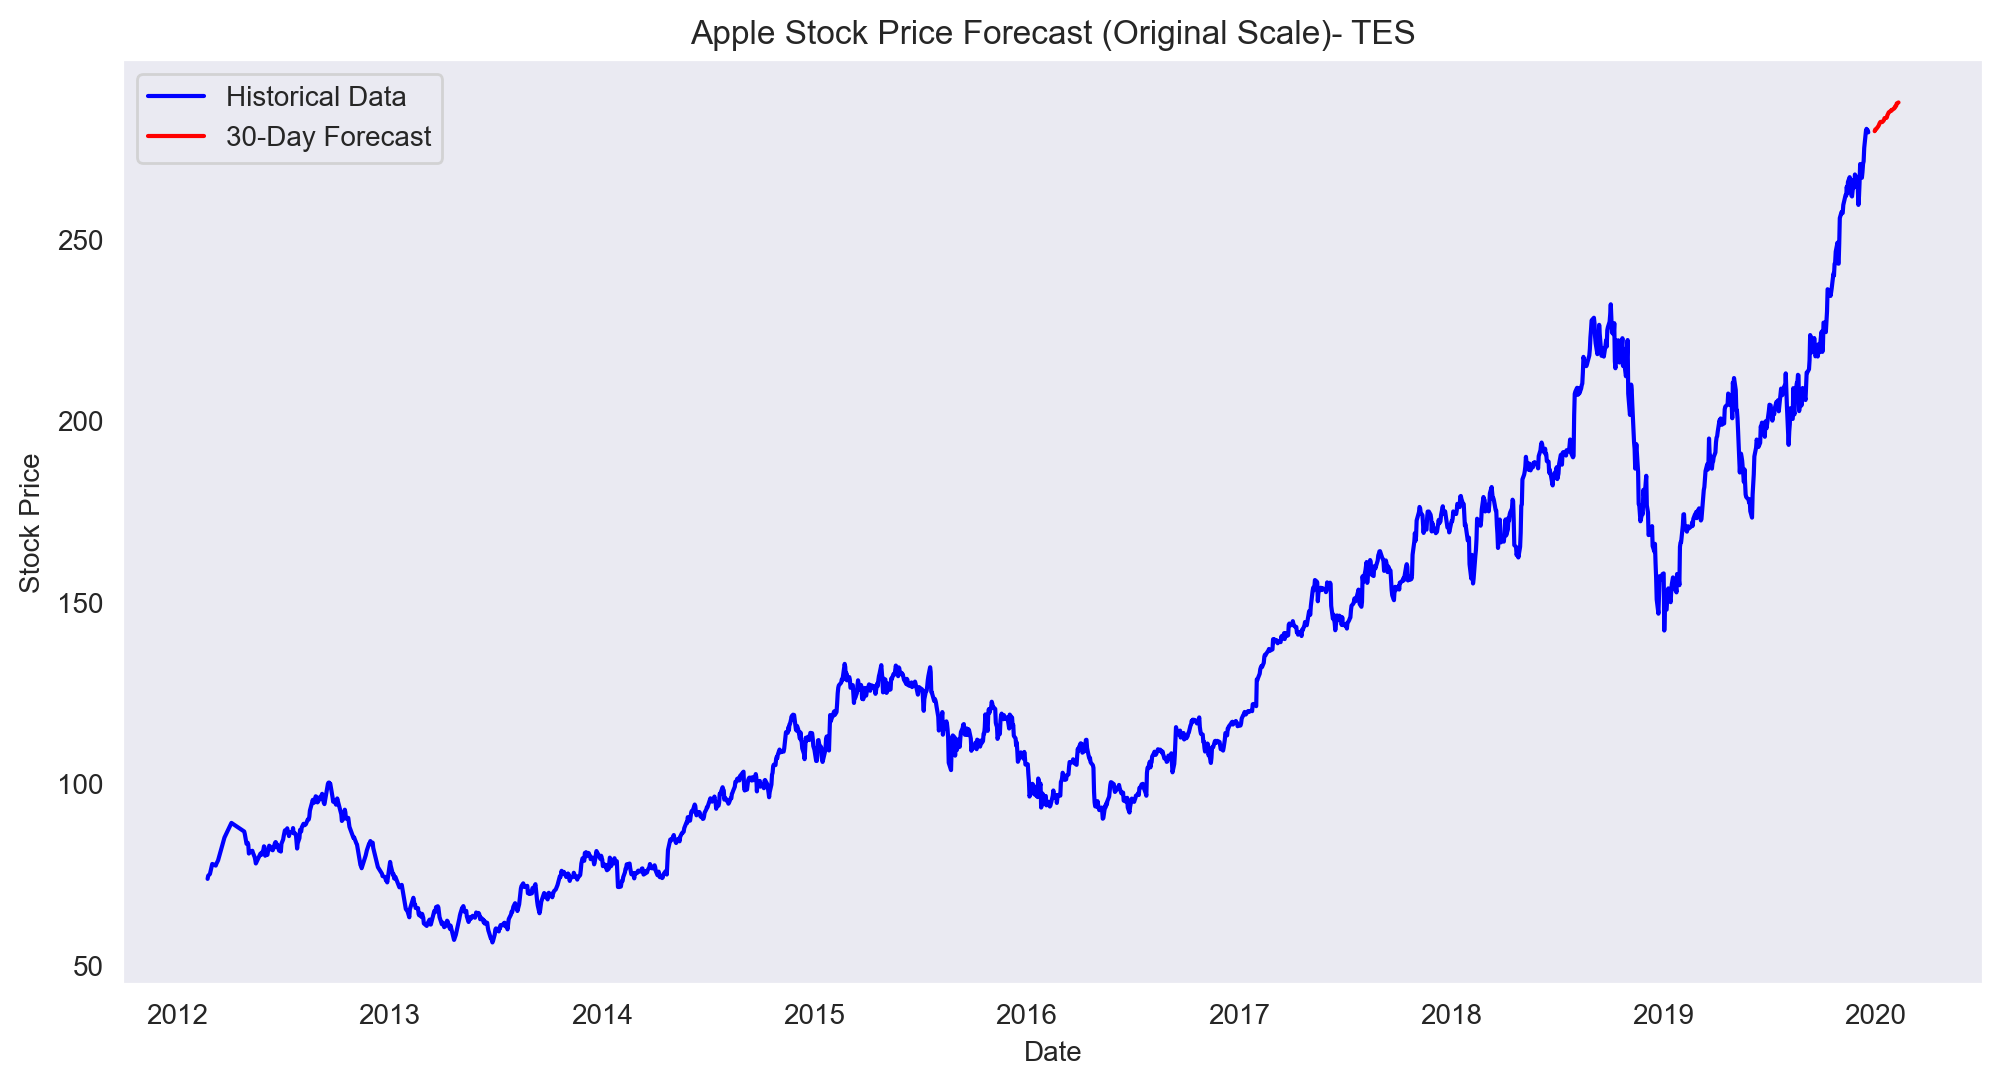

In [220]:
# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))

# Plot the original historical data
plt.plot(df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (original scale)
plt.plot(forecast_original_TES['Forecast'], label='30-Day Forecast', color='red', linestyle='-')

# Customize the plot
plt.title('Apple Stock Price Forecast (Original Scale)- TES')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [237]:
# converting index column into datetime format
df.index =pd.to_datetime(df.index)
df = df.reset_index()

In [238]:
df.rename(columns={'index' : 'Date'}, inplace=True)

In [239]:
# creating a backup of this dataframe data in a csv file
df.to_csv('dataAAPL.csv')

In [240]:
# set date as index
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date',inplace =True)

## Deployment

In [242]:
import pickle

In [243]:
pickle.dump(results, open('triple_exp.pkl','wb'))